In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

import torch

plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
sns.set_theme()

In [3]:
targ = pd.read_csv('train-target_1.csv', header=None)

In [ ]:
targ.sample(3)

0
5321  0
370   0
8200  1

In [ ]:
targ.shape

(10000, 1)

In [4]:
train_df = pd.read_csv('train_1.csv', header=None)

In [5]:
test_df = pd.read_csv('test_1.csv', header=None)

In [6]:
train_df.rename(columns=lambda x: str(x), inplace=True)
targ.rename(columns={0: 'class'}, inplace=True)
test_df.rename(columns=lambda x: str(x), inplace=True)

In [7]:
df = train_df.copy()
df['target'] = targ['class']
transform_df = df.drop(['9', '15', '16', '26', '17', '22', '7', \
                        '1', '3', '4', '11', '18', '20', '23', '24', '25', '27'], axis=1)

In [8]:
test_df = test_df[(i for i in test_df.columns if i not in ['9', '15', '16', '26', '17', '22', '7', \
                                                           '1', '3', '4', '11', '18', '20', '23', '24', '25', '27'])]

In [ ]:
transform_df.sample(5)

0           1           2           3          4           5  \
5423 -286.402357  -95.045051 -276.652020   45.834111   2.951390   31.843479   
3610  111.530133  -99.969927  235.201041   49.718045 -12.140081  -49.546744   
5755  288.329538  236.161309  112.045084 -112.225758   1.895391  -52.343895   
9814 -628.256513   50.082346  133.666657  -92.142110  16.213579  149.704296   
4031 -497.315780  -13.574120   -6.601597    4.335306   2.460905   14.739726   

               6           8          10        11         12          13  \
5423  229.944973  -64.651263 -357.433532 -2.668470 -47.568149   36.674765   
3610 -223.033449  249.941762   81.281976  0.921562 -90.160421  269.106142   
5755 -187.970681   24.736771  123.477086  1.122993  -1.042078  142.832372   
9814   23.904365 -121.826473  111.201890  3.306988  55.294735 -118.748623   
4031  -24.270295   22.597084   15.329379  1.534307 -12.173098  476.556024   

              14         18          19          20          21          23  \
5423   11.453103  27.015760  167.258500   64.272967    1.136690   18.130576   
3610  103.899681  36.678374  184.058864  -62.603073  125.739808    1.372114   
5755  110.026989 -17.028298   64.357588 -106.365158 -238.494248   54.744581   
9814  184.382725  51.468528   81.783562  -27.617862  277.444676   19.664478   
4031  122.887702 -73.752817  -60.373813   36.483102  -26.428560  204.930313   

              24        25          27          28          29  target  
5423  145.695541  4.878809 -128.527663  146.352542  104.552480       1  
3610   89.235538  4.190611   19.452983   11.723626  -73.097375       0  
5755  -50.332158  1.772155    5.018929   -5.145898   -5.091875       1  
9814  -66.079048  3.101409 -155.216802 -101.929679   34.815928       0  
4031  -14.234043 -0.411202   57.993808 -142.220741   42.304218       1

In [ ]:
df.sample(5)

0           1           2          3          4           5  \
1670 -162.256840   46.947381  196.236835  40.158319  11.454988   84.779318   
2234  493.500617  175.263632 -106.985251 -62.575429 -14.879628 -112.472181   
9023 -572.238829  104.132337  233.750046   8.717017 -17.281826  187.282128   
8859  570.625392  -24.035124 -103.611882  -5.823822   0.375812 -143.912483   
4505 -379.043739  123.769869  129.425382  94.936668   4.026000  127.193136   

               6           7           8         9          10        11  \
1670  -71.603590   74.730026  -67.980543  2.628846   90.686979 -2.701518   
2234 -101.922697 -131.364702 -265.248853  0.054949   55.684051 -3.116616   
9023   23.971880  -27.137822 -310.565636  2.669274  301.026903  1.019170   
8859   17.767359   86.828089 -180.904370  2.527297   85.941552 -1.783484   
4505 -120.838999  -60.378784 -207.424031  2.554685  144.175183  1.308416   

              12          13          14        15        16         17  \
1670 -121.491869  299.588437   95.628812  2.573217  3.830146  39.108192   
2234   65.556646 -418.070537  122.125756  0.170545  2.971264 -65.358713   
9023  -26.438000 -100.998320   22.327451  1.359737  3.085473 -11.948046   
8859  190.703208   98.423498 -250.939755  1.523930  2.380056  45.467782   
4505   11.138007  -99.751099   55.733528  1.373801  3.648260 -28.484394   

              18          19         20          21         22          23  \
1670   32.820338 -347.209200 -34.874594 -132.030578  39.542093  -12.309180   
2234   12.542826  203.887759 -31.086043   71.592976 -64.812231   32.390256   
9023  -74.192148 -334.837853 -49.886063  245.663013 -12.143139 -115.233401   
8859   15.693174 -383.928772  74.066942 -243.468603  44.873013  -91.433562   
4505 -164.846496 -106.943469 -22.134788  111.790357 -28.428481  -25.887776   

             24         25        26          27          28         29  \
1670  63.437849  11.627821 -3.125481   30.585787  -15.305495 -68.063938   
2234 -65.414359 -10.240701  0.240409 -159.006241   50.381123 -21.089020   
9023  27.911642  10.133793  2.278402   71.569497  -90.360132 -57.383193   
8859  89.969514  11.638010 -1.841807  -71.546235  241.710155  25.338785   
4505  20.700391  -0.303120  2.532990   52.356674  -89.445829  39.644352   

      target  
1670       1  
2234       0  
9023       1  
8859       1  
4505       1

In [ ]:
transform_df.sample(5)

0           1           2           3          4          5  \
6470   24.923768  -33.467256  129.138127 -109.029615  12.214511  29.870894   
7420  267.064908  127.094329   66.447691  161.585860   0.533769 -84.971338   
5949 -518.005320 -103.488090   50.874521   40.928848   0.959322  28.731378   
6683  294.362634    1.600702  -15.979445  -73.595649   1.550675 -66.012194   
69    -68.589018  -20.387256   39.283146 -121.715990  10.171752 -39.067621   

               6           7           8          10        11          12  \
6470   43.860223  229.605652    4.718913   48.618168 -5.800253   40.286652   
7420  -71.806684    2.200048  362.769037  -94.724948 -0.344190 -144.947346   
5949    7.501461  144.860482 -149.861427   45.255378 -1.371043  -10.292028   
6683 -190.492280  -61.904908  -53.077259   64.324518 -1.179882  -77.608201   
69    117.586506   33.880023  290.667018 -105.463115 -2.237029  183.973726   

              13          14          17          18          19         20  \
6470  -63.682709 -181.233913  115.071107   66.966676 -289.217598 -20.101222   
7420  328.499409  -83.613977    1.184655  148.963811   80.813065  52.343782   
5949  371.696092   -2.891502   73.884359   85.496660 -278.560189 -19.678185   
6683  121.923853  117.705646  -30.882704   44.116400  -21.748476 -78.118503   
69   -121.054760  -96.170230   18.504144  -67.783975  264.802890  24.912413   

              21          22          23         24         25          27  \
6470  186.889050  115.772093   84.979468  -5.474467  -8.424813  180.843360   
7420 -166.744732    2.019139  150.646365  95.927029  -1.288161   77.732740   
5949  222.568289   74.467447  101.242333  -3.479468  -7.750758  -16.822642   
6683 -244.202474  -30.457474  -36.981539 -60.835234   0.443419   46.815841   
69    307.027323   18.396753   37.370458 -24.880150 -18.926996  122.609032   

              28          29  target  
6470   54.630597  -86.128186       0  
7420  -98.574219 -108.376542       0  
5949 -105.415495  -55.451851       1  
6683  -23.538520    6.895551       0  
69    -76.086079  -43.742442       1

In [ ]:
test_df.sample(3)

0          1           2           3         4           5  \
1916 -538.873852  -2.650624  278.598763   33.299759 -7.835490  178.830559   
356  -300.690715 -46.372706  250.584354  122.313744 -3.416077  112.531639   
1181  -65.406291  12.117163  255.317010   87.641062  8.408539   -5.156711   

               6           7           8         9          10        11  \
1916  144.299664   21.067310 -265.779062  1.187165  618.520385  2.880549   
356   -16.133310  170.621898   88.294185  1.712769  241.127378  0.933383   
1181 -129.351919  117.990138  220.146766  2.942077  255.343812  2.587524   

             12          13          14        15        16        17  \
1916  63.897481   41.499592  -89.972153  0.401781  0.131218  2.323690   
356   26.029110  106.484976 -103.597157  0.745157  2.927563  1.926223   
1181  57.907314  270.295193 -111.768598  2.498243  0.230594  2.887294   

              18          19         20          21        22          23  \
1916  147.891254 -662.005784  -5.587371  135.269978  0.125868   47.970711   
356    33.917279 -314.201965  40.326640  226.651056  0.552890 -140.037424   
1181  154.190753 -190.971372 -67.491442  223.568565  1.454076   60.947148   

              24         25        26          27          28         29  
1916  -72.116679  -5.280535  2.586456  -48.612882   33.364719 -11.595518  
356   137.272216 -13.601327  0.431078  164.815071  138.041697  26.526620  
1181   27.633039  -5.208257  2.118506   58.679266  105.011853  -1.263221

In [ ]:
transform_df.shape

(10000, 25)

In [ ]:
transform_df[transform_df['target'].isna()]

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, target]
Index: []

In [ ]:
transform_df.info()

## experiments

In [ ]:
exper = transform_df.copy()

In [ ]:
# производные
diff_exper = exper.apply(lambda x: x.diff() if x.name != 'target' else x)

In [ ]:
exper.head(3)

0           1           2           3          4           5  \
0 -220.530530  -70.197440  119.035181   20.711737  -6.152986   52.225051   
1   -8.536541   -8.305435 -117.828269  -28.588333  14.223240  -42.087807   
2  126.229973  133.463504 -105.511797 -149.110267  -3.673355 -104.302244   

           6          8          10        11          12         13  \
0 -23.230903 -41.571463  271.292251  2.695313   44.529272  12.998666   
1 -45.538664  27.749744  -97.233793 -4.899233 -104.382283   2.867261   
2   5.815395 -46.240211  194.054804 -3.134316 -145.510845  86.972373   

           14          18          19         20          21          23  \
0   25.157748   49.566982  -36.818566  16.936420   46.543585 -146.652218   
1 -128.433975  -47.950176  103.060202  57.027508  121.304258   88.282912   
2 -126.200888  141.443443 -150.020696   4.819849   88.905713  -73.257358   

           24        25          27          28         29  target  
0   10.899085  4.370985   40.680890  -37.942655  33.838225       1  
1   66.766185 -4.363974  -32.101939  -52.255449  -4.826111       1  
2  108.947287  8.567240 -117.205053 -107.835928 -93.990332       0

In [ ]:
diff_exper.head(3)

0           1           2           3          4          5  \
0         NaN         NaN         NaN         NaN        NaN        NaN   
1  211.993989   61.892005 -236.863450  -49.300070  20.376226 -94.312859   
2  134.766514  141.768939   12.316472 -120.521934 -17.896595 -62.214437   

           6          8          10        11          12         13  \
0        NaN        NaN         NaN       NaN         NaN        NaN   
1 -22.307761  69.321207 -368.526043 -7.594546 -148.911555 -10.131405   
2  51.354059 -73.989955  291.288596  1.764917  -41.128563  84.105112   

           14          18          19         20         21         23  \
0         NaN         NaN         NaN        NaN        NaN        NaN   
1 -153.591723  -97.517158  139.878768  40.091087  74.760674  234.93513   
2    2.233087  189.393619 -253.080898 -52.207659 -32.398545 -161.54027   

          24         25         27         28         29  target  
0        NaN        NaN        NaN        NaN        NaN       1  
1  55.867100  -8.734959 -72.782829 -14.312794 -38.664336       1  
2  42.181103  12.931214 -85.103114 -55.580478 -89.164220       0

In [ ]:
sns.pairplot(
    diff_exper,
    vars=diff_exper.columns,
    corner=True,
    hue="target",
);

In [ ]:
# стандартное отклонение и среднее
exper2 = exper[(i for i in exper.columns if i != 'target')].copy()
exper2_target = exper['target'].copy()

In [ ]:
exper2['mean_row'] = exper2.mean(axis=1)
exper2['sum_row'] = exper2.sum(axis=1)
exper2['std_row'] = exper2.std(axis=1)
exper2['iqr_row'] = exper2.quantile(0.75, axis=1) - exper2.quantile(0.25, axis=1)
exper2['rms_row'] = np.sqrt((exper2**2).mean(axis=1))

In [ ]:
exper2 = pd.concat([exper2, exper2_target], axis=1)

In [ ]:
exper2.head()

0           1           2           3          4           5  \
0 -220.530530  -70.197440  119.035181   20.711737  -6.152986   52.225051   
1   -8.536541   -8.305435 -117.828269  -28.588333  14.223240  -42.087807   
2  126.229973  133.463504 -105.511797 -149.110267  -3.673355 -104.302244   
3  369.571563   11.850181 -299.969407   29.371721  -3.457523 -115.901854   
4  -99.563708  -85.166292  -73.363391  -35.357907   5.437025  -54.892519   

            6           8          10        11          12         13  \
0  -23.230903  -41.571463  271.292251  2.695313   44.529272  12.998666   
1  -45.538664   27.749744  -97.233793 -4.899233 -104.382283   2.867261   
2    5.815395  -46.240211  194.054804 -3.134316 -145.510845  86.972373   
3  159.134323 -108.847522 -215.802195 -1.724561 -128.050861 -99.997710   
4   56.430532  -50.054608 -115.997344 -0.058934   97.666751  36.416791   

           14          18          19         20          21          23  \
0   25.157748   49.566982  -36.818566  16.936420   46.543585 -146.652218   
1 -128.433975  -47.950176  103.060202  57.027508  121.304258   88.282912   
2 -126.200888  141.443443 -150.020696   4.819849   88.905713  -73.257358   
3  138.824836 -116.557681  310.894782  80.930568 -166.476192  108.222355   
4 -124.206264  -92.966637  121.929801  31.682235  209.163125  -62.067337   

           24        25          27          28         29   mean_row  \
0   10.899085  4.370985   40.680890  -37.942655  33.838225   7.321071   
1   66.766185 -4.363974  -32.101939  -52.255449  -4.826111 -10.697855   
2  108.947287  8.567240 -117.205053 -107.835928 -93.990332 -14.207553   
3   19.573192 -2.242024  -25.218215  121.674228 -16.877368   2.127158   
4   58.109167  2.862082 -132.875142    3.492953 -15.799596 -13.877357   

      sum_row     std_row     iqr_row     rms_row  target  
0  175.705700   93.032457   65.001430   91.396721       1  
1 -256.748528   81.385757   71.715416   81.939749       1  
2 -340.981261  122.869396  195.677273  126.829533       0  
3   51.051793  150.686189  208.034477  150.474993       0  
4 -333.056577  103.896437  117.448719  105.655663       1

In [ ]:
sns.pairplot(
    exper2,
    vars=exper2.columns,
    corner=True,
    hue="target",
);

In [ ]:
# зависимости (смотрим по pairplot ниже в пункте eda)
exper3 = exper.copy()

In [ ]:
exper3['5_div_0'] = exper3['5'] / exper3['0']
exper3['5_mul_0'] = exper3['5'] * exper3['0']
exper3['5_plus_0'] = exper3['5'] + exper3['0']
exper3['5_minus_0'] = exper3['5'] - exper3['0']

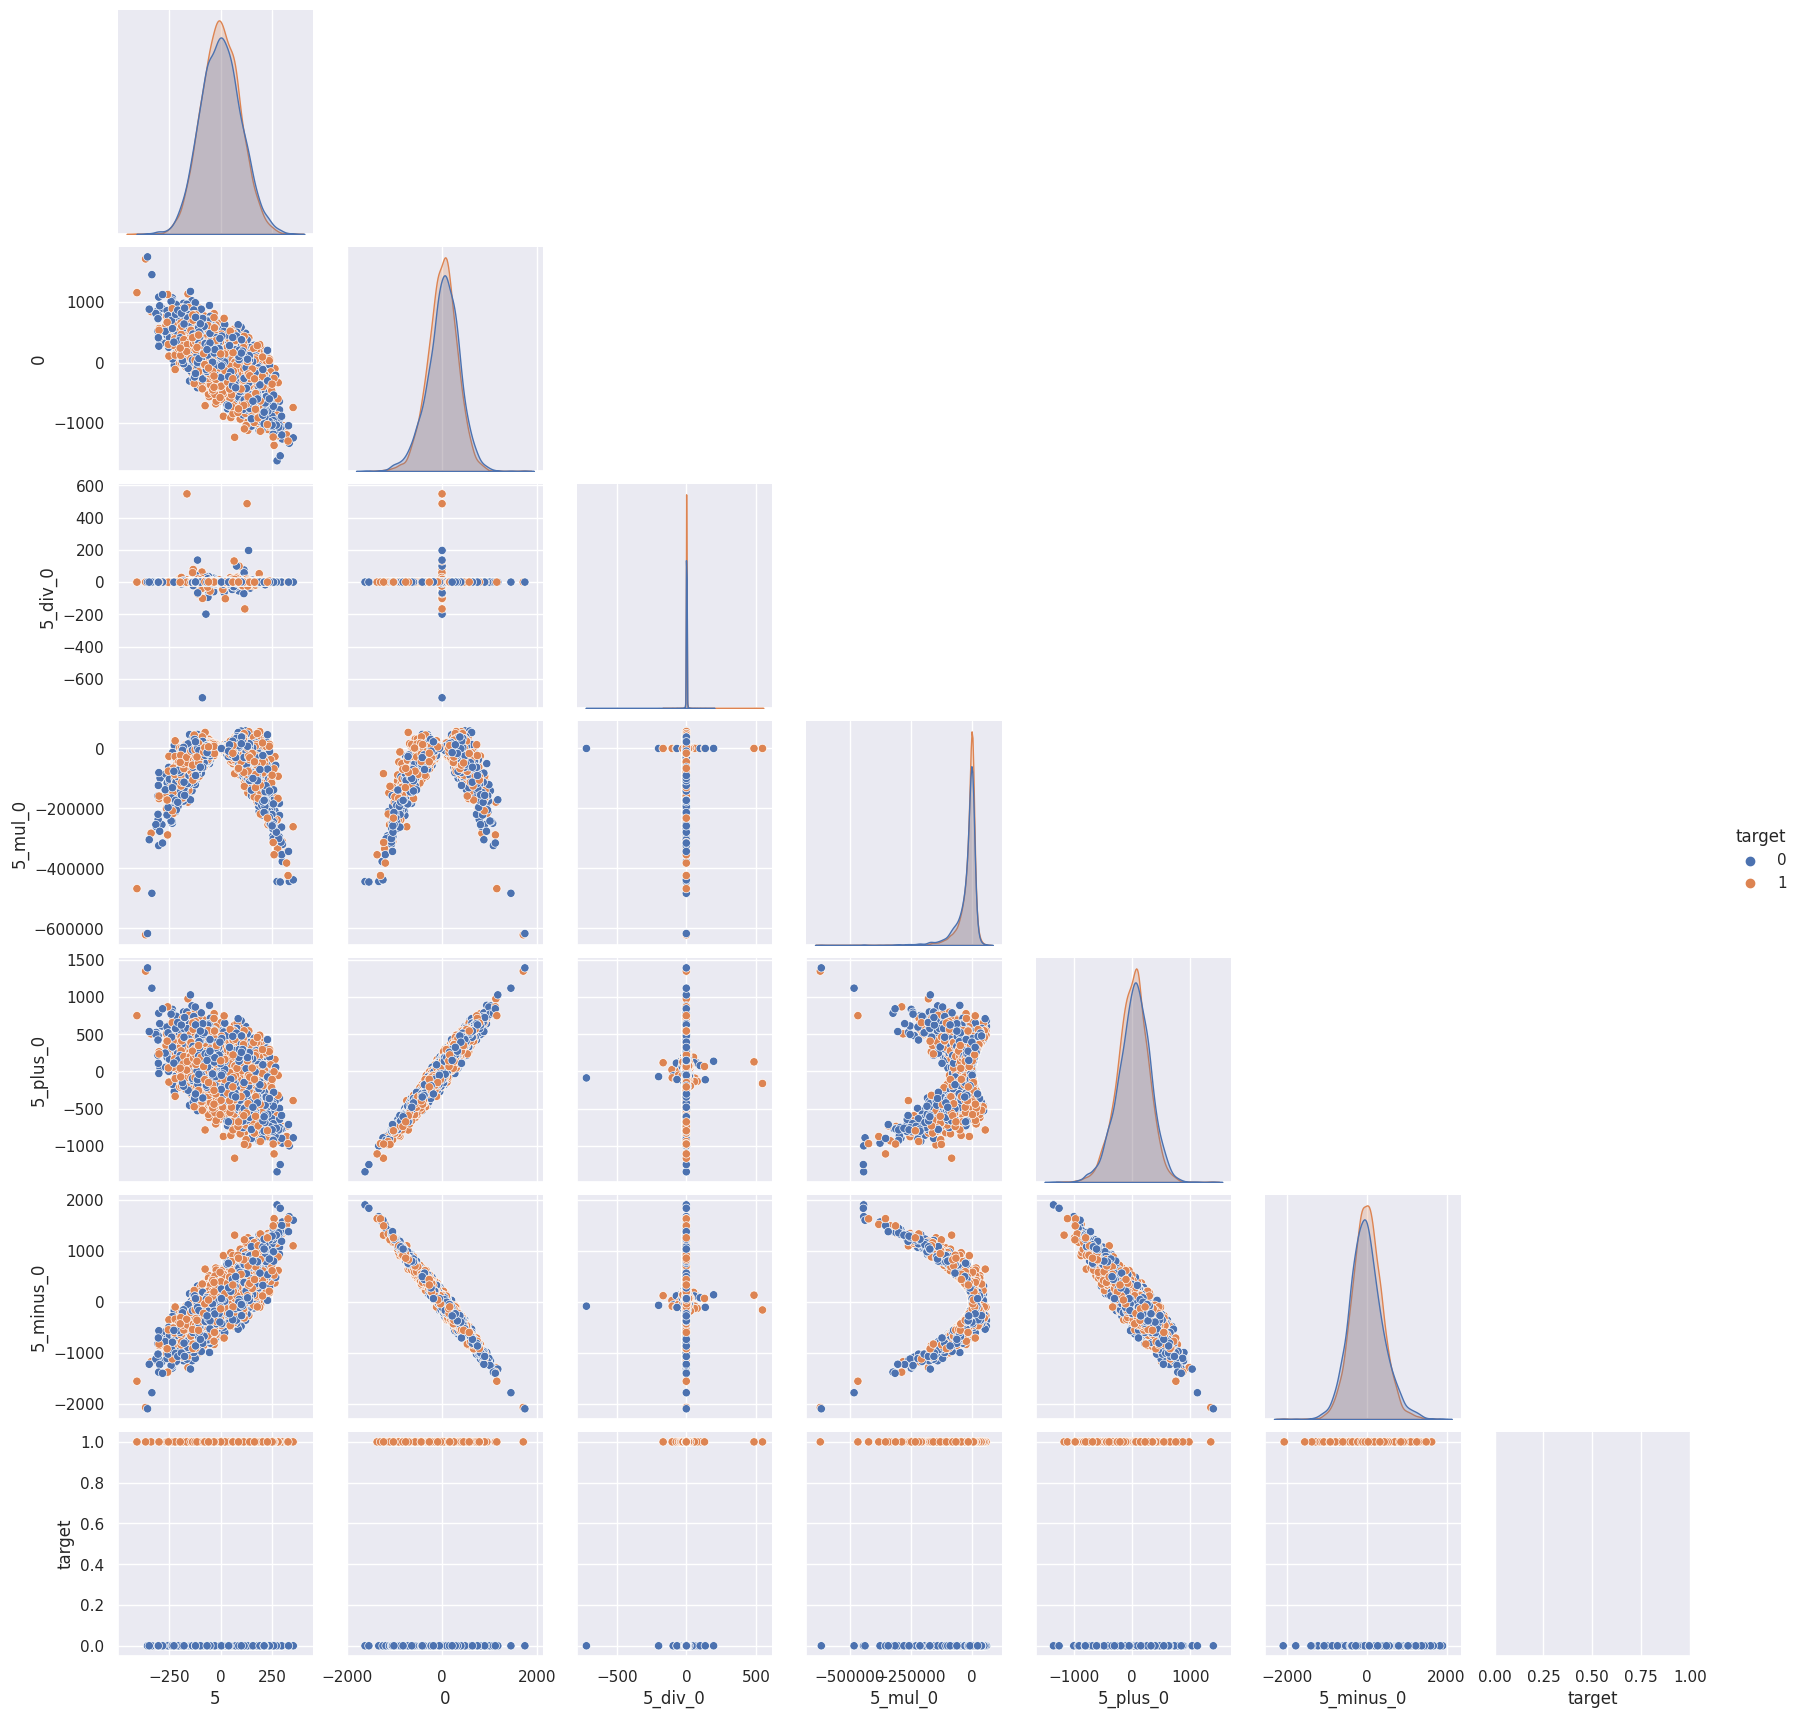

In [ ]:
sns.pairplot(
    exper3,
    vars=exper3[['5', '0', '5_div_0', '5_mul_0', '5_plus_0', '5_minus_0', 'target']],
    corner=True,
    hue="target",
);

In [ ]:
# смотрим топ признак (10)
exper4 = exper.copy()

In [ ]:
exper4['10_sqrt'] = abs(exper4['2']) ** 0.5
exper4['10_square'] = exper4['2'] ** 2
exper4['10_cube'] = exper4['2'] ** 3
exper4['10_exp'] = np.exp(np.clip(exper4['2'], a_min=None, a_max=100))
exper4['10_log'] = np.log1p(abs(exper4['2']) + 1)
exper4['10_reciprocal'] = 1 / exper4['2']
exper4['10_sin'] = np.sin(exper4['2'])
exper4['10_cos'] = np.cos(exper4['2'])
exper4['10_arctan'] = np.arctan(exper4['2'])
window_size = 3
exper4['10_mean_window'] = exper4['2'].rolling(window=window_size).mean()
exper4['10_std_window'] = exper4['2'].rolling(window=window_size).std()

In [ ]:
exper4.head()

0           1           2           3          4           5  \
0 -220.530530  -70.197440  119.035181   20.711737  -6.152986   52.225051   
1   -8.536541   -8.305435 -117.828269  -28.588333  14.223240  -42.087807   
2  126.229973  133.463504 -105.511797 -149.110267  -3.673355 -104.302244   
3  369.571563   11.850181 -299.969407   29.371721  -3.457523 -115.901854   
4  -99.563708  -85.166292  -73.363391  -35.357907   5.437025  -54.892519   

            6           8          10        11          12         13  \
0  -23.230903  -41.571463  271.292251  2.695313   44.529272  12.998666   
1  -45.538664   27.749744  -97.233793 -4.899233 -104.382283   2.867261   
2    5.815395  -46.240211  194.054804 -3.134316 -145.510845  86.972373   
3  159.134323 -108.847522 -215.802195 -1.724561 -128.050861 -99.997710   
4   56.430532  -50.054608 -115.997344 -0.058934   97.666751  36.416791   

           14          18          19         20          21          23  \
0   25.157748   49.566982  -36.818566  16.936420   46.543585 -146.652218   
1 -128.433975  -47.950176  103.060202  57.027508  121.304258   88.282912   
2 -126.200888  141.443443 -150.020696   4.819849   88.905713  -73.257358   
3  138.824836 -116.557681  310.894782  80.930568 -166.476192  108.222355   
4 -124.206264  -92.966637  121.929801  31.682235  209.163125  -62.067337   

           24        25          27          28         29  target  \
0   10.899085  4.370985   40.680890  -37.942655  33.838225       1   
1   66.766185 -4.363974  -32.101939  -52.255449  -4.826111       1   
2  108.947287  8.567240 -117.205053 -107.835928 -93.990332       0   
3   19.573192 -2.242024  -25.218215  121.674228 -16.877368       0   
4   58.109167  2.862082 -132.875142    3.492953 -15.799596       1   

   10_mean_window    10_sqrt     10_square       10_cube         10_exp  \
0             NaN  10.910325  14169.374373  1.686654e+06   2.688117e+43   
1             NaN  10.854873  13883.500967 -1.635869e+06   6.727179e-52   
2      -34.768295  10.271894  11132.739219 -1.174635e+06   1.502481e-46   
3     -174.436491  17.319625  89981.644972 -2.699174e+07  5.308135e-131   
4     -159.614865   8.565243   5382.187180 -3.948555e+05   1.376208e-32   

     10_log  10_reciprocal    10_sin    10_cos  10_arctan  10_std_window  
0  4.796081       0.008401 -0.338516  0.940961   1.562396            NaN  
1  4.786060      -0.008487  0.999828  0.018543  -1.562310            NaN  
2  4.677601      -0.009478  0.964185  0.265230  -1.561319     133.340001  
3  5.710326      -0.003334  0.998612 -0.052667  -1.567463     108.888974  
4  4.322322      -0.013631  0.894253 -0.447561  -1.557166     122.608842

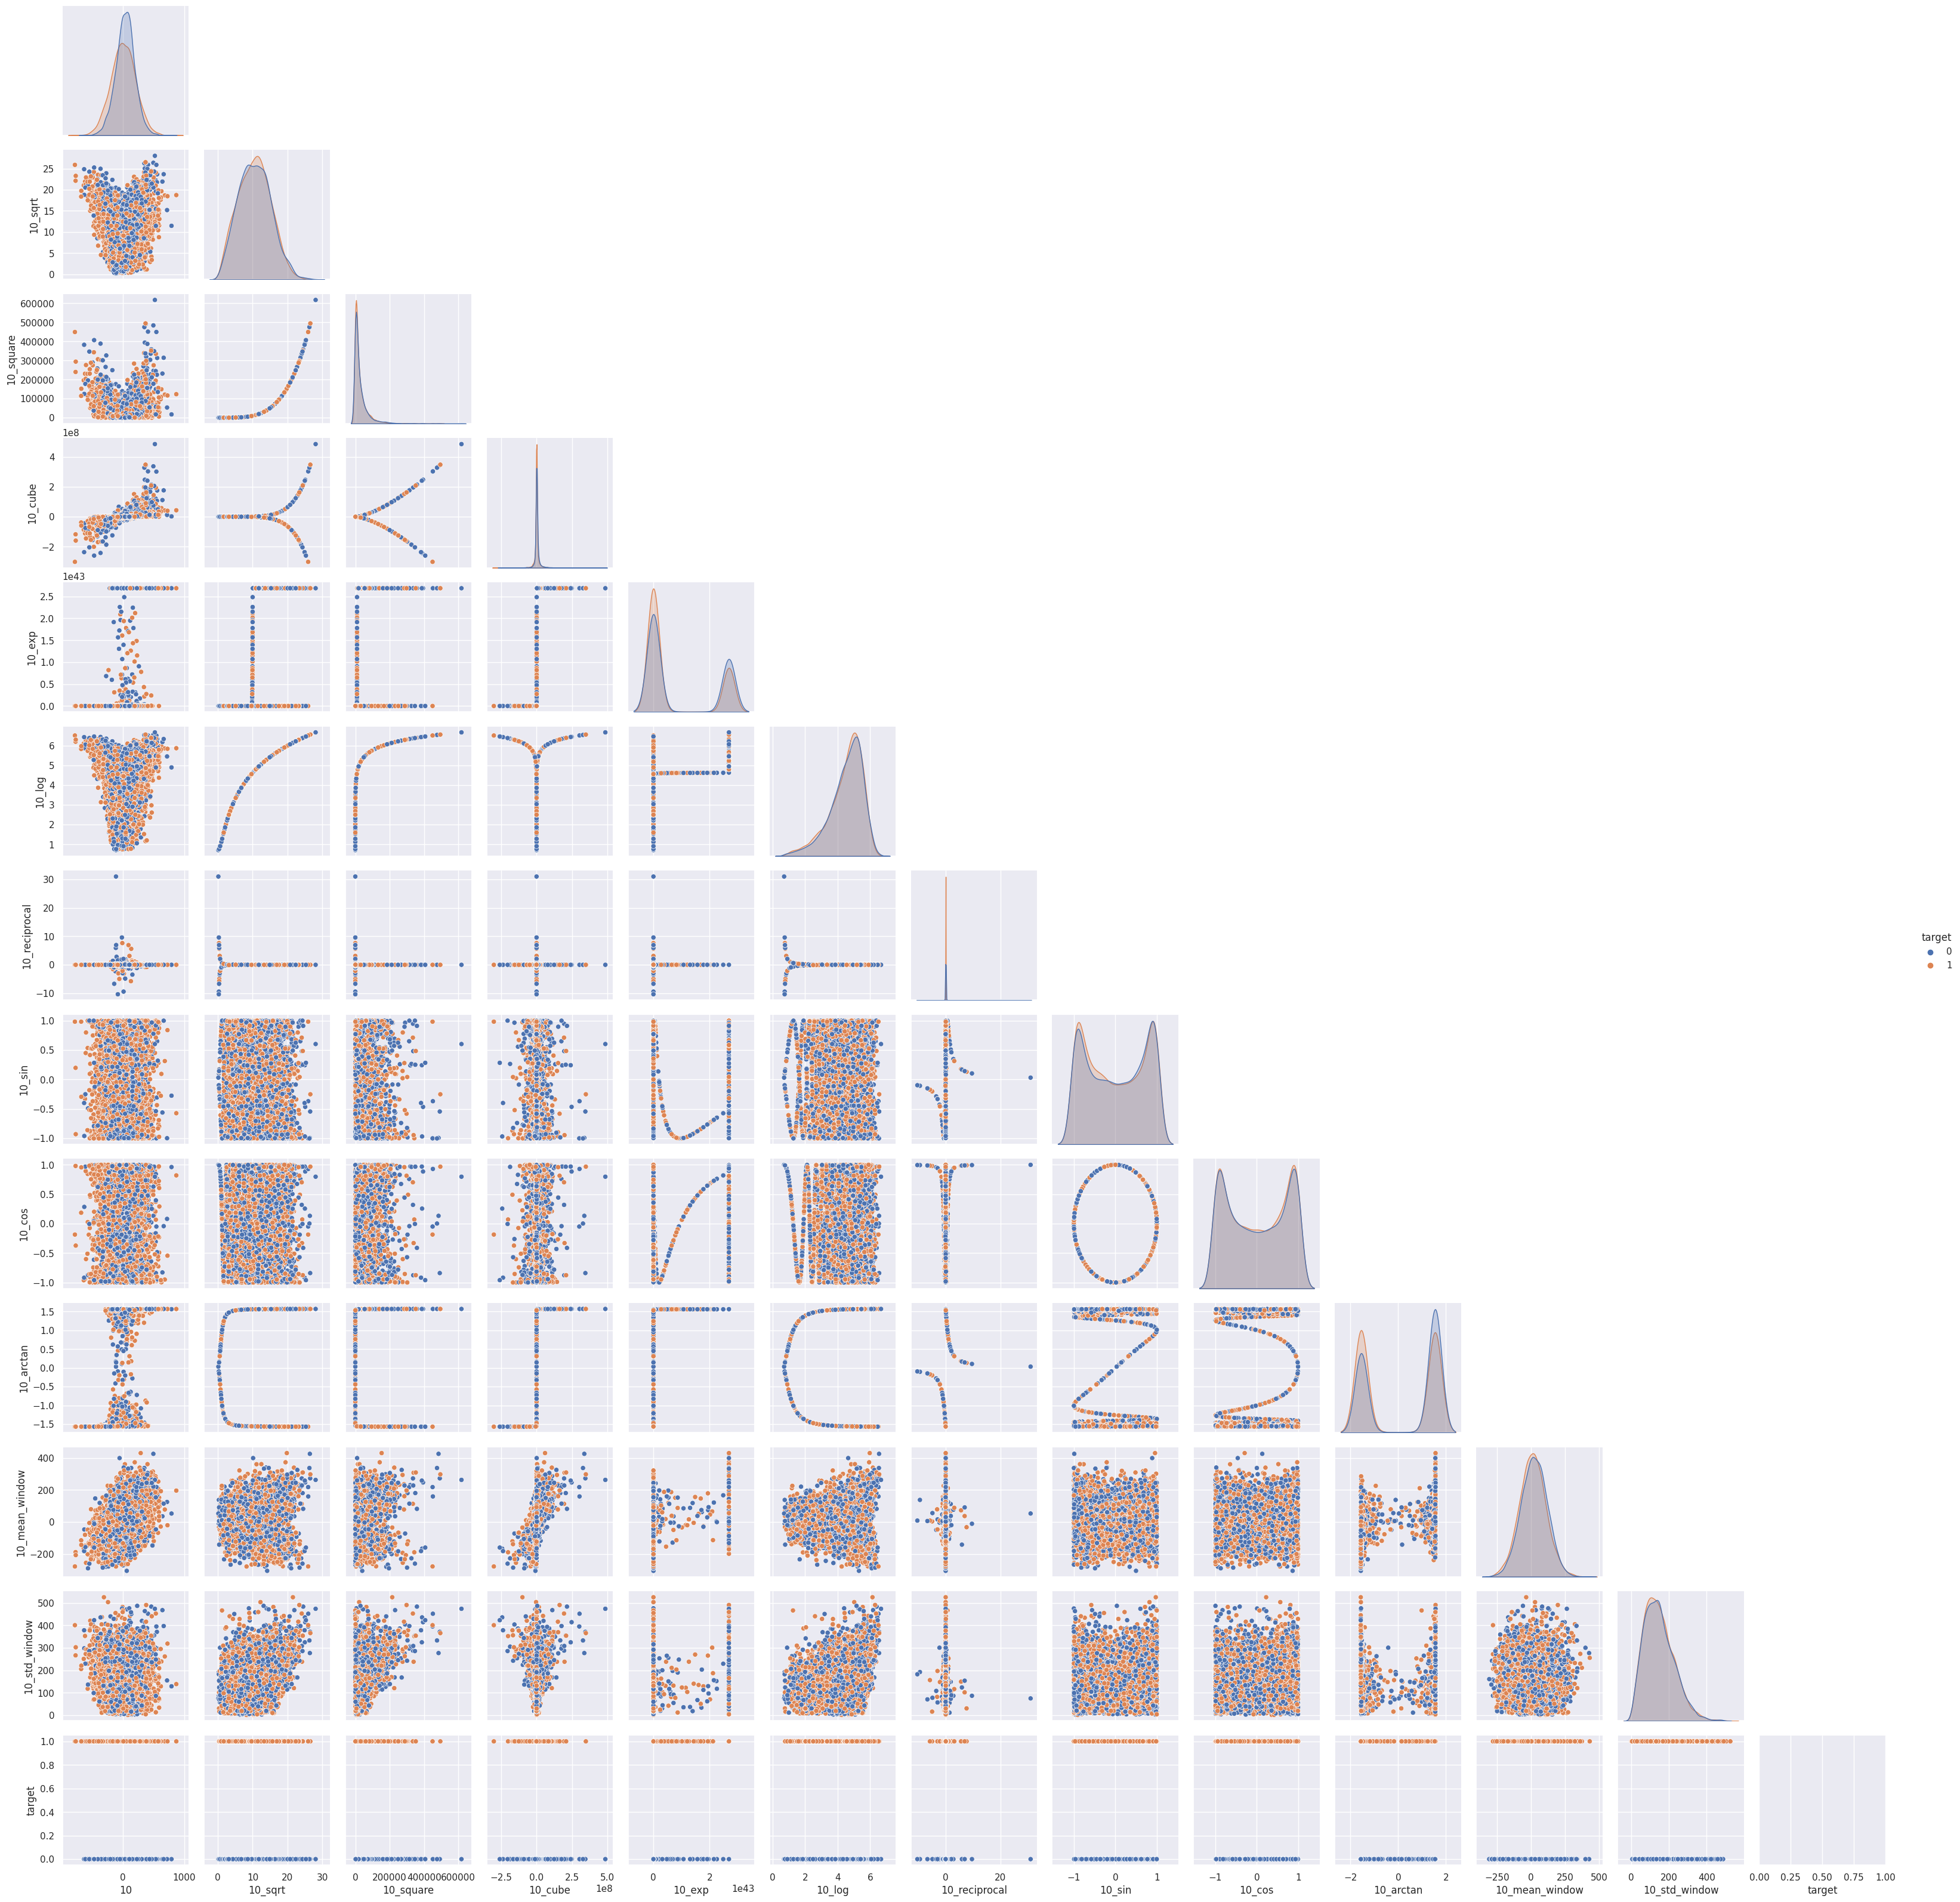

In [ ]:
sns.pairplot(
    exper4,
    vars=exper4[['10', '10_sqrt', '10_square', '10_cube', '10_exp', '10_log', '10_reciprocal', \
                 '10_sin', '10_cos', '10_arctan', '10_mean_window', '10_std_window', 'target']],
    corner=True,
    hue="target",
);

In [ ]:
window_size = 3
transform_df['10_mean_window'] = transform_df['10'].rolling(window=window_size).mean()

In [ ]:
window_size = 3
test_df['10_mean_window'] = test_df['10'].rolling(window=window_size).mean()

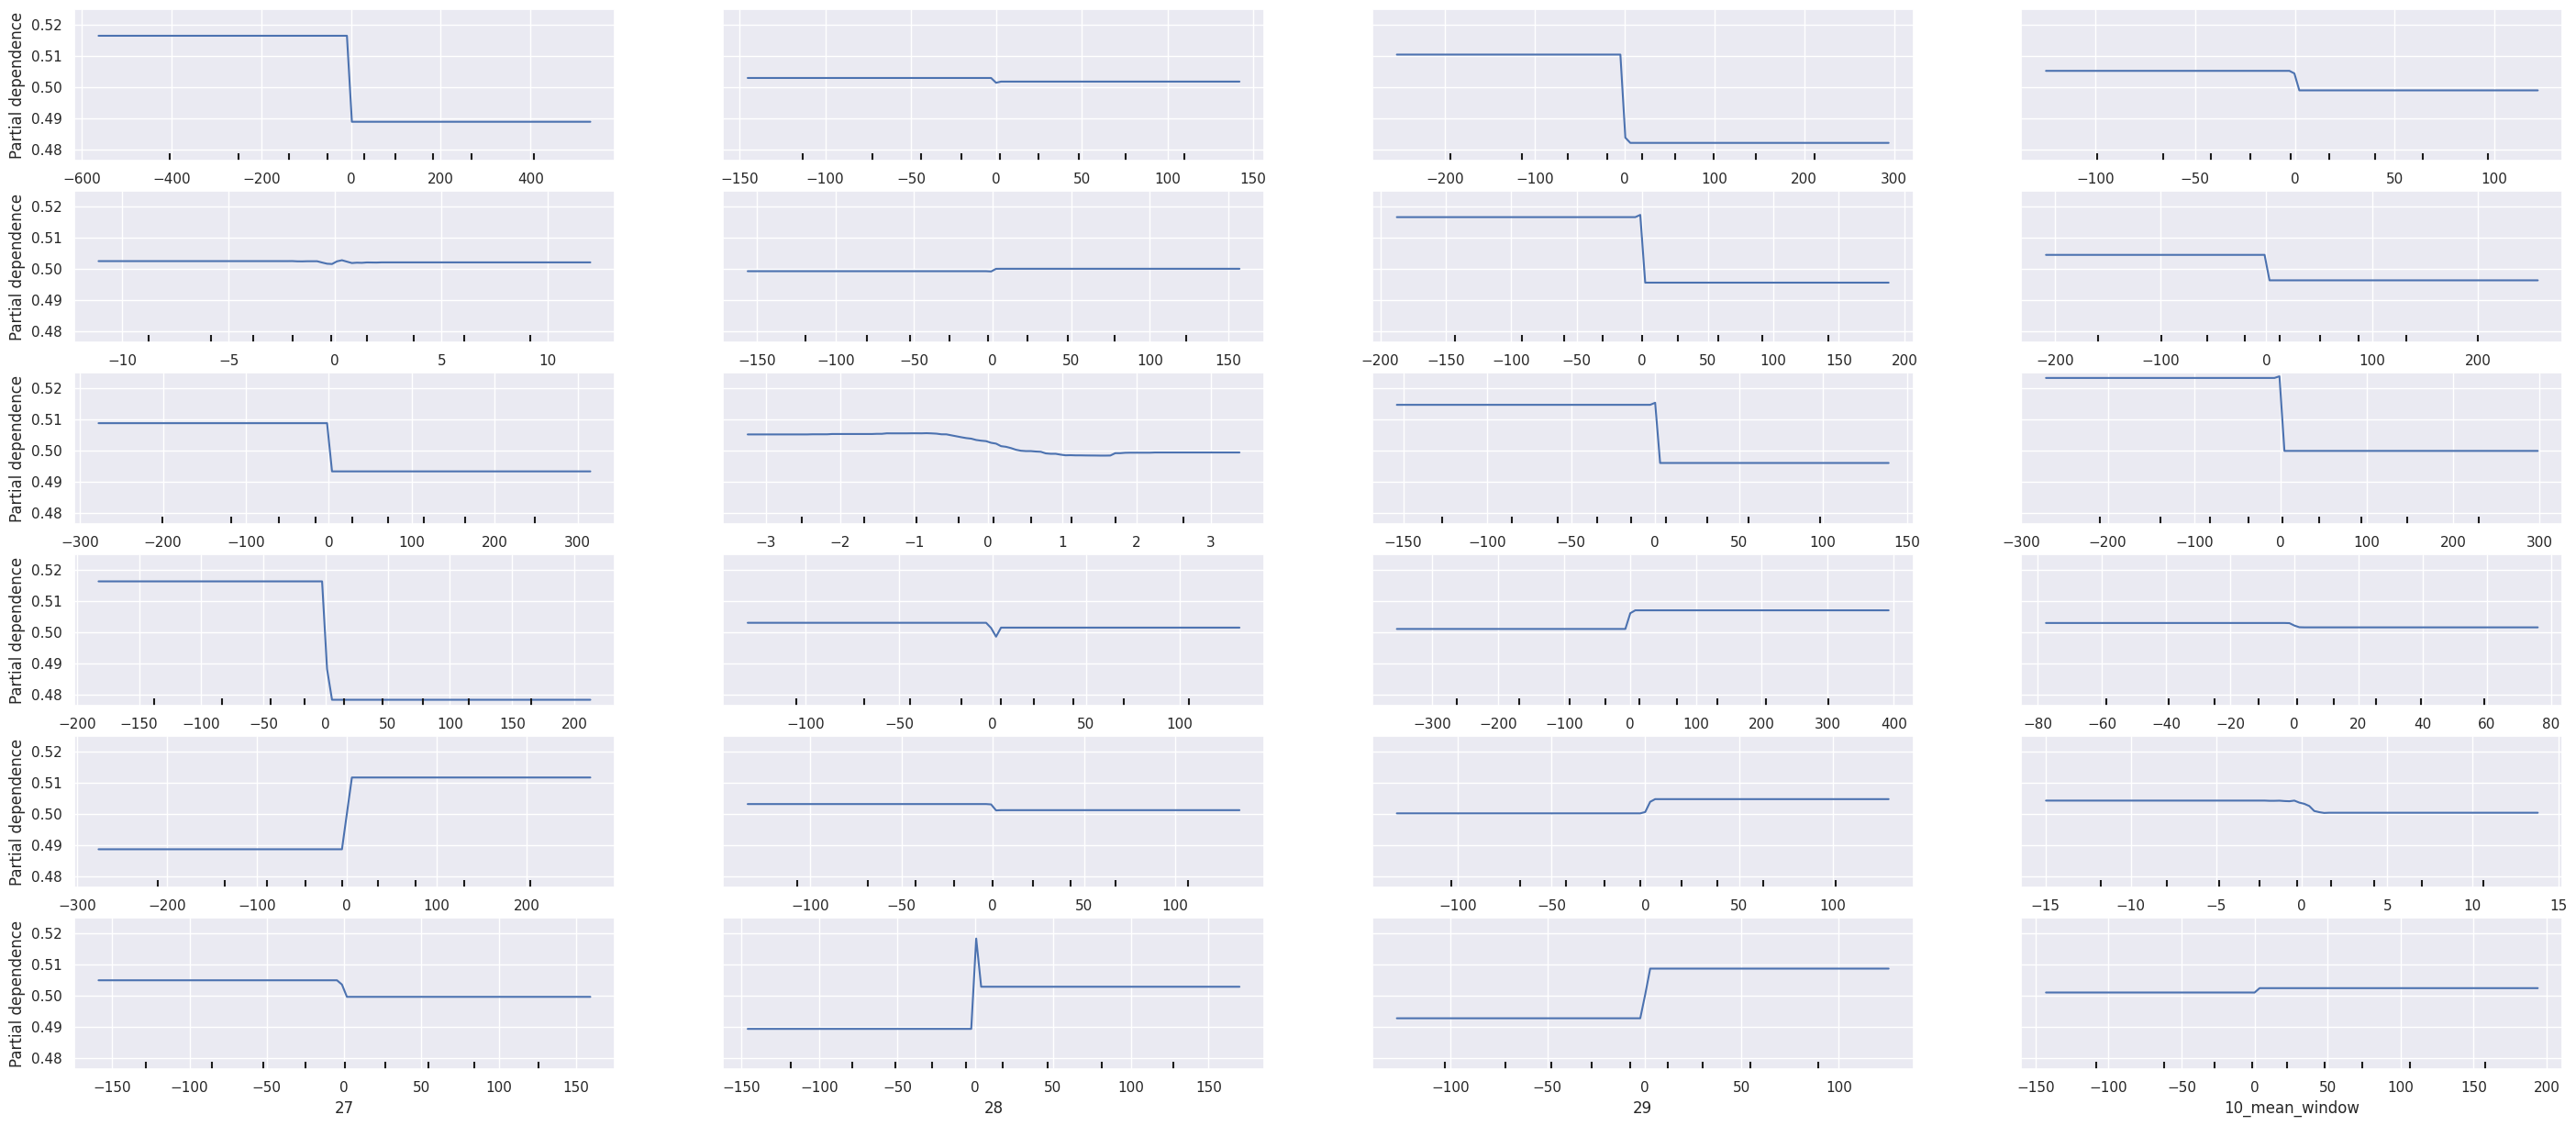

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

plt.rcParams['figure.figsize']=(35, 15)

features = ['0', '1', '2', '3', '4', '5', '6', '8', '10', '11', '12', '13', '14',
       '18', '19', '20', '21', '23', '24', '25', '27', '28', '29',
       '10_mean_window']

PartialDependenceDisplay.from_estimator(model1, x_test,
                                        features = features,
                                        target='target',
                                        n_cols=4,
                                        n_jobs=-1,
                                        random_state=42,)

## New_experiments with rows

In [ ]:
import scipy

In [ ]:
transform_df.columns

In [9]:
def sum_in_row(row):
    return row.sum()

transform_df['sum_in_row'] = transform_df.apply(sum_in_row, axis=1)
test_df['sum_in_row'] = test_df.apply(sum_in_row, axis=1)

In [ ]:
#def mean_in_row(row):
#    return scipy.stats.kstat(row)
#
#transform_df['mean_in_row'] = transform_df.apply(mean_in_row, axis=1)
#test_df['mean_in_row'] = test_df.apply(mean_in_row, axis=1)

In [ ]:
transform_df

In [ ]:
#def min_in_row(row):
#    return (row.max() - row.min()) / 2
#
#transform_df['std_in_row'] = transform_df.apply(min_in_row, axis=1)
#test_df['std_in_row'] = test_df.apply(min_in_row, axis=1)

In [10]:
transform_df['2_10'] = (transform_df['2'] + transform_df['10']) / 7
test_df['2_10'] = (transform_df['2'] + transform_df['10']) / 7         # 7 the best that's it with it

In [ ]:
#transform_df['new_one'] = (transform_df['sum_in_row'] + transform_df['2_10']) / 7
#test_df['new_one'] = (transform_df['sum_in_row'] + transform_df['2_10']) / 7

In [ ]:
sns.pairplot(
    transform_df,
    vars=transform_df.columns,
    corner=True,
    hue="target",
);

In [ ]:
sns.pairplot(
    test_df,
    vars=test_df.columns,
    corner=True,
);

In [ ]:
#['13_10'] = (transform_df['8'] + transform_df['14']) / 2
#test_df['13_10'] = (test_df['8'] + test_df['14']) / 2

In [ ]:
#transform_df['2_5'] = (transform_df['2'] + transform_df['5']) / 2
#test_df['2_5'] = (transform_df['2'] + transform_df['5']) / 2

In [ ]:
testing_df = transform_df.copy()

In [ ]:
testing_df['(8_14)'] = scipy.stats.gstd(abs(testing_df[['0', '5']]), axis=1)

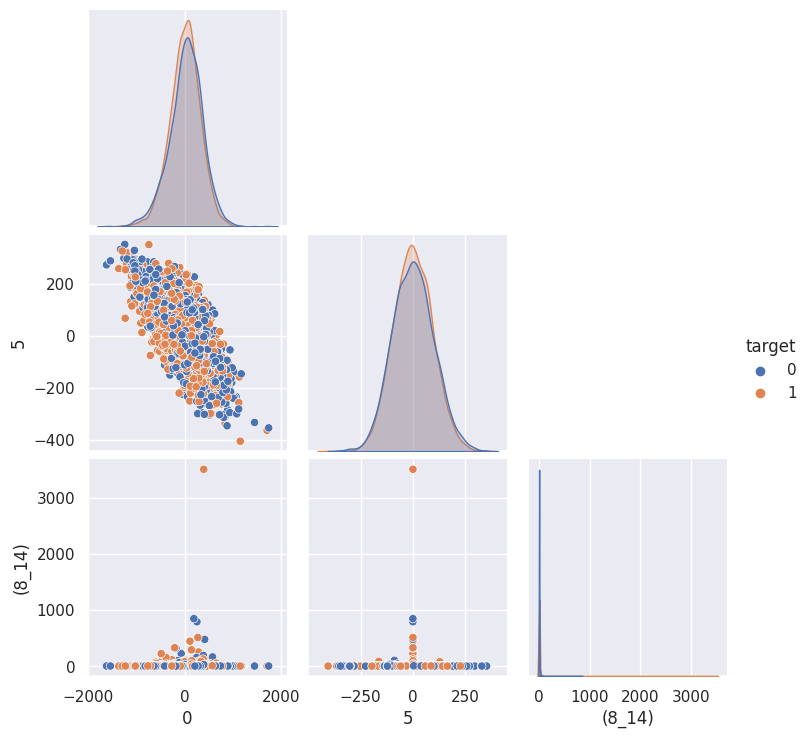

In [ ]:
sns.pairplot(
    testing_df,
    vars=testing_df[['0', '5', '(8_14)']],
    corner=True,
    hue="target",
);

In [ ]:
transform_df.columns

Index(['0', '2', '5', '6', '8', '10', '12', '13', '14', '19', '21', '28', '29',
       'target', 'sum_in_row', '2_10', 'mean_in_row'],
      dtype='object')

In [ ]:
sns.scatterplot(x=transform_df['mean_in_row'], y=transform_df['2'], hue=transform_df['target'])

In [ ]:
#transform_df['0_5'] = (transform_df['0'] + transform_df['5']) / 4
#test_df['0_5'] = (transform_df['0'] + transform_df['5']) / 4

In [ ]:
from sklearn.manifold import TSNE

features = transform_df[[i for i in transform_df.columns if i not in 'target']]
tsne = TSNE(n_components=3, random_state=10)
projections = tsne.fit_transform(features)

In [ ]:
projections = pd.DataFrame(projections)

In [ ]:
projections['target'] = transform_df['target']

In [ ]:
projections.columns

Index([0, 1, 'target'], dtype='object')

In [ ]:
sns.scatterplot(x=0, y=1, data=projections, hue='target')

In [ ]:
projections2 = tsne.fit_transform(test_df)

In [ ]:
projections2_df = pd.DataFrame(projections2)

In [ ]:
#transform_df['new0'] = projections[0]
#transform_df['new1'] = projections[1]
#transform_df['new2'] = projections[2]

In [ ]:
#test_df['new0'] = projections2_df[0]
#test_df['new1'] = projections2_df[1]
#test_df['new2'] = projections2_df[2]

In [ ]:
from boruta import BorutaPy

In [ ]:
data = transform_df[(i for i in transform_df.columns if i != 'target')]
target = transform_df['target']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=10)

In [ ]:
forest = RandomForestClassifier(
   n_jobs = -1,
   max_depth = 5
)
boruta = BorutaPy(
   estimator = forest,
   n_estimators = 'auto',
   max_iter = 15,
   verbose=1
)
### fit Boruta (it accepts np.array, not pd.DataFrame)
boruta.fit(np.array(x_train), np.array(y_train))

green_area = x_train.columns[boruta.support_].to_list()
blue_area = x_train.columns[boruta.support_weak_].to_list()
red_area = x_train.columns[~(boruta.support_ | boruta.support_weak_)].to_list()
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)
print('features in the red area:', red_area)

Iteration: 1 / 15
Iteration: 2 / 15
Iteration: 3 / 15
Iteration: 4 / 15
Iteration: 5 / 15
Iteration: 6 / 15
Iteration: 7 / 15
Iteration: 8 / 15


BorutaPy finished running.

Iteration: 	9 / 15
Confirmed: 	16
Tentative: 	0
Rejected: 	0
features in the green area: ['0', '2', '5', '6', '8', '10', '12', '13', '14', '19', '21', '28', '29', 'sum_in_row', '2_10', 'new_one']
features in the blue area: []
features in the red area: []


In [ ]:
selected_rf_features = pd.DataFrame({'Feature':list(data.columns),
                                       'Ranking':boruta.ranking_}).sort_values(by='Ranking')
selected_rf_features

## eda

In [ ]:
transform_df.duplicated().sum()

0

In [ ]:
transform_df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '8', '10', '11', '12', '13', '14',
       '18', '19', '20', '21', '23', '24', '25', '27', '28', '29', 'target',
       'max_in_row'],
      dtype='object')

In [ ]:
def max_in_row(row):
    return row.max()

transform_df['max_in_row'] = transform_df.apply(max_in_row, axis=1)
test_df['max_in_row'] = test_df.apply(max_in_row, axis=1)

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 15))

for i, ax in enumerate(axes.flatten()):
    if str(i) in ['7', '22', '9', '15', '16', '26', '17']:
      continue
    class_0 = transform_df[transform_df['target'] == 0][f'{i}']
    class_1 = transform_df[transform_df['target'] == 1][f'{i}']

    ax.hist(class_0, bins=int(np.log2(len(transform_df))), alpha=0.5, color='blue', label='0')
    ax.hist(class_1, bins=int(np.log2(len(transform_df))), alpha=0.3, color='orange', label='1')

    ax.set_title(f'{i}')
    ax.legend()

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 15))

for i, ax in enumerate(axes.flatten()):
    if str(i) in ['7', '22', '9', '15', '16', '26', '17']:
      continue
    ax = transform_df[f'{i}'].plot(kind='box',
                                 title=f'{i}',
                                 ax=ax)

<Axes: >

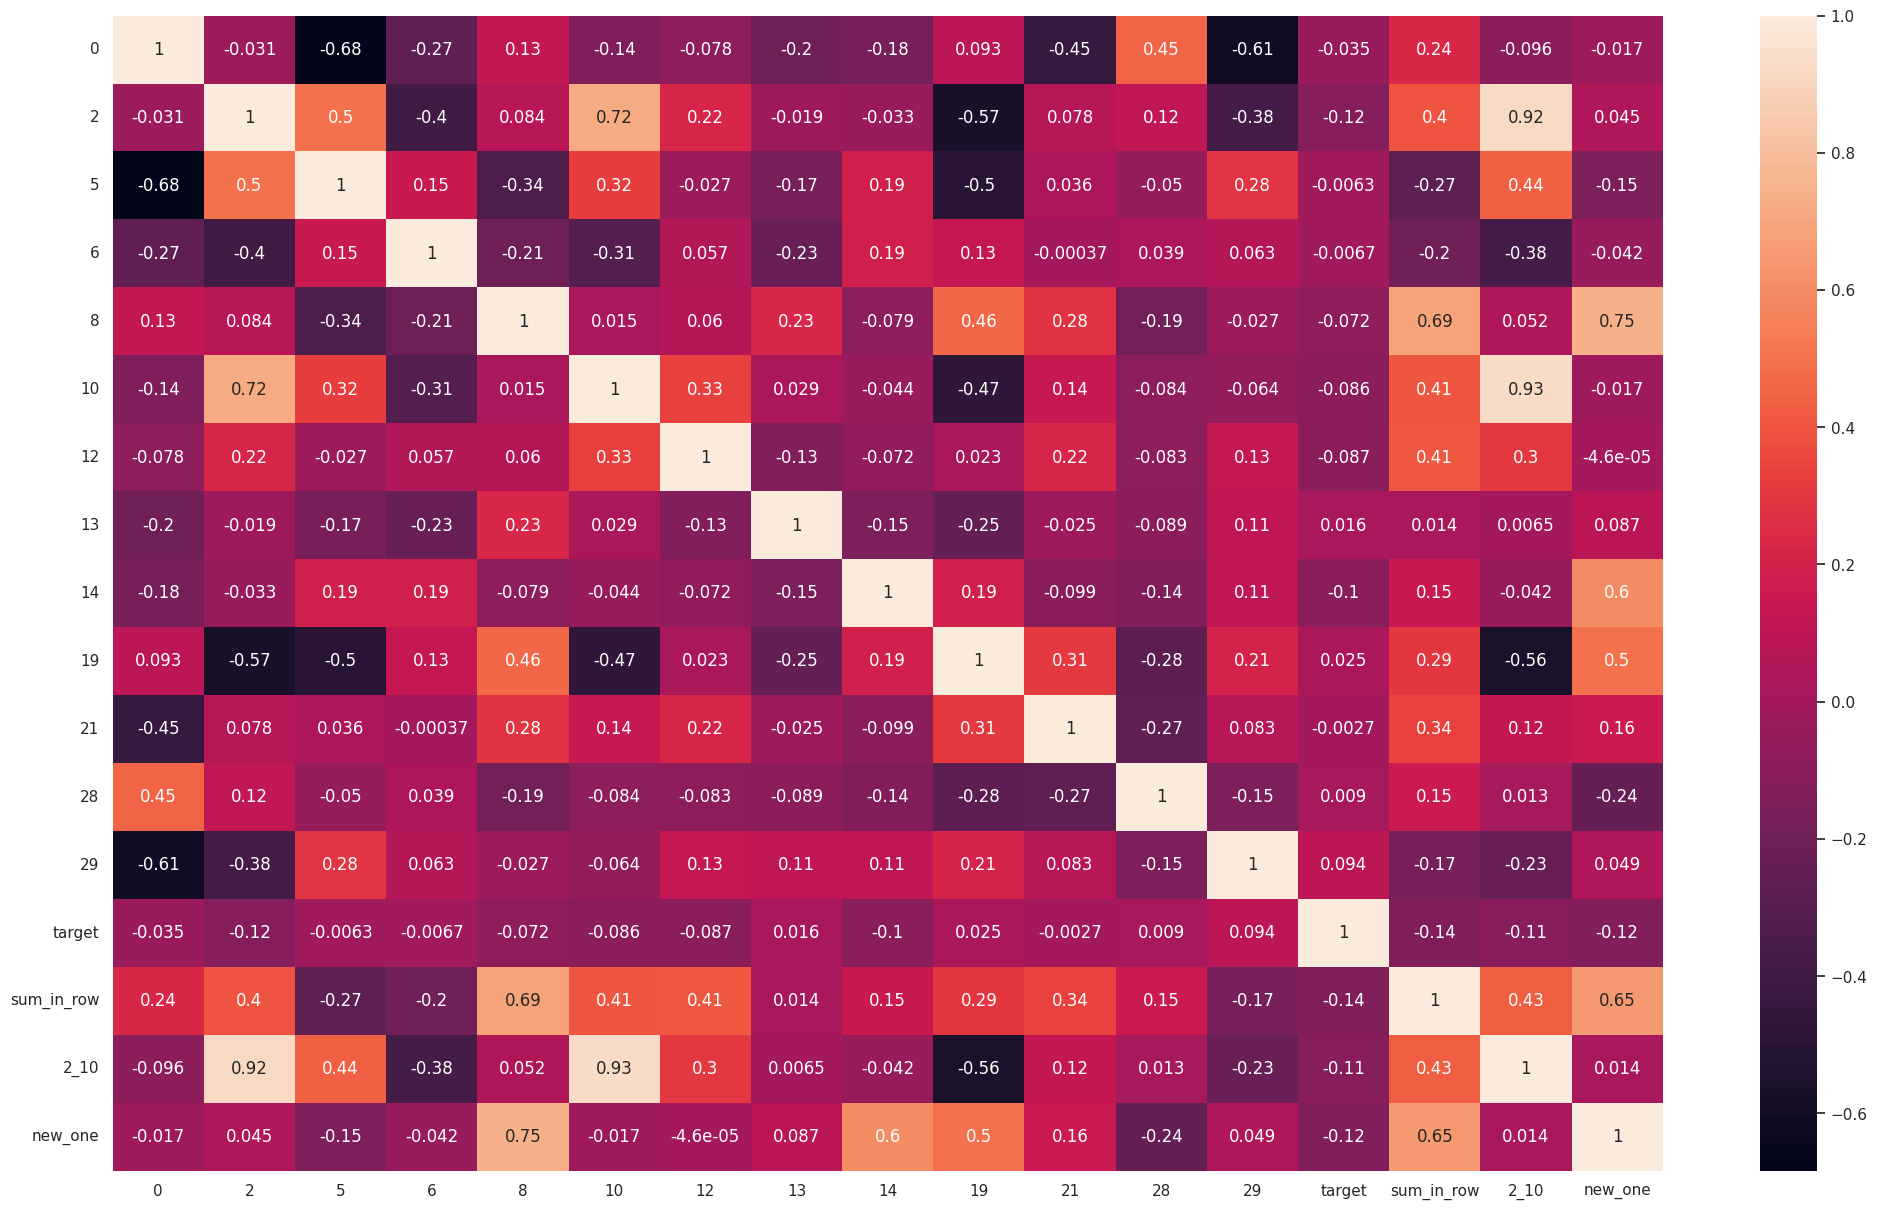

In [ ]:
fig, axes = plt.subplots(figsize=(25, 15))
sns.heatmap(transform_df.corr(), annot=True)

### continue with non linear corr matrix

In [ ]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

interval columns not set, guessing: ['0', '2', '5', '6', '8', '10', '12', '13', '14', '19', '21', '28', '29', 'target', 'sum_in_row', '2_10', 'new_one']


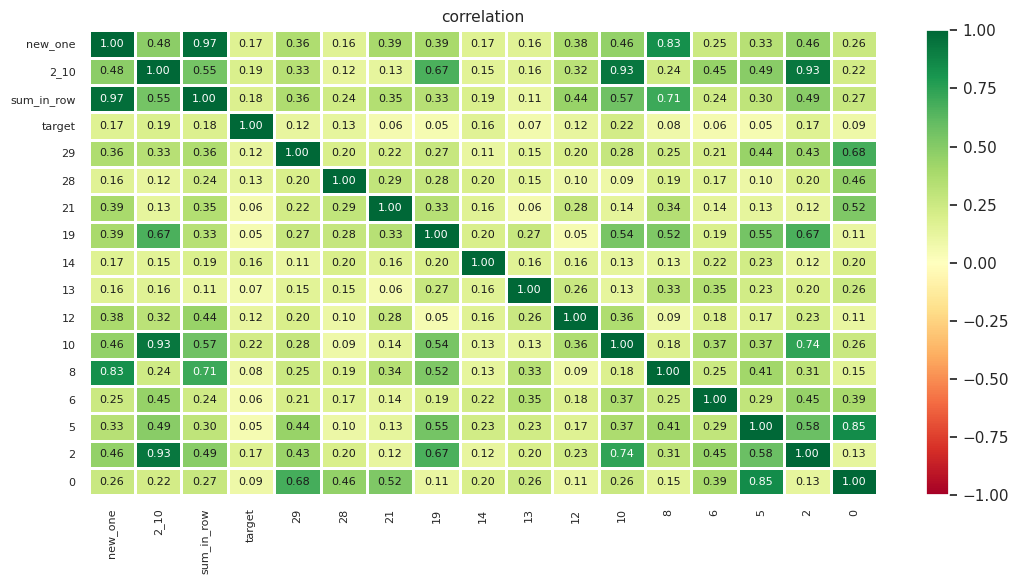

In [ ]:
phik_overview = transform_df.phik_matrix().round(2)

plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        fontsize_factor=0.8, figsize=(11, 6))

interval columns not set, guessing: ['0', '2', '5', '6', '8', '10', '12', '13', '14', '19', '21', '28', '29', 'target', 'sum_in_row', '2_10', 'new_one']


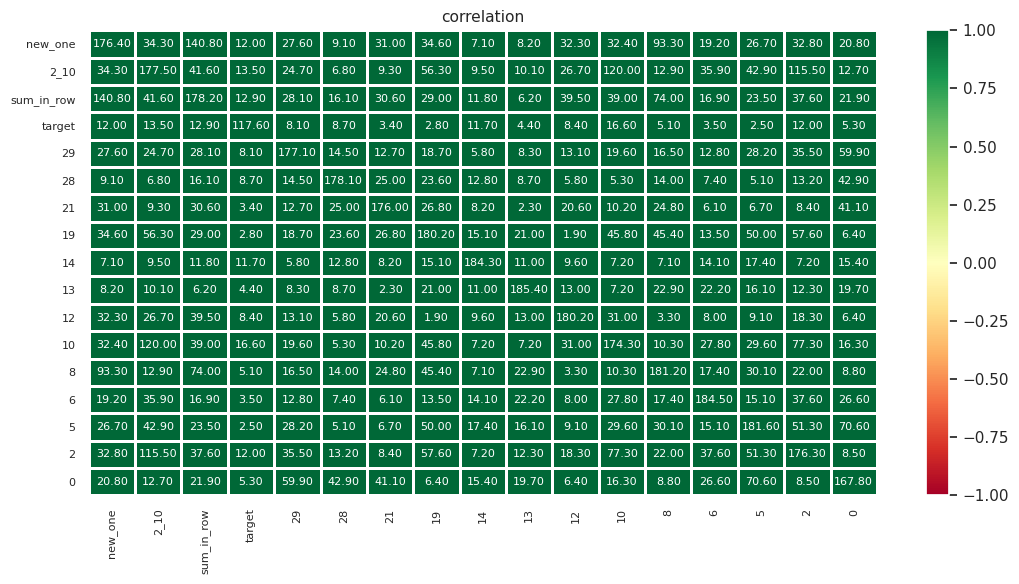

In [ ]:
phik_overview = transform_df.significance_matrix().round(1)

plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        fontsize_factor=0.8, figsize=(11, 6))

In [ ]:
for i in train_df.columns:
    print(i, len(transform_df[i].unique()))

In [ ]:
test_df = test_df[(i for i in transform_df.columns if i != 'target')]

In [ ]:
sns.pairplot(
    transform_df,
    vars=transform_df.columns,
    corner=True,
    hue="target",
);

In [ ]:
sns.pairplot(
    test_df,
    vars=test_df.columns,
    corner=True,
);

### feature importance (permutation)

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
data = transform_df[(i for i in transform_df.columns if i != 'target')]
target = transform_df['target']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=7)

In [ ]:
model = CatBoostClassifier(
    random_state=9,
    thread_count=-1,
    iterations=886,
    learning_rate=0.006983523163319313,
    depth=10,
    l2_leaf_reg=11.660922016066483,
    bootstrap_type='Bayesian',
    random_strength=2.3676764768135513e-05,
    bagging_temperature=0.7602192265140637,
    od_type='Iter',
    od_wait=34
)
model.fit(x_train, y_train,
          eval_set=(x_test, y_test),
          verbose=100, plot=False,
          early_stopping_rounds=1000,
          use_best_model=True)

0:	learn: 0.6914456	test: 0.6917191	best: 0.6917191 (0)	total: 40.9ms	remaining: 36.2s
100:	learn: 0.5770674	test: 0.6060793	best: 0.6060793 (100)	total: 4.16s	remaining: 32.3s
200:	learn: 0.5186415	test: 0.5668051	best: 0.5668051 (200)	total: 8.22s	remaining: 28s
300:	learn: 0.4788010	test: 0.5440180	best: 0.5440180 (300)	total: 14.4s	remaining: 27.9s
400:	learn: 0.4497774	test: 0.5295172	best: 0.5295172 (400)	total: 18.5s	remaining: 22.4s
500:	learn: 0.4272277	test: 0.5199206	best: 0.5199206 (500)	total: 22.5s	remaining: 17.3s
600:	learn: 0.4076552	test: 0.5132776	best: 0.5132776 (600)	total: 28.6s	remaining: 13.6s
700:	learn: 0.3909174	test: 0.5078883	best: 0.5078883 (700)	total: 32.8s	remaining: 8.64s
800:	learn: 0.3764442	test: 0.5040571	best: 0.5040571 (800)	total: 36.8s	remaining: 3.9s
885:	learn: 0.3650823	test: 0.5013154	best: 0.5013154 (885)	total: 41.6s	remaining: 0us

bestTest = 0.5013153841
bestIteration = 885



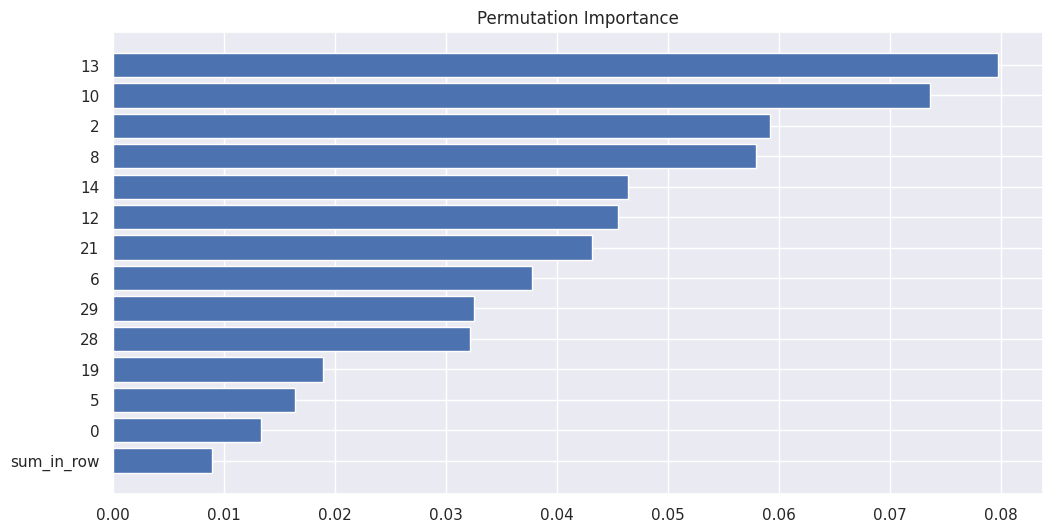

In [ ]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model, data, target, n_repeats=10, random_state=7)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(data.columns)[sorted_idx])
plt.title('Permutation Importance');

## find the best params for models (optuna)

In [337]:
from sklearn.model_selection import train_test_split
import optuna
from optuna.samplers import TPESampler

In [338]:
data = transform_df[(i for i in transform_df.columns if i != 'target')]
target = transform_df['target']

In [339]:
train_x, valid_x, train_y, valid_y = train_test_split(data, target, test_size=0.2, random_state=10)

In [ ]:
def objective(trial):
    train_x, valid_x, train_y, valid_y = train_test_split(data, target, test_size=0.2, random_state=7)
    dtrain = lgb.Dataset(train_x, label=train_y)

    param = {
        "objective": "binary",
        "metric": "binary_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }

    gbm = lgb.train(param, dtrain)
    preds = gbm.predict(valid_x)
    pred_labels = np.rint(preds)
    roc_auc = sklearn.metrics.roc_auc_score(valid_y, pred_labels)
    return roc_auc

In [ ]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

sampler = TPESampler(seed=9)
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=1000)
print("number of finished trials: " + f'{len(study.trials)}')
print("best trial:")
trial = study.best_trial
print(f'{trial.value}')
print("params: ")
for key, value in trial.params.items():
    print(f'{key}: {value}')

number of finished trials: 1000
best trial:
0.7865913172874223
params: 
lambda_l1: 4.370352980205615
lambda_l2: 0.07503288175967841
num_leaves: 69
feature_fraction: 0.8230763911164907
bagging_fraction: 0.9779092862531285
bagging_freq: 1
min_child_samples: 42


best trial:
0.7987379963083288
params:
lambda_l1: 4.487366164713076
lambda_l2: 0.0655379256337531
num_leaves: 164
feature_fraction: 0.8524457170065015
bagging_fraction: 0.9586354490599466
bagging_freq: 1
min_child_samples: 10

In [15]:
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
valid_x = scaler.fit_transform(valid_x)

In [16]:
from catboost import CatBoostClassifier

In [18]:
def objective(trial):
    model = CatBoostClassifier(
        iterations=trial.suggest_int("iterations", 100, 1500),
        learning_rate=trial.suggest_float("learning_rate", 1e-3, 5e-1, log=True),
        depth=trial.suggest_int("depth", 4, 10),
        l2_leaf_reg=trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        bootstrap_type=trial.suggest_categorical("bootstrap_type", ["Bayesian"]),
        random_strength=trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        bagging_temperature=trial.suggest_float("bagging_temperature", 0.0, 10.0),
        od_type=trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        od_wait=trial.suggest_int("od_wait", 10, 50),
        verbose=100
    )
    model.fit(train_x, train_y)
    y_pred = model.predict(valid_x)
    return sklearn.metrics.roc_auc_score(valid_y, y_pred)

In [19]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

sampler = TPESampler(seed=10)
study1 = optuna.create_study(study_name="catboost", direction="maximize", sampler=sampler)
study1.optimize(objective, n_trials=6000, show_progress_bar=True)

  0%|          | 0/6000 [00:00<?, ?it/s]

Выходные данные были обрезаны до нескольких последних строк (5000).
1200:	learn: 0.0177329	total: 1m 3s	remaining: 7.03s
1300:	learn: 0.0139867	total: 1m 8s	remaining: 1.73s
1333:	learn: 0.0129664	total: 1m 10s	remaining: 0us
0:	learn: 0.6903391	total: 82.2ms	remaining: 1m 56s
100:	learn: 0.5589155	total: 3.66s	remaining: 47.7s
200:	learn: 0.5044120	total: 6.54s	remaining: 39.6s
300:	learn: 0.4717975	total: 9.39s	remaining: 34.8s
400:	learn: 0.4478237	total: 12.7s	remaining: 32.1s
500:	learn: 0.4284946	total: 17s	remaining: 31.1s
600:	learn: 0.4103990	total: 19.9s	remaining: 27s
700:	learn: 0.3957240	total: 22.8s	remaining: 23.3s
800:	learn: 0.3822703	total: 25.7s	remaining: 19.7s
900:	learn: 0.3693868	total: 30.4s	remaining: 17.4s
1000:	learn: 0.3571102	total: 33.3s	remaining: 13.8s
1100:	learn: 0.3464609	total: 36.2s	remaining: 10.4s
1200:	learn: 0.3360633	total: 39s	remaining: 6.99s
1300:	learn: 0.3256490	total: 43.4s	remaining: 3.84s
1400:	learn: 0.3166251	total: 46.7s	remaining: 4

KeyboardInterrupt: ignored

In [20]:
print("number of finished trials: " + f'{len(study1.trials)}')
print("best trial:")
trial1 = study1.best_trial
print(f'{trial1.value}')
print("params: ")
for key, value in trial1.params.items():
    print(f'{key}: {value}')

number of finished trials: 683
best trial:
0.8210875688817991
params: 
iterations: 1115
learning_rate: 0.020325145950383816
depth: 9
l2_leaf_reg: 10.4036072140756
bootstrap_type: Bayesian
random_strength: 6.098828918596142e-07
bagging_temperature: 0.3212069787687375
od_type: IncToDec
od_wait: 26


best trial:
0.8054896328553617
params:
iterations: 886
learning_rate: 0.006983523163319313
depth: 10
l2_leaf_reg: 11.660922016066483
bootstrap_type: Bayesian
random_strength: 2.3676764768135513e-05
bagging_temperature: 0.7602192265140637
od_type: Iter
od_wait: 34

best trial:
0.8053826345658642
params:
iterations: 885
learning_rate: 0.020312337334409007
depth: 8
l2_leaf_reg: 0.09826235752974946
bootstrap_type: Bayesian
random_strength: 0.00010133126854307886
bagging_temperature: 3.0064943761211733
od_type: Iter
od_wait: 27

best trial:
0.8210875688817991
params:
iterations: 1115
learning_rate: 0.020325145950383816
depth: 9
l2_leaf_reg: 10.4036072140756
bootstrap_type: Bayesian
random_strength: 6.098828918596142e-07
bagging_temperature: 0.3212069787687375
od_type: IncToDec
od_wait: 26

In [ ]:
data = transform_df[(i for i in transform_df.columns if i != 'target')]
target = transform_df['target']

In [ ]:
from optuna.integration import CatBoostPruningCallback
from catboost import CatBoostClassifier

def objective_catboost(trial):
    X_train = transform_df.drop(columns='target')
    y_train = transform_df['target']
    X_train, X_test, y_train, y_test = train_test_split(
        X_train, y_train, test_size=0.2, random_state=8
    )

    param = {
        'iterations' : trial.suggest_int("iterations", 100, 1000), # Можно не перебирать, есть Early-Stopping
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.01),
        "l2_leaf_reg": trial.suggest_int("l2_leaf_reg", 2, 50),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.8),

        "auto_class_weights": trial.suggest_categorical("auto_class_weights", ["SqrtBalanced", "Balanced", "None"]),
        "depth": trial.suggest_int("depth", 3, 9),

        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
        "used_ram_limit": "14gb",
        "loss_function": 'Logloss',
        "eval_metric": "AUC", # Тоже стоит заранее определиться
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    clf = CatBoostClassifier(
        **param, thread_count=-1, random_seed=10
    )

    # Создаем объект callback
    pruning_callback = CatBoostPruningCallback(trial, "AUC")

    clf.fit(
        X_train,
        y_train,
        eval_set=(X_test, y_test),
        verbose=100,
        plot=False,
        callbacks=[pruning_callback],
    )  # Добавляем callback в fit

    # запускаем процесс прунинга
    pruning_callback.check_pruned()

    y_pred = clf.predict(X_test)
    accuracy = roc_auc_score(y_pred, y_test)
    return accuracy

In [ ]:
study = optuna.create_study(pruner=optuna.pruners.MedianPruner(n_warmup_steps=5), direction="maximize")
study.optimize(objective_catboost,
               n_trials=100,
               n_jobs = -1,
               show_progress_bar=True,)

[I 2023-12-03 07:13:56,317] A new study created in memory with name: no-name-b712c3ef-02f1-4f77-913e-448b8c792223


  0%|          | 0/100 [00:00<?, ?it/s]

<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.5000000	best: 0.5000000 (0)	total: 24.3ms	remaining: 12.5s
0:	test: 0.6815612	best: 0.6815612 (0)	total: 146ms	remaining: 36.9s
100:	test: 0.6350598	best: 0.6353545 (60)	total: 2.11s	remaining: 8.64s
200:	test: 0.6371297	best: 0.6415187 (125)	total: 3.93s	remaining: 6.14s
300:	test: 0.6403689	best: 0.6443776 (235)	total: 5.3s	remaining: 3.77s
400:	test: 0.6383845	best: 0.6443776 (235)	total: 7.05s	remaining: 2s
100:	test: 0.7908636	best: 0.7909187 (99)	total: 7.81s	remaining: 11.8s
500:	test: 0.6404810	best: 0.6443776 (235)	total: 8.01s	remaining: 224ms
514:	test: 0.6406251	best: 0.6443776 (235)	total: 8.13s	remaining: 0us

bestTest = 0.6443775993
bestIteration = 235

Shrink model to first 236 iterations.
[I 2023-12-03 07:14:05,253] Trial 0 finished with value: 0.6060324291093522 and parameters: {'iterations': 515, 'learning_rate': 0.0014729687281188697, 'l2_leaf_reg': 42, 'colsample_bylevel': 0.01672254825817559, 'auto_class_weights': 'SqrtBalanced', 'depth': 7, 'boosting_t

<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.6491583	best: 0.6491583 (0)	total: 9.56ms	remaining: 6.68s
100:	test: 0.7572159	best: 0.7572159 (100)	total: 644ms	remaining: 3.82s
200:	test: 0.7733838	best: 0.7733838 (200)	total: 1.32s	remaining: 3.28s
300:	test: 0.7816914	best: 0.7816914 (300)	total: 1.86s	remaining: 2.47s
200:	test: 0.7989511	best: 0.7989511 (200)	total: 11s	remaining: 2.85s
400:	test: 0.7881348	best: 0.7882539 (398)	total: 2.94s	remaining: 2.19s
500:	test: 0.7932332	best: 0.7932332 (500)	total: 4.01s	remaining: 1.59s
252:	test: 0.8019311	best: 0.8019311 (252)	total: 13.5s	remaining: 0us

bestTest = 0.8019311054
bestIteration = 252

[I 2023-12-03 07:14:10,309] Trial 1 finished with value: 0.7480212299064071 and parameters: {'iterations': 253, 'learning_rate': 0.0055558786326353376, 'l2_leaf_reg': 48, 'colsample_bylevel': 0.7389830265337576, 'auto_class_weights': 'None', 'depth': 8, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 1 with value: 0.7480212299064071.
0:	test: 0.5071148	best

<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


600:	test: 0.7965835	best: 0.7965835 (600)	total: 4.62s	remaining: 761ms
699:	test: 0.7993724	best: 0.7994184 (698)	total: 5.17s	remaining: 0us

bestTest = 0.7994184068
bestIteration = 698

Shrink model to first 699 iterations.
100:	test: 0.5957392	best: 0.5957392 (99)	total: 1.04s	remaining: 1.05s
[I 2023-12-03 07:14:11,474] Trial 2 finished with value: 0.7454794972613379 and parameters: {'iterations': 700, 'learning_rate': 0.007258154422893087, 'l2_leaf_reg': 20, 'colsample_bylevel': 0.5819047501165278, 'auto_class_weights': 'None', 'depth': 5, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.621537206281382}. Best is trial 1 with value: 0.7480212299064071.
0:	test: 0.6415947	best: 0.6415947 (0)	total: 6.38ms	remaining: 3.26s


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


100:	test: 0.7578113	best: 0.7578113 (100)	total: 676ms	remaining: 2.75s
200:	test: 0.6046052	best: 0.6046052 (200)	total: 1.9s	remaining: 18.9ms
202:	test: 0.6202628	best: 0.6202628 (202)	total: 1.91s	remaining: 0us

bestTest = 0.6202627977
bestIteration = 202

[I 2023-12-03 07:14:12,408] Trial 3 finished with value: 0.5826479845669612 and parameters: {'iterations': 203, 'learning_rate': 0.003943106745271262, 'l2_leaf_reg': 45, 'colsample_bylevel': 0.011627288580658247, 'auto_class_weights': 'SqrtBalanced', 'depth': 9, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 6.588520311881428}. Best is trial 1 with value: 0.7480212299064071.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.6210368	best: 0.6210368 (0)	total: 28.5ms	remaining: 10.5s
200:	test: 0.7713744	best: 0.7716566 (197)	total: 1.26s	remaining: 1.95s
300:	test: 0.7812451	best: 0.7812451 (300)	total: 1.76s	remaining: 1.24s
400:	test: 0.7883379	best: 0.7883379 (400)	total: 2.34s	remaining: 647ms


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


500:	test: 0.7935174	best: 0.7935274 (499)	total: 2.81s	remaining: 61.8ms
511:	test: 0.7939927	best: 0.7939927 (511)	total: 2.88s	remaining: 0us

bestTest = 0.7939927391
bestIteration = 511

[I 2023-12-03 07:14:14,878] Trial 4 finished with value: 0.7406360846198562 and parameters: {'iterations': 512, 'learning_rate': 0.0068500283975531295, 'l2_leaf_reg': 17, 'colsample_bylevel': 0.4824429476188726, 'auto_class_weights': 'Balanced', 'depth': 5, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 1 with value: 0.7480212299064071.
[I 2023-12-03 07:14:14,919] Trial 5 pruned. Trial was pruned at iteration 98.
0:	test: 0.5458615	best: 0.5458615 (0)	total: 1.65ms	remaining: 1.45s


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")
<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.5406390	best: 0.5406390 (0)	total: 1.69ms	remaining: 1.18s

bestTest = 0.690039967
bestIteration = 5

Shrink model to first 6 iterations.

bestTest = 0.7301841045
bestIteration = 12

Shrink model to first 13 iterations.
[I 2023-12-03 07:14:15,045] Trial 7 pruned. Trial was pruned at iteration 5.
[I 2023-12-03 07:14:15,064] Trial 6 pruned. Trial was pruned at iteration 25.
0:	test: 0.6969066	best: 0.6969066 (0)	total: 28.1ms	remaining: 25.4s
0:	test: 0.6974335	best: 0.6974335 (0)	total: 32.8ms	remaining: 22.2s
100:	test: 0.7976682	best: 0.7976682 (100)	total: 2.78s	remaining: 15.9s
100:	test: 0.7972069	best: 0.7983797 (61)	total: 4.44s	remaining: 35.2s
200:	test: 0.8066943	best: 0.8069635 (191)	total: 6.22s	remaining: 14.8s
300:	test: 0.8113004	best: 0.8113004 (300)	total: 9.68s	remaining: 12.2s
200:	test: 0.8026746	best: 0.8029308 (184)	total: 10s	remaining: 35s
400:	test: 0.8143115	best: 0.8143645 (399)	total: 12.7s	remaining: 8.82s
300:	test: 0.8048351	best: 0.8048351 (300

<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.5875877	best: 0.5875877 (0)	total: 26.4ms	remaining: 5.79s

bestTest = 0.6898743551
bestIteration = 3

Shrink model to first 4 iterations.
[I 2023-12-03 07:14:38,424] Trial 10 pruned. Trial was pruned at iteration 5.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")
<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.5726016	best: 0.5726016 (0)	total: 3.67ms	remaining: 3.29s

bestTest = 0.6723790282
bestIteration = 5

Shrink model to first 6 iterations.
[I 2023-12-03 07:14:38,613] Trial 11 pruned. Trial was pruned at iteration 5.
0:	test: 0.6995249	best: 0.6995249 (0)	total: 51.2ms	remaining: 17.9s
500:	test: 0.8088438	best: 0.8088438 (500)	total: 24s	remaining: 19.2s
100:	test: 0.7908716	best: 0.7908716 (100)	total: 3.28s	remaining: 8.1s
600:	test: 0.8108001	best: 0.8108391 (599)	total: 28.3s	remaining: 14.2s
200:	test: 0.7994474	best: 0.7994474 (200)	total: 6.55s	remaining: 4.86s
700:	test: 0.8130396	best: 0.8130396 (700)	total: 33.5s	remaining: 9.59s
300:	test: 0.8049642	best: 0.8049642 (300)	total: 11.1s	remaining: 1.8s
349:	test: 0.8072637	best: 0.8073718 (347)	total: 12.8s	remaining: 0us

bestTest = 0.8073717833
bestIteration = 347

Shrink model to first 348 iterations.
[I 2023-12-03 07:14:52,051] Trial 12 finished with value: 0.7548161798321811 and parameters: {'iterations': 350, 

<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


800:	test: 0.8144546	best: 0.8144656 (799)	total: 37.3s	remaining: 4.7s
100:	test: 0.7815603	best: 0.7817164 (84)	total: 2.08s	remaining: 12.2s
200:	test: 0.7887602	best: 0.7887602 (200)	total: 4.17s	remaining: 10.2s
900:	test: 0.8156334	best: 0.8156844 (897)	total: 41s	remaining: 45.6ms
901:	test: 0.8157044	best: 0.8157044 (901)	total: 41.1s	remaining: 0us

bestTest = 0.8157044162
bestIteration = 901

[I 2023-12-03 07:14:58,145] Trial 9 finished with value: 0.7629584200167554 and parameters: {'iterations': 902, 'learning_rate': 0.001978401357596788, 'l2_leaf_reg': 2, 'colsample_bylevel': 0.5058995658258847, 'auto_class_weights': 'Balanced', 'depth': 9, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 8 with value: 0.7667396898289309.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.6703261	best: 0.6703261 (0)	total: 44.4ms	remaining: 31.9s
300:	test: 0.7952166	best: 0.7952706 (298)	total: 5.92s	remaining: 7.69s
400:	test: 0.7997486	best: 0.7997486 (400)	total: 8.62s	remaining: 6.26s
100:	test: 0.7867588	best: 0.7868909 (93)	total: 3.97s	remaining: 24.3s
500:	test: 0.8030088	best: 0.8030148 (499)	total: 10.3s	remaining: 3.92s

bestTest = 0.8036122419
bestIteration = 514

Shrink model to first 515 iterations.
[I 2023-12-03 07:15:03,508] Trial 13 pruned. Trial was pruned at iteration 515.
0:	test: 0.6709135	best: 0.6709135 (0)	total: 33.6ms	remaining: 27.4s


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


200:	test: 0.7938006	best: 0.7938006 (200)	total: 6.81s	remaining: 17.5s

bestTest = 0.7939397032
bestIteration = 202

Shrink model to first 203 iterations.
[I 2023-12-03 07:15:05,393] Trial 14 pruned. Trial was pruned at iteration 203.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.6000762	best: 0.6000762 (0)	total: 26.7ms	remaining: 25.1s

bestTest = 0.7000522353
bestIteration = 5

Shrink model to first 6 iterations.
[I 2023-12-03 07:15:05,781] Trial 16 pruned. Trial was pruned at iteration 5.
0:	test: 0.7152895	best: 0.7152895 (0)	total: 26.2ms	remaining: 21s


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


100:	test: 0.7807628	best: 0.7813432 (96)	total: 1.44s	remaining: 10s
100:	test: 0.7962353	best: 0.7963113 (98)	total: 4.79s	remaining: 34s
200:	test: 0.7893466	best: 0.7893466 (200)	total: 3.02s	remaining: 9.07s

bestTest = 0.7894987011
bestIteration = 202

Shrink model to first 203 iterations.
[I 2023-12-03 07:15:09,193] Trial 17 pruned. Trial was pruned at iteration 203.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.6485074	best: 0.6485074 (0)	total: 27.3ms	remaining: 16s

bestTest = 0.7175540665
bestIteration = 5

Shrink model to first 6 iterations.
[I 2023-12-03 07:15:09,483] Trial 18 pruned. Trial was pruned at iteration 5.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.6963232	best: 0.6963232 (0)	total: 208ms	remaining: 3m 23s
200:	test: 0.8018430	best: 0.8019731 (195)	total: 11.4s	remaining: 34.8s
300:	test: 0.8067233	best: 0.8067233 (300)	total: 16.8s	remaining: 28.8s
400:	test: 0.8103828	best: 0.8103828 (400)	total: 23.4s	remaining: 24.3s
100:	test: 0.7922586	best: 0.7923116 (98)	total: 23.1s	remaining: 3m 21s
500:	test: 0.8127354	best: 0.8127354 (500)	total: 28.7s	remaining: 18.1s
600:	test: 0.8147938	best: 0.8147938 (600)	total: 35.4s	remaining: 12.7s
700:	test: 0.8160857	best: 0.8160857 (700)	total: 41.4s	remaining: 6.84s
800:	test: 0.8173075	best: 0.8173075 (800)	total: 47.7s	remaining: 953ms
816:	test: 0.8172715	best: 0.8174016 (810)	total: 48.7s	remaining: 0us

bestTest = 0.8174015635
bestIteration = 810

Shrink model to first 811 iterations.
[I 2023-12-03 07:15:54,420] Trial 15 finished with value: 0.7684586287231644 and parameters: {'iterations': 817, 'learning_rate': 0.0031967593270316565, 'l2_leaf_reg': 10, 'colsample_bylevel'

<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")
<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


[I 2023-12-03 07:15:54,545] Trial 19 pruned. Trial was pruned at iteration 197.
0:	test: 0.5924145	best: 0.5924145 (0)	total: 18.6ms	remaining: 18.6s
0:	test: 0.5857300	best: 0.5857300 (0)	total: 3.64ms	remaining: 2.94s

bestTest = 0.6650410678
bestIteration = 5

Shrink model to first 6 iterations.

bestTest = 0.6522294071
bestIteration = 5

Shrink model to first 6 iterations.
[I 2023-12-03 07:15:54,691] Trial 21 pruned. Trial was pruned at iteration 5.
[I 2023-12-03 07:15:54,703] Trial 20 pruned. Trial was pruned at iteration 5.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.7223908	best: 0.7223908 (0)	total: 51.6ms	remaining: 43.1s
0:	test: 0.7223908	best: 0.7223908 (0)	total: 54.9ms	remaining: 44.9s
100:	test: 0.7937856	best: 0.7941959 (91)	total: 4.21s	remaining: 30.7s
100:	test: 0.7973750	best: 0.7976282 (87)	total: 4.51s	remaining: 32s
200:	test: 0.7998227	best: 0.7998227 (200)	total: 8.14s	remaining: 25.7s

bestTest = 0.8006072105
bestIteration = 210

Shrink model to first 211 iterations.
[I 2023-12-03 07:16:04,208] Trial 22 pruned. Trial was pruned at iteration 222.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


200:	test: 0.8033341	best: 0.8033341 (200)	total: 9.3s	remaining: 28.6s
0:	test: 0.6413781	best: 0.6413781 (0)	total: 32ms	remaining: 19.4s
100:	test: 0.7934964	best: 0.7937926 (93)	total: 3.74s	remaining: 18.7s

bestTest = 0.7945150922
bestIteration = 110

Shrink model to first 111 iterations.
[I 2023-12-03 07:16:09,496] Trial 24 pruned. Trial was pruned at iteration 144.
0:	test: 0.7225785	best: 0.7225785 (0)	total: 42.8ms	remaining: 33.6s


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


400:	test: 0.8085216	best: 0.8085216 (400)	total: 18.5s	remaining: 19.2s
100:	test: 0.7988120	best: 0.7989151 (79)	total: 5.98s	remaining: 40.6s
500:	test: 0.8100106	best: 0.8100416 (499)	total: 23.5s	remaining: 14.9s

bestTest = 0.8100435895
bestIteration = 515

Shrink model to first 516 iterations.
[I 2023-12-03 07:16:20,068] Trial 23 pruned. Trial was pruned at iteration 515.
0:	test: 0.6980074	best: 0.6980074 (0)	total: 19.7ms	remaining: 12.3s


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")



bestTest = 0.7660398429
bestIteration = 6

Shrink model to first 7 iterations.
[I 2023-12-03 07:16:20,378] Trial 26 pruned. Trial was pruned at iteration 9.
0:	test: 0.6597255	best: 0.6597255 (0)	total: 13.7ms	remaining: 10.3s


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")



bestTest = 0.7226570161
bestIteration = 5

Shrink model to first 6 iterations.
[I 2023-12-03 07:16:20,617] Trial 27 pruned. Trial was pruned at iteration 5.
0:	test: 0.6940602	best: 0.6940602 (0)	total: 21.4ms	remaining: 19.2s


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")



bestTest = 0.7476394042
bestIteration = 5

Shrink model to first 6 iterations.
[I 2023-12-03 07:16:20,889] Trial 28 pruned. Trial was pruned at iteration 5.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.5425623	best: 0.5425623 (0)	total: 64.5ms	remaining: 41.3s

bestTest = 0.7001873266
bestIteration = 5

Shrink model to first 6 iterations.
[I 2023-12-03 07:16:21,385] Trial 29 pruned. Trial was pruned at iteration 5.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.6965304	best: 0.6965304 (0)	total: 106ms	remaining: 45.4s

bestTest = 0.7401723565
bestIteration = 5

Shrink model to first 6 iterations.
[I 2023-12-03 07:16:21,984] Trial 30 pruned. Trial was pruned at iteration 5.
0:	test: 0.7188304	best: 0.7188304 (0)	total: 22.4ms	remaining: 11.4s


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")



bestTest = 0.7721149497
bestIteration = 12

Shrink model to first 13 iterations.
[I 2023-12-03 07:16:22,635] Trial 31 pruned. Trial was pruned at iteration 12.
0:	test: 0.6884609	best: 0.6884609 (0)	total: 36.8ms	remaining: 15s


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


200:	test: 0.8018881	best: 0.8018881 (200)	total: 13s	remaining: 37.9s

bestTest = 0.7670535282
bestIteration = 9

Shrink model to first 10 iterations.
[I 2023-12-03 07:16:23,113] Trial 32 pruned. Trial was pruned at iteration 9.
0:	test: 0.6852322	best: 0.6852322 (0)	total: 28.2ms	remaining: 9.3s


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")



bestTest = 0.7710692428
bestIteration = 10

Shrink model to first 11 iterations.
[I 2023-12-03 07:16:23,683] Trial 33 pruned. Trial was pruned at iteration 12.
0:	test: 0.7276599	best: 0.7276599 (0)	total: 44.6ms	remaining: 6.82s


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


300:	test: 0.8064091	best: 0.8064732 (296)	total: 18.8s	remaining: 30.4s
100:	test: 0.7986799	best: 0.7986799 (100)	total: 5.58s	remaining: 2.93s
153:	test: 0.8017970	best: 0.8017970 (153)	total: 9.86s	remaining: 0us

bestTest = 0.8017970148
bestIteration = 153

[I 2023-12-03 07:16:33,892] Trial 34 finished with value: 0.7433253988677303 and parameters: {'iterations': 154, 'learning_rate': 0.005268117401734372, 'l2_leaf_reg': 22, 'colsample_bylevel': 0.7080872287010662, 'auto_class_weights': 'None', 'depth': 9, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 15 with value: 0.7684586287231644.
0:	test: 0.6484263	best: 0.6484263 (0)	total: 21.5ms	remaining: 16.2s


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")



bestTest = 0.728122711
bestIteration = 5

Shrink model to first 6 iterations.
[I 2023-12-03 07:16:34,142] Trial 35 pruned. Trial was pruned at iteration 5.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.7063870	best: 0.7063870 (0)	total: 83.2ms	remaining: 44.7s
400:	test: 0.8092731	best: 0.8092731 (400)	total: 25.5s	remaining: 24.4s
100:	test: 0.7934534	best: 0.7946642 (87)	total: 5.99s	remaining: 25.9s
500:	test: 0.8112714	best: 0.8112714 (500)	total: 31.1s	remaining: 17.7s
200:	test: 0.8018040	best: 0.8018040 (200)	total: 13s	remaining: 21.9s
600:	test: 0.8135820	best: 0.8135820 (600)	total: 37.6s	remaining: 11.6s
300:	test: 0.8063761	best: 0.8063761 (300)	total: 19.3s	remaining: 15.2s
700:	test: 0.8151400	best: 0.8151400 (700)	total: 43.1s	remaining: 5.22s
785:	test: 0.8164219	best: 0.8164219 (785)	total: 49s	remaining: 0us

bestTest = 0.8164219012
bestIteration = 785

[I 2023-12-03 07:17:00,487] Trial 25 finished with value: 0.7615172062534653 and parameters: {'iterations': 786, 'learning_rate': 0.0020916551770870516, 'l2_leaf_reg': 2, 'colsample_bylevel': 0.7902623937896162, 'auto_class_weights': 'Balanced', 'depth': 9, 'boosting_type': 'Plain', 'bootstrap_type': 'Bern

<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.6983266	best: 0.6983266 (0)	total: 48.4ms	remaining: 37.1s
400:	test: 0.8095563	best: 0.8095563 (400)	total: 26.2s	remaining: 8.94s
100:	test: 0.7957890	best: 0.7961762 (87)	total: 5.61s	remaining: 37.1s
500:	test: 0.8119829	best: 0.8119829 (500)	total: 31.9s	remaining: 2.35s
537:	test: 0.8127464	best: 0.8127804 (536)	total: 34.4s	remaining: 0us

bestTest = 0.8127804396
bestIteration = 536

Shrink model to first 537 iterations.
[I 2023-12-03 07:17:09,677] Trial 36 finished with value: 0.7620621732973349 and parameters: {'iterations': 538, 'learning_rate': 0.004446854198568669, 'l2_leaf_reg': 44, 'colsample_bylevel': 0.7529048396983105, 'auto_class_weights': 'None', 'depth': 9, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 15 with value: 0.7684586287231644.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.7145781	best: 0.7145781 (0)	total: 332ms	remaining: 2m 36s

bestTest = 0.7482268013
bestIteration = 5

Shrink model to first 6 iterations.
[I 2023-12-03 07:17:11,722] Trial 38 pruned. Trial was pruned at iteration 5.
0:	test: 0.6737785	best: 0.6737785 (0)	total: 9.05ms	remaining: 5.06s


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")



bestTest = 0.7078555103
bestIteration = 5

Shrink model to first 6 iterations.
[I 2023-12-03 07:17:11,955] Trial 39 pruned. Trial was pruned at iteration 5.
0:	test: 0.5772948	best: 0.5772948 (0)	total: 4.47ms	remaining: 3.81s


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")
<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")



bestTest = 0.6816978277
bestIteration = 5

Shrink model to first 6 iterations.
[I 2023-12-03 07:17:12,163] Trial 40 pruned. Trial was pruned at iteration 5.
0:	test: 0.6859567	best: 0.6859567 (0)	total: 218ms	remaining: 2m 28s

bestTest = 0.7986188664
bestIteration = 178

Shrink model to first 179 iterations.
[I 2023-12-03 07:17:12,748] Trial 37 pruned. Trial was pruned at iteration 190.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.7210314	best: 0.7210314 (0)	total: 80.4ms	remaining: 53.2s

bestTest = 0.7474327645
bestIteration = 5

Shrink model to first 6 iterations.
[I 2023-12-03 07:17:13,440] Trial 41 pruned. Trial was pruned at iteration 5.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.7260333	best: 0.7260333 (0)	total: 84.1ms	remaining: 1m 18s
100:	test: 0.7986039	best: 0.7986569 (95)	total: 5.72s	remaining: 31.8s
100:	test: 0.7943850	best: 0.7969728 (43)	total: 6.39s	remaining: 53.1s

bestTest = 0.7971578787
bestIteration = 162

Shrink model to first 163 iterations.
[I 2023-12-03 07:17:25,611] Trial 43 pruned. Trial was pruned at iteration 166.
200:	test: 0.8038684	best: 0.8038684 (200)	total: 12.5s	remaining: 28.8s
0:	test: 0.7001693	best: 0.7001693 (0)	total: 18.6ms	remaining: 12.2s


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")



bestTest = 0.7880407155
bestIteration = 50

Shrink model to first 51 iterations.
[I 2023-12-03 07:17:27,587] Trial 44 pruned. Trial was pruned at iteration 52.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.7003099	best: 0.7003099 (0)	total: 74.8ms	remaining: 1m 5s
300:	test: 0.8067944	best: 0.8068174 (299)	total: 18.1s	remaining: 21.7s
100:	test: 0.7964804	best: 0.7968217 (97)	total: 5.79s	remaining: 44.6s
400:	test: 0.8092260	best: 0.8092260 (400)	total: 24.7s	remaining: 16.2s
200:	test: 0.8021422	best: 0.8022213 (197)	total: 12.9s	remaining: 43.5s
500:	test: 0.8115776	best: 0.8116547 (496)	total: 30s	remaining: 9.7s

bestTest = 0.803859409
bestIteration = 252

Shrink model to first 253 iterations.
[I 2023-12-03 07:17:44,138] Trial 45 pruned. Trial was pruned at iteration 253.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.7095301	best: 0.7095301 (0)	total: 77.1ms	remaining: 59.8s

bestTest = 0.8118828328
bestIteration = 512

Shrink model to first 513 iterations.
[I 2023-12-03 07:17:44,618] Trial 42 pruned. Trial was pruned at iteration 515.
0:	test: 0.6883778	best: 0.6883778 (0)	total: 29.1ms	remaining: 21.2s


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")



bestTest = 0.7815333165
bestIteration = 16

Shrink model to first 17 iterations.
[I 2023-12-03 07:17:45,444] Trial 47 pruned. Trial was pruned at iteration 18.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.6973774	best: 0.6973774 (0)	total: 56.9ms	remaining: 44.5s

bestTest = 0.782128719
bestIteration = 14

Shrink model to first 15 iterations.
[I 2023-12-03 07:17:46,710] Trial 48 pruned. Trial was pruned at iteration 19.
0:	test: 0.6950143	best: 0.6950143 (0)	total: 35.6ms	remaining: 33.7s


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")



bestTest = 0.7804015514
bestIteration = 15

Shrink model to first 16 iterations.
[I 2023-12-03 07:17:47,357] Trial 49 pruned. Trial was pruned at iteration 17.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.6521433	best: 0.6521433 (0)	total: 67.4ms	remaining: 36.8s

bestTest = 0.697903783
bestIteration = 5

Shrink model to first 6 iterations.
[I 2023-12-03 07:17:47,992] Trial 50 pruned. Trial was pruned at iteration 5.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.6407251	best: 0.6407251 (0)	total: 180ms	remaining: 2m 38s

bestTest = 0.7560891162
bestIteration = 5

Shrink model to first 6 iterations.
[I 2023-12-03 07:17:49,425] Trial 51 pruned. Trial was pruned at iteration 5.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.6847549	best: 0.6847549 (0)	total: 62.4ms	remaining: 19s

bestTest = 0.757357974
bestIteration = 5

Shrink model to first 6 iterations.
[I 2023-12-03 07:17:50,052] Trial 52 pruned. Trial was pruned at iteration 5.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.7121309	best: 0.7121309 (0)	total: 101ms	remaining: 26.9s

bestTest = 0.7482047864
bestIteration = 5

Shrink model to first 6 iterations.
[I 2023-12-03 07:17:50,848] Trial 53 pruned. Trial was pruned at iteration 5.
0:	test: 0.6861033	best: 0.6861033 (0)	total: 24.3ms	remaining: 3.06s


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


100:	test: 0.8024615	best: 0.8034902 (77)	total: 6.64s	remaining: 44.4s

bestTest = 0.7544770265
bestIteration = 5

Shrink model to first 6 iterations.
[I 2023-12-03 07:17:51,151] Trial 54 pruned. Trial was pruned at iteration 5.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.7104878	best: 0.7104878 (0)	total: 51.2ms	remaining: 37.3s
200:	test: 0.8083024	best: 0.8084775 (198)	total: 12s	remaining: 34.4s
100:	test: 0.7950334	best: 0.7950334 (100)	total: 5.68s	remaining: 35.3s
300:	test: 0.8120399	best: 0.8120399 (300)	total: 18.3s	remaining: 29s
200:	test: 0.8014118	best: 0.8014468 (199)	total: 12.5s	remaining: 32.8s

bestTest = 0.8022873462
bestIteration = 230

Shrink model to first 231 iterations.
[I 2023-12-03 07:18:05,767] Trial 55 pruned. Trial was pruned at iteration 231.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.7162657	best: 0.7162657 (0)	total: 53.6ms	remaining: 45.5s
400:	test: 0.8149659	best: 0.8150290 (399)	total: 24.2s	remaining: 22.6s

bestTest = 0.7896347931
bestIteration = 56

Shrink model to first 57 iterations.
[I 2023-12-03 07:18:09,244] Trial 56 pruned. Trial was pruned at iteration 57.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.7162032	best: 0.7162032 (0)	total: 32.1ms	remaining: 12.1s

bestTest = 0.7721049429
bestIteration = 10

Shrink model to first 11 iterations.
[I 2023-12-03 07:18:09,775] Trial 57 pruned. Trial was pruned at iteration 10.
0:	test: 0.6526547	best: 0.6526547 (0)	total: 17.1ms	remaining: 13.8s


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")



bestTest = 0.7356713138
bestIteration = 5

Shrink model to first 6 iterations.
[I 2023-12-03 07:18:10,040] Trial 58 pruned. Trial was pruned at iteration 5.
0:	test: 0.6669233	best: 0.6669233 (0)	total: 7.7ms	remaining: 3.65s


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")



bestTest = 0.7340036865
bestIteration = 5

Shrink model to first 6 iterations.
[I 2023-12-03 07:18:10,260] Trial 59 pruned. Trial was pruned at iteration 5.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.6077083	best: 0.6077083 (0)	total: 52.8ms	remaining: 48s

bestTest = 0.7310161669
bestIteration = 5

Shrink model to first 6 iterations.
[I 2023-12-03 07:18:10,653] Trial 60 pruned. Trial was pruned at iteration 5.
0:	test: 0.6541187	best: 0.6541187 (0)	total: 24.7ms	remaining: 14.4s


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")



bestTest = 0.6919882841
bestIteration = 5

Shrink model to first 6 iterations.
[I 2023-12-03 07:18:10,926] Trial 61 pruned. Trial was pruned at iteration 5.
0:	test: 0.7047344	best: 0.7047344 (0)	total: 54.3ms	remaining: 13.8s


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")



bestTest = 0.7664931494
bestIteration = 9

Shrink model to first 10 iterations.
[I 2023-12-03 07:18:11,423] Trial 62 pruned. Trial was pruned at iteration 9.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.7030002	best: 0.7030002 (0)	total: 70.9ms	remaining: 13.5s

bestTest = 0.7581139851
bestIteration = 5

Shrink model to first 6 iterations.
[I 2023-12-03 07:18:11,972] Trial 63 pruned. Trial was pruned at iteration 5.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.7214007	best: 0.7214007 (0)	total: 44.5ms	remaining: 15.3s

bestTest = 0.7588349724
bestIteration = 5

Shrink model to first 6 iterations.
[I 2023-12-03 07:18:12,373] Trial 64 pruned. Trial was pruned at iteration 5.
0:	test: 0.6764213	best: 0.6764213 (0)	total: 21.8ms	remaining: 5.03s


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")



bestTest = 0.7449961174
bestIteration = 5

Shrink model to first 6 iterations.
[I 2023-12-03 07:18:12,680] Trial 65 pruned. Trial was pruned at iteration 5.
0:	test: 0.6867698	best: 0.6867698 (0)	total: 65.1ms	remaining: 51.5s


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


500:	test: 0.8168382	best: 0.8168382 (500)	total: 30.4s	remaining: 16.7s
100:	test: 0.8015108	best: 0.8016779 (98)	total: 7.16s	remaining: 48.9s
600:	test: 0.8184783	best: 0.8184783 (600)	total: 36.4s	remaining: 10.6s
200:	test: 0.8092701	best: 0.8092701 (200)	total: 13.2s	remaining: 38.9s
700:	test: 0.8198602	best: 0.8198602 (700)	total: 42.7s	remaining: 4.57s
775:	test: 0.8204546	best: 0.8205187 (766)	total: 47.1s	remaining: 0us

bestTest = 0.8205186706
bestIteration = 766

Shrink model to first 767 iterations.
[I 2023-12-03 07:18:33,294] Trial 46 finished with value: 0.7705710340346031 and parameters: {'iterations': 776, 'learning_rate': 0.003946990822941527, 'l2_leaf_reg': 2, 'colsample_bylevel': 0.7556835558698795, 'auto_class_weights': 'Balanced', 'depth': 9, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 46 with value: 0.7705710340346031.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.6845878	best: 0.6845878 (0)	total: 60.3ms	remaining: 47.8s
300:	test: 0.8147508	best: 0.8147508 (300)	total: 20.4s	remaining: 33.3s

bestTest = 0.7590225993
bestIteration = 5

Shrink model to first 6 iterations.
[I 2023-12-03 07:18:33,844] Trial 67 pruned. Trial was pruned at iteration 5.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.7039564	best: 0.7039564 (0)	total: 61.3ms	remaining: 43.7s
100:	test: 0.8014768	best: 0.8014768 (100)	total: 5.31s	remaining: 32.2s
400:	test: 0.8177288	best: 0.8178098 (395)	total: 26.1s	remaining: 25.4s
200:	test: 0.8083164	best: 0.8083164 (200)	total: 11.8s	remaining: 30.2s
500:	test: 0.8199153	best: 0.8199153 (500)	total: 32.5s	remaining: 18.8s
300:	test: 0.8131697	best: 0.8131747 (299)	total: 17s	remaining: 23.3s
600:	test: 0.8209540	best: 0.8210070 (593)	total: 38.1s	remaining: 12.1s
400:	test: 0.8154272	best: 0.8154402 (399)	total: 23.4s	remaining: 18.3s
700:	test: 0.8217165	best: 0.8218846 (682)	total: 44.8s	remaining: 5.75s
500:	test: 0.8167521	best: 0.8167521 (500)	total: 28.6s	remaining: 12.2s
790:	test: 0.8223679	best: 0.8224710 (788)	total: 49.9s	remaining: 0us

bestTest = 0.8224709904
bestIteration = 788

Shrink model to first 789 iterations.
[I 2023-12-03 07:19:04,452] Trial 66 finished with value: 0.770799126308654 and parameters: {'iterations': 791, 'learnin

<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.7472071	best: 0.7472071 (0)	total: 45.5ms	remaining: 32.2s
600:	test: 0.8182621	best: 0.8182621 (600)	total: 34.6s	remaining: 6.51s
100:	test: 0.8042897	best: 0.8042897 (100)	total: 6.8s	remaining: 40.8s
700:	test: 0.8195550	best: 0.8195700 (699)	total: 39.9s	remaining: 739ms
713:	test: 0.8193759	best: 0.8195700 (699)	total: 40.5s	remaining: 0us

bestTest = 0.8195700293
bestIteration = 699

Shrink model to first 700 iterations.
[I 2023-12-03 07:19:16,039] Trial 68 finished with value: 0.7706752204423599 and parameters: {'iterations': 714, 'learning_rate': 0.0045872241276347005, 'l2_leaf_reg': 6, 'colsample_bylevel': 0.6423094712724531, 'auto_class_weights': 'Balanced', 'depth': 9, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.6597535363764302}. Best is trial 66 with value: 0.770799126308654.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.7094926	best: 0.7094926 (0)	total: 86.1ms	remaining: 59.6s

bestTest = 0.7768296368
bestIteration = 7

Shrink model to first 8 iterations.
[I 2023-12-03 07:19:16,824] Trial 70 pruned. Trial was pruned at iteration 10.
0:	test: 0.6823007	best: 0.6823007 (0)	total: 46.6ms	remaining: 38.8s


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


200:	test: 0.8128955	best: 0.8128955 (200)	total: 12.3s	remaining: 31s

bestTest = 0.770750027
bestIteration = 8

Shrink model to first 9 iterations.
[I 2023-12-03 07:19:17,452] Trial 71 pruned. Trial was pruned at iteration 8.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.7289037	best: 0.7289037 (0)	total: 50.8ms	remaining: 38.2s
300:	test: 0.8168442	best: 0.8169182 (299)	total: 18.8s	remaining: 25.4s
100:	test: 0.8011776	best: 0.8012747 (99)	total: 6.68s	remaining: 43.2s
400:	test: 0.8188996	best: 0.8189946 (392)	total: 26.9s	remaining: 20.6s
200:	test: 0.8076420	best: 0.8076420 (200)	total: 16.7s	remaining: 46s
500:	test: 0.8207939	best: 0.8208039 (497)	total: 35.4s	remaining: 14.6s
300:	test: 0.8115226	best: 0.8115916 (299)	total: 24s	remaining: 36.1s
600:	test: 0.8223339	best: 0.8223589 (598)	total: 41.9s	remaining: 7.45s
400:	test: 0.8143855	best: 0.8143855 (400)	total: 30.7s	remaining: 27s
700:	test: 0.8237599	best: 0.8238289 (698)	total: 47.2s	remaining: 471ms
707:	test: 0.8238189	best: 0.8238479 (704)	total: 47.6s	remaining: 0us

bestTest = 0.8238479212
bestIteration = 704

Shrink model to first 705 iterations.
[I 2023-12-03 07:19:53,948] Trial 69 finished with value: 0.770603575816846 and parameters: {'iterations': 708, 'learning_rat

<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.6946311	best: 0.6946311 (0)	total: 46.5ms	remaining: 34.8s
500:	test: 0.8161547	best: 0.8161547 (500)	total: 36s	remaining: 18.2s

bestTest = 0.8169492577
bestIteration = 537

Shrink model to first 538 iterations.
[I 2023-12-03 07:19:56,753] Trial 72 pruned. Trial was pruned at iteration 538.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.7149163	best: 0.7149163 (0)	total: 37.6ms	remaining: 23.3s

bestTest = 0.7615908354
bestIteration = 5

Shrink model to first 6 iterations.
[I 2023-12-03 07:19:57,361] Trial 74 pruned. Trial was pruned at iteration 5.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.6896082	best: 0.6896082 (0)	total: 68.1ms	remaining: 48.4s
100:	test: 0.8042056	best: 0.8042056 (100)	total: 6.4s	remaining: 41s
100:	test: 0.8035852	best: 0.8036232 (98)	total: 6.76s	remaining: 40.9s
200:	test: 0.8123672	best: 0.8124672 (197)	total: 11.4s	remaining: 30.9s
200:	test: 0.8105559	best: 0.8105559 (200)	total: 12.1s	remaining: 30.8s
300:	test: 0.8162878	best: 0.8162878 (300)	total: 17.2s	remaining: 25.6s
300:	test: 0.8147218	best: 0.8147988 (299)	total: 19s	remaining: 26s
400:	test: 0.8180580	best: 0.8180890 (398)	total: 22.6s	remaining: 19.5s
500:	test: 0.8195990	best: 0.8195990 (500)	total: 27.6s	remaining: 13.6s
400:	test: 0.8168692	best: 0.8168752 (397)	total: 24.8s	remaining: 19.3s
600:	test: 0.8210010	best: 0.8210010 (600)	total: 33.8s	remaining: 8.27s
500:	test: 0.8182131	best: 0.8182631 (496)	total: 31.5s	remaining: 13.3s
700:	test: 0.8220057	best: 0.8220377 (699)	total: 39s	remaining: 2.62s
600:	test: 0.8194009	best: 0.8195010 (592)	total: 37.3s	remainin

<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.7098729	best: 0.7098729 (0)	total: 72.6ms	remaining: 51.8s

bestTest = 0.7586093199
bestIteration = 4

Shrink model to first 5 iterations.
[I 2023-12-03 07:20:38,681] Trial 76 pruned. Trial was pruned at iteration 5.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.7301626	best: 0.7301626 (0)	total: 54.2ms	remaining: 40.2s

bestTest = 0.7729695274
bestIteration = 7

Shrink model to first 8 iterations.
[I 2023-12-03 07:20:39,406] Trial 77 pruned. Trial was pruned at iteration 8.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.6998581	best: 0.6998581 (0)	total: 236ms	remaining: 3m 2s

bestTest = 0.7833865693
bestIteration = 16

Shrink model to first 17 iterations.
[I 2023-12-03 07:20:42,895] Trial 78 pruned. Trial was pruned at iteration 16.
0:	test: 0.7134543	best: 0.7134543 (0)	total: 43.6ms	remaining: 28.7s


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


700:	test: 0.8204056	best: 0.8204346 (679)	total: 44.4s	remaining: 697ms

bestTest = 0.7691959765
bestIteration = 8

Shrink model to first 9 iterations.
[I 2023-12-03 07:20:43,531] Trial 79 pruned. Trial was pruned at iteration 8.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.6962236	best: 0.6962236 (0)	total: 36.9ms	remaining: 30.5s


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")



bestTest = 0.7618720255
bestIteration = 5

Shrink model to first 6 iterations.
[I 2023-12-03 07:20:44,052] Trial 80 pruned. Trial was pruned at iteration 5.
[I 2023-12-03 07:20:44,136] Trial 75 finished with value: 0.7691159476117103 and parameters: {'iterations': 712, 'learning_rate': 0.008059626416051223, 'l2_leaf_reg': 9, 'colsample_bylevel': 0.7421382516627705, 'auto_class_weights': 'Balanced', 'depth': 9, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.5495308652218225}. Best is trial 73 with value: 0.7720026942074539.
0:	test: 0.6874257	best: 0.6874257 (0)	total: 36ms	remaining: 31s


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")



bestTest = 0.7530365527
bestIteration = 5

Shrink model to first 6 iterations.
0:	test: 0.7108340	best: 0.7108340 (0)	total: 86.2ms	remaining: 59.2s
[I 2023-12-03 07:20:44,372] Trial 81 pruned. Trial was pruned at iteration 5.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")
<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")



bestTest = 0.7597255745
bestIteration = 4

Shrink model to first 5 iterations.
0:	test: 0.6981004	best: 0.6981004 (0)	total: 36.3ms	remaining: 24.7s
[I 2023-12-03 07:20:44,621] Trial 82 pruned. Trial was pruned at iteration 5.
0:	test: 0.7145000	best: 0.7145000 (0)	total: 63.7ms	remaining: 45.3s

bestTest = 0.7624183948
bestIteration = 5

Shrink model to first 6 iterations.
[I 2023-12-03 07:20:45,196] Trial 84 pruned. Trial was pruned at iteration 5.
0:	test: 0.6215011	best: 0.6215011 (0)	total: 9.55ms	remaining: 7.59s


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")



bestTest = 0.7446683958
bestIteration = 5

Shrink model to first 6 iterations.
[I 2023-12-03 07:20:45,442] Trial 85 pruned. Trial was pruned at iteration 5.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.7079911	best: 0.7079911 (0)	total: 43.9ms	remaining: 40s
100:	test: 0.8028487	best: 0.8032560 (95)	total: 5.82s	remaining: 33.5s
100:	test: 0.8024615	best: 0.8024615 (100)	total: 6.81s	remaining: 54.7s
200:	test: 0.8086186	best: 0.8086186 (200)	total: 11.7s	remaining: 28s
200:	test: 0.8078821	best: 0.8078821 (200)	total: 12.2s	remaining: 43.1s
300:	test: 0.8127284	best: 0.8127284 (300)	total: 17s	remaining: 21.5s
300:	test: 0.8120179	best: 0.8120950 (297)	total: 18.9s	remaining: 38.4s
400:	test: 0.8149769	best: 0.8149769 (400)	total: 23.6s	remaining: 16.5s
400:	test: 0.8136500	best: 0.8137561 (379)	total: 24.3s	remaining: 31.1s
500:	test: 0.8171984	best: 0.8172475 (498)	total: 28.9s	remaining: 10.4s
500:	test: 0.8157504	best: 0.8157504 (500)	total: 31.5s	remaining: 25.9s

bestTest = 0.815921563
bestIteration = 512

Shrink model to first 513 iterations.
[I 2023-12-03 07:21:18,695] Trial 86 pruned. Trial was pruned at iteration 512.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.5453401	best: 0.5453401 (0)	total: 82.8ms	remaining: 1m 3s

bestTest = 0.6886105007
bestIteration = 5

Shrink model to first 6 iterations.
[I 2023-12-03 07:21:19,336] Trial 87 pruned. Trial was pruned at iteration 5.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.7252112	best: 0.7252112 (0)	total: 64.1ms	remaining: 43s

bestTest = 0.7493590667
bestIteration = 5

Shrink model to first 6 iterations.
[I 2023-12-03 07:21:19,832] Trial 88 pruned. Trial was pruned at iteration 5.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.7037562	best: 0.7037562 (0)	total: 53.5ms	remaining: 34.4s

bestTest = 0.7458832171
bestIteration = 5

Shrink model to first 6 iterations.
[I 2023-12-03 07:21:20,298] Trial 89 pruned. Trial was pruned at iteration 5.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.6893195	best: 0.6893195 (0)	total: 147ms	remaining: 1m 47s

bestTest = 0.7431853933
bestIteration = 5

Shrink model to first 6 iterations.
[I 2023-12-03 07:21:21,200] Trial 90 pruned. Trial was pruned at iteration 5.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.7097563	best: 0.7097563 (0)	total: 44ms	remaining: 43.1s
600:	test: 0.8189646	best: 0.8189656 (589)	total: 35.9s	remaining: 4.84s

bestTest = 0.7665441839
bestIteration = 6

Shrink model to first 7 iterations.
[I 2023-12-03 07:21:21,853] Trial 91 pruned. Trial was pruned at iteration 7.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.7042005	best: 0.7042005 (0)	total: 94.7ms	remaining: 56.7s

bestTest = 0.7566855194
bestIteration = 4

Shrink model to first 5 iterations.
[I 2023-12-03 07:21:22,481] Trial 92 pruned. Trial was pruned at iteration 5.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.7133998	best: 0.7133998 (0)	total: 89.7ms	remaining: 48.9s

bestTest = 0.7578453034
bestIteration = 5

Shrink model to first 6 iterations.
[I 2023-12-03 07:21:23,043] Trial 93 pruned. Trial was pruned at iteration 5.
0:	test: 0.7187013	best: 0.7187013 (0)	total: 41.5ms	remaining: 33.6s


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")



bestTest = 0.7741548287
bestIteration = 8

Shrink model to first 9 iterations.
[I 2023-12-03 07:21:23,772] Trial 94 pruned. Trial was pruned at iteration 8.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.7077299	best: 0.7077299 (0)	total: 73.3ms	remaining: 1m 3s

bestTest = 0.7614442363
bestIteration = 5

Shrink model to first 6 iterations.
[I 2023-12-03 07:21:24,279] Trial 95 pruned. Trial was pruned at iteration 5.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.7083839	best: 0.7083839 (0)	total: 38.9ms	remaining: 27.4s

bestTest = 0.7672261449
bestIteration = 7

Shrink model to first 8 iterations.
[I 2023-12-03 07:21:25,060] Trial 96 pruned. Trial was pruned at iteration 8.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.7158549	best: 0.7158549 (0)	total: 69.9ms	remaining: 35.9s
681:	test: 0.8199143	best: 0.8199143 (681)	total: 40.9s	remaining: 0us

bestTest = 0.819914262
bestIteration = 681

[I 2023-12-03 07:21:27,052] Trial 83 finished with value: 0.7722832722832723 and parameters: {'iterations': 682, 'learning_rate': 0.007357492480278377, 'l2_leaf_reg': 13, 'colsample_bylevel': 0.7348447310292402, 'auto_class_weights': 'Balanced', 'depth': 9, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.6204488983039986}. Best is trial 83 with value: 0.7722832722832723.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.7082017	best: 0.7082017 (0)	total: 43.2ms	remaining: 33.3s

bestTest = 0.7698319064
bestIteration = 8

Shrink model to first 9 iterations.
[I 2023-12-03 07:21:27,608] Trial 98 pruned. Trial was pruned at iteration 8.


<ipython-input-22-f3e13aaec31c>:37: ExperimentalWarning: CatBoostPruningCallback is experimental (supported from v3.0.0). The interface can change in the future.
  pruning_callback = CatBoostPruningCallback(trial, "AUC")


0:	test: 0.7236577	best: 0.7236577 (0)	total: 52ms	remaining: 38.6s

bestTest = 0.7720053756
bestIteration = 8

Shrink model to first 9 iterations.
[I 2023-12-03 07:21:28,623] Trial 99 pruned. Trial was pruned at iteration 8.
[I 2023-12-03 07:21:31,338] Trial 97 pruned. Trial was pruned at iteration 105.


In [ ]:
data = transform_df[(i for i in transform_df.columns if i != 'target')]
target = transform_df['target']

In [ ]:
from optuna.integration import XGBoostPruningCallback

def objective(trial):
    X_train = transform_df.drop(columns='target')
    y_train = transform_df['target']
    X_train, X_test, y_train, y_test = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42
    )
    param = {
        "eval_metric": "auc",
        'max_depth': trial.suggest_int('max_depth', 2, 15),
        'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
        'n_estimators': trial.suggest_int('n_estimators', 1000, 10000, 100),
        'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
        'reg_alpha': trial.suggest_int('reg_alpha', 1, 50),
        'reg_lambda': trial.suggest_int('reg_lambda', 5, 100),
        'min_child_weight': trial.suggest_int('min_child_weight', 2, 20),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.1, 1.0),
    }

    model = XGBClassifier(random_state=10,
                             tree_method='gpu_hist',
                             gpu_id=0,
                             predictor="gpu_predictor"
                             ,**param )

    # Создаем объект callback
    pruning_callback = XGBoostPruningCallback(trial, 'validation_0-auc')

    model.fit(X_train, y_train,eval_set=[(X_test,y_test)], early_stopping_rounds=100,verbose=False,
              callbacks=[pruning_callback],)

    preds = model.predict(X_test)
    acc = sklearn.metrics.roc_auc_score(y_test, preds)
    return acc

In [ ]:
study = optuna.create_study(pruner=optuna.pruners.MedianPruner(n_warmup_steps=5), direction='maximize')
study.optimize(objective, n_trials=1000, n_jobs = -1,
               show_progress_bar=True,)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2023-11-28 15:12:20,275] A new study created in memory with name: no-name-86138075-9d2e-4737-ac30-c99b1f657d38


  0%|          | 0/1000 [00:00<?, ?it/s]

<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:12:28,417] Trial 0 finished with value: 0.7280951923500286 and parameters: {'max_depth': 8, 'subsample': 0.6, 'n_estimators': 3100, 'eta': 0.060000000000000005, 'reg_alpha': 44, 'reg_lambda': 49, 'min_child_weight': 11, 'colsample_bytree': 0.5107791119212264}. Best is trial 0 with value: 0.7280951923500286.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:12:29,574] Trial 1 finished with value: 0.6597179693472788 and parameters: {'max_depth': 4, 'subsample': 0.65, 'n_estimators': 3300, 'eta': 0.02, 'reg_alpha': 48, 'reg_lambda': 36, 'min_child_weight': 7, 'colsample_bytree': 0.1303710066953437}. Best is trial 0 with value: 0.7280951923500286.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:12:30,494] Trial 3 finished with value: 0.6822492004595105 and parameters: {'max_depth': 15, 'subsample': 0.85, 'n_estimators': 1900, 'eta': 0.01, 'reg_alpha': 39, 'reg_lambda': 60, 'min_child_weight': 3, 'colsample_bytree': 0.41749342755091523}. Best is trial 0 with value: 0.7280951923500286.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:12:33,024] Trial 2 finished with value: 0.7616308624630249 and parameters: {'max_depth': 7, 'subsample': 0.6, 'n_estimators': 4200, 'eta': 0.06999999999999999, 'reg_alpha': 8, 'reg_lambda': 71, 'min_child_weight': 10, 'colsample_bytree': 0.8187854880741403}. Best is trial 2 with value: 0.7616308624630249.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:12:33,817] Trial 5 finished with value: 0.6444106215801881 and parameters: {'max_depth': 8, 'subsample': 0.7, 'n_estimators': 1900, 'eta': 0.01, 'reg_alpha': 19, 'reg_lambda': 88, 'min_child_weight': 13, 'colsample_bytree': 0.20924744028396058}. Best is trial 2 with value: 0.7616308624630249.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:12:39,877] Trial 4 finished with value: 0.7606822211815187 and parameters: {'max_depth': 13, 'subsample': 0.95, 'n_estimators': 9900, 'eta': 0.02, 'reg_alpha': 17, 'reg_lambda': 13, 'min_child_weight': 19, 'colsample_bytree': 0.8977233178097423}. Best is trial 2 with value: 0.7616308624630249.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:12:46,299] Trial 7 finished with value: 0.7646068742469909 and parameters: {'max_depth': 11, 'subsample': 0.95, 'n_estimators': 4900, 'eta': 0.060000000000000005, 'reg_alpha': 3, 'reg_lambda': 78, 'min_child_weight': 3, 'colsample_bytree': 0.9377589051265655}. Best is trial 7 with value: 0.7646068742469909.
[I 2023-11-28 15:12:46,429] Trial 8 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:12:46,568] Trial 9 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:12:46,706] Trial 10 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:12:52,162] Trial 11 finished with value: 0.7726643210810509 and parameters: {'max_depth': 12, 'subsample': 0.9, 'n_estimators': 6600, 'eta': 0.09999999999999999, 'reg_alpha': 1, 'reg_lambda': 72, 'min_child_weight': 2, 'colsample_bytree': 0.9402555448416592}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:12:57,095] Trial 6 finished with value: 0.7612215857919954 and parameters: {'max_depth': 11, 'subsample': 0.85, 'n_estimators': 4600, 'eta': 0.01, 'reg_alpha': 13, 'reg_lambda': 31, 'min_child_weight': 16, 'colsample_bytree': 0.662234394288414}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:12:59,947] Trial 12 finished with value: 0.7607082387694081 and parameters: {'max_depth': 12, 'subsample': 0.9, 'n_estimators': 6400, 'eta': 0.09, 'reg_alpha': 4, 'reg_lambda': 73, 'min_child_weight': 2, 'colsample_bytree': 0.9881486222489554}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:00,175] Trial 14 pruned. Trial was pruned at iteration 7.
[I 2023-11-28 15:13:00,366] Trial 15 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:00,617] Trial 16 pruned. Trial was pruned at iteration 9.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:02,101] Trial 13 finished with value: 0.7651202212695782 and parameters: {'max_depth': 11, 'subsample': 0.95, 'n_estimators': 6900, 'eta': 0.09999999999999999, 'reg_alpha': 2, 'reg_lambda': 76, 'min_child_weight': 2, 'colsample_bytree': 0.9469913582110315}. Best is trial 11 with value: 0.7726643210810509.
[I 2023-11-28 15:13:02,281] Trial 18 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:05,825] Trial 17 finished with value: 0.759272268053204 and parameters: {'max_depth': 10, 'subsample': 0.95, 'n_estimators': 8200, 'eta': 0.08, 'reg_alpha': 1, 'reg_lambda': 98, 'min_child_weight': 2, 'colsample_bytree': 0.7128293205402425}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:07,241] Trial 19 finished with value: 0.7667383151010082 and parameters: {'max_depth': 10, 'subsample': 0.8, 'n_estimators': 7000, 'eta': 0.09, 'reg_alpha': 8, 'reg_lambda': 100, 'min_child_weight': 5, 'colsample_bytree': 0.9940392239444045}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:08,813] Trial 20 pruned. Trial was pruned at iteration 249.
[I 2023-11-28 15:13:08,951] Trial 21 pruned. Trial was pruned at iteration 133.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:13:09,295] Trial 22 pruned. Trial was pruned at iteration 10.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:12,520] Trial 23 pruned. Trial was pruned at iteration 268.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:13,672] Trial 24 finished with value: 0.7641975975759613 and parameters: {'max_depth': 10, 'subsample': 0.75, 'n_estimators': 9000, 'eta': 0.08, 'reg_alpha': 7, 'reg_lambda': 66, 'min_child_weight': 2, 'colsample_bytree': 0.9087124492586178}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:16,587] Trial 25 finished with value: 0.7616568800509145 and parameters: {'max_depth': 9, 'subsample': 0.75, 'n_estimators': 8800, 'eta': 0.08, 'reg_alpha': 6, 'reg_lambda': 64, 'min_child_weight': 8, 'colsample_bytree': 0.915808276054496}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:16,956] Trial 26 finished with value: 0.7611955682041059 and parameters: {'max_depth': 9, 'subsample': 0.9, 'n_estimators': 6000, 'eta': 0.09, 'reg_alpha': 1, 'reg_lambda': 80, 'min_child_weight': 8, 'colsample_bytree': 0.9981453653179746}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:17,180] Trial 28 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:17,407] Trial 29 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:17,666] Trial 30 pruned. Trial was pruned at iteration 9.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:17,887] Trial 31 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:13:18,024] Trial 27 pruned. Trial was pruned at iteration 144.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:18,309] Trial 33 pruned. Trial was pruned at iteration 7.
[I 2023-11-28 15:13:18,478] Trial 32 pruned. Trial was pruned at iteration 32.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:18,598] Trial 34 pruned. Trial was pruned at iteration 6.
[I 2023-11-28 15:13:18,734] Trial 35 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/t

[I 2023-11-28 15:13:18,915] Trial 36 pruned. Trial was pruned at iteration 9.
[I 2023-11-28 15:13:19,025] Trial 37 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:19,235] Trial 38 pruned. Trial was pruned at iteration 17.
[I 2023-11-28 15:13:19,373] Trial 39 pruned. Trial was pruned at iteration 15.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:19,498] Trial 40 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:13:19,639] Trial 41 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(


[I 2023-11-28 15:13:21,247] Trial 42 pruned. Trial was pruned at iteration 144.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:21,559] Trial 44 pruned. Trial was pruned at iteration 9.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:23,113] Trial 43 pruned. Trial was pruned at iteration 280.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:23,653] Trial 46 pruned. Trial was pruned at iteration 19.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:25,878] Trial 45 finished with value: 0.7660428449631952 and parameters: {'max_depth': 12, 'subsample': 0.8, 'n_estimators': 7100, 'eta': 0.09, 'reg_alpha': 3, 'reg_lambda': 65, 'min_child_weight': 3, 'colsample_bytree': 0.9062425127724812}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:26,297] Trial 48 pruned. Trial was pruned at iteration 21.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:27,810] Trial 49 pruned. Trial was pruned at iteration 133.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:28,359] Trial 47 finished with value: 0.7651462388574677 and parameters: {'max_depth': 12, 'subsample': 0.8, 'n_estimators': 8300, 'eta': 0.09, 'reg_alpha': 3, 'reg_lambda': 46, 'min_child_weight': 4, 'colsample_bytree': 0.9962884741352762}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:28,713] Trial 51 pruned. Trial was pruned at iteration 16.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:31,941] Trial 50 finished with value: 0.7650942036816888 and parameters: {'max_depth': 13, 'subsample': 0.8, 'n_estimators': 8400, 'eta': 0.09999999999999999, 'reg_alpha': 1, 'reg_lambda': 88, 'min_child_weight': 5, 'colsample_bytree': 0.9949335402592557}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:33,029] Trial 52 finished with value: 0.7623263326008382 and parameters: {'max_depth': 12, 'subsample': 0.8, 'n_estimators': 7100, 'eta': 0.09, 'reg_alpha': 1, 'reg_lambda': 42, 'min_child_weight': 4, 'colsample_bytree': 0.9581482782381595}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:34,695] Trial 54 pruned. Trial was pruned at iteration 120.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:37,389] Trial 53 finished with value: 0.7626055213324207 and parameters: {'max_depth': 13, 'subsample': 0.8, 'n_estimators': 8300, 'eta': 0.09, 'reg_alpha': 1, 'reg_lambda': 42, 'min_child_weight': 4, 'colsample_bytree': 0.9601799185099038}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:37,793] Trial 56 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:38,157] Trial 57 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:39,595] Trial 55 finished with value: 0.7640414920486249 and parameters: {'max_depth': 15, 'subsample': 0.8, 'n_estimators': 8200, 'eta': 0.09999999999999999, 'reg_alpha': 2, 'reg_lambda': 88, 'min_child_weight': 9, 'colsample_bytree': 0.8877323300422902}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:39,855] Trial 59 pruned. Trial was pruned at iteration 6.
[I 2023-11-28 15:13:40,003] Trial 58 pruned. Trial was pruned at iteration 124.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:40,147] Trial 60 pruned. Trial was pruned at iteration 7.
[I 2023-11-28 15:13:40,527] Trial 61 pruned. Trial was pruned at iteration 28.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:40,793] Trial 63 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:41,065] Trial 64 pruned. Trial was pruned at iteration 7.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:41,336] Trial 65 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:41,599] Trial 66 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:44,036] Trial 67 finished with value: 0.763300991470234 and parameters: {'max_depth': 10, 'subsample': 0.9, 'n_estimators': 9300, 'eta': 0.08, 'reg_alpha': 7, 'reg_lambda': 24, 'min_child_weight': 3, 'colsample_bytree': 0.862100548031782}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:44,295] Trial 68 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:44,519] Trial 62 finished with value: 0.7672516621235954 and parameters: {'max_depth': 11, 'subsample': 0.9, 'n_estimators': 5500, 'eta': 0.09999999999999999, 'reg_alpha': 2, 'reg_lambda': 84, 'min_child_weight': 3, 'colsample_bytree': 0.9548180472895187}. Best is trial 11 with value: 0.7726643210810509.
[I 2023-11-28 15:13:44,568] Trial 69 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklea

[I 2023-11-28 15:13:46,589] Trial 71 pruned. Trial was pruned at iteration 116.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:47,193] Trial 72 pruned. Trial was pruned at iteration 36.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:47,440] Trial 73 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:47,990] Trial 74 pruned. Trial was pruned at iteration 30.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:49,294] Trial 75 pruned. Trial was pruned at iteration 49.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:50,767] Trial 70 finished with value: 0.760324979686268 and parameters: {'max_depth': 13, 'subsample': 0.9, 'n_estimators': 8600, 'eta': 0.09999999999999999, 'reg_alpha': 1, 'reg_lambda': 52, 'min_child_weight': 2, 'colsample_bytree': 0.9981785575897382}. Best is trial 11 with value: 0.7726643210810509.
[I 2023-11-28 15:13:50,851] Trial 76 pruned. Trial was pruned at iteration 119.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:51,219] Trial 77 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:13:51,250] Trial 78 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:51,686] Trial 79 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:13:51,727] Trial 80 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:52,172] Trial 81 pruned. Trial was pruned at iteration 6.
[I 2023-11-28 15:13:52,192] Trial 82 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:52,665] Trial 83 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:13:52,769] Trial 84 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:13:53,128] Trial 85 pruned. Trial was pruned at iteration 6.
[I 2023-11-28 15:13:53,181] Trial 86 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:53,573] Trial 87 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:13:53,624] Trial 88 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:53,921] Trial 89 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:13:53,976] Trial 90 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:54,303] Trial 92 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:54,794] Trial 93 pruned. Trial was pruned at iteration 14.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:55,064] Trial 94 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:55,307] Trial 95 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:55,588] Trial 96 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:55,898] Trial 97 pruned. Trial was pruned at iteration 11.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:56,174] Trial 98 pruned. Trial was pruned at iteration 7.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:56,456] Trial 99 pruned. Trial was pruned at iteration 6.
[I 2023-11-28 15:13:56,520] Trial 91 finished with value: 0.7617609504024722 and parameters: {'max_depth': 12, 'subsample': 0.95, 'n_estimators': 5300, 'eta': 0.09, 'reg_alpha': 6, 'reg_lambda': 6, 'min_child_weight': 6, 'colsample_bytree': 0.8730728558593535}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklea

[I 2023-11-28 15:13:56,780] Trial 100 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:13:57,082] Trial 101 pruned. Trial was pruned at iteration 30.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:00,068] Trial 102 finished with value: 0.7628656972113148 and parameters: {'max_depth': 10, 'subsample': 0.9, 'n_estimators': 9200, 'eta': 0.08, 'reg_alpha': 7, 'reg_lambda': 20, 'min_child_weight': 3, 'colsample_bytree': 0.9161539261057189}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:01,259] Trial 103 finished with value: 0.7623263326008382 and parameters: {'max_depth': 10, 'subsample': 0.9, 'n_estimators': 9300, 'eta': 0.08, 'reg_alpha': 7, 'reg_lambda': 19, 'min_child_weight': 3, 'colsample_bytree': 0.8622957945082402}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:03,174] Trial 104 finished with value: 0.7683043737566595 and parameters: {'max_depth': 10, 'subsample': 0.9, 'n_estimators': 9400, 'eta': 0.08, 'reg_alpha': 2, 'reg_lambda': 21, 'min_child_weight': 4, 'colsample_bytree': 0.863218431616423}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:05,767] Trial 106 finished with value: 0.7697403444728637 and parameters: {'max_depth': 9, 'subsample': 0.8, 'n_estimators': 9700, 'eta': 0.06999999999999999, 'reg_alpha': 2, 'reg_lambda': 9, 'min_child_weight': 4, 'colsample_bytree': 0.8968404466389672}. Best is trial 11 with value: 0.7726643210810509.
[I 2023-11-28 15:14:05,938] Trial 105 finished with value: 0.7687396680155785 and parameters: {'max_depth': 9, 'subsample': 0.8, 'n_estimators': 8900, 'eta': 0.06999999999999999, 'reg_alpha': 2, 'reg_lambda': 25, 'min_child_weight': 4, 'colsample_bytree': 0.9787178218214799}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:14:06,233] Trial 107 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:08,952] Trial 109 finished with value: 0.7676089036188465 and parameters: {'max_depth': 8, 'subsample': 0.8, 'n_estimators': 9600, 'eta': 0.060000000000000005, 'reg_alpha': 1, 'reg_lambda': 14, 'min_child_weight': 4, 'colsample_bytree': 0.9612983206953709}. Best is trial 11 with value: 0.7726643210810509.
[I 2023-11-28 15:14:08,970] Trial 108 finished with value: 0.7622222622492805 and parameters: {'max_depth': 9, 'subsample': 0.8, 'n_estimators': 9800, 'eta': 0.06999999999999999, 'reg_alpha': 2, 'reg_lambda': 9, 'min_child_weight': 4, 'colsample_bytree': 0.9992609921940104}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:09,423] Trial 110 pruned. Trial was pruned at iteration 27.
[I 2023-11-28 15:14:09,479] Trial 111 pruned. Trial was pruned at iteration 27.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:09,814] Trial 113 pruned. Trial was pruned at iteration 7.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:10,082] Trial 114 pruned. Trial was pruned at iteration 7.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:11,932] Trial 112 finished with value: 0.7638853865212883 and parameters: {'max_depth': 8, 'subsample': 0.8, 'n_estimators': 10000, 'eta': 0.060000000000000005, 'reg_alpha': 3, 'reg_lambda': 16, 'min_child_weight': 4, 'colsample_bytree': 0.9324611005383744}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:13,603] Trial 115 finished with value: 0.7637623033170423 and parameters: {'max_depth': 9, 'subsample': 0.8, 'n_estimators': 9100, 'eta': 0.060000000000000005, 'reg_alpha': 5, 'reg_lambda': 11, 'min_child_weight': 5, 'colsample_bytree': 0.9762244876795378}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:15,170] Trial 116 finished with value: 0.7710722448375101 and parameters: {'max_depth': 9, 'subsample': 0.8, 'n_estimators': 5700, 'eta': 0.06999999999999999, 'reg_alpha': 2, 'reg_lambda': 8, 'min_child_weight': 3, 'colsample_bytree': 0.9829990098884651}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:16,727] Trial 117 finished with value: 0.764171579988072 and parameters: {'max_depth': 10, 'subsample': 0.8, 'n_estimators': 7200, 'eta': 0.06999999999999999, 'reg_alpha': 2, 'reg_lambda': 8, 'min_child_weight': 3, 'colsample_bytree': 0.9029553181765734}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:18,693] Trial 118 finished with value: 0.7710722448375101 and parameters: {'max_depth': 9, 'subsample': 0.8, 'n_estimators': 5800, 'eta': 0.06999999999999999, 'reg_alpha': 2, 'reg_lambda': 8, 'min_child_weight': 3, 'colsample_bytree': 0.9885752089775923}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:19,289] Trial 119 finished with value: 0.7694281334181907 and parameters: {'max_depth': 9, 'subsample': 0.8, 'n_estimators': 9400, 'eta': 0.06999999999999999, 'reg_alpha': 1, 'reg_lambda': 5, 'min_child_weight': 5, 'colsample_bytree': 0.9876145597778919}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:21,384] Trial 120 pruned. Trial was pruned at iteration 168.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:22,565] Trial 121 finished with value: 0.7678690794977405 and parameters: {'max_depth': 9, 'subsample': 0.75, 'n_estimators': 6200, 'eta': 0.06999999999999999, 'reg_alpha': 4, 'reg_lambda': 10, 'min_child_weight': 3, 'colsample_bytree': 0.9989011958982552}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:24,397] Trial 122 finished with value: 0.7696883092970848 and parameters: {'max_depth': 9, 'subsample': 0.8, 'n_estimators': 9400, 'eta': 0.06999999999999999, 'reg_alpha': 2, 'reg_lambda': 8, 'min_child_weight': 2, 'colsample_bytree': 0.9820299712175259}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:25,161] Trial 123 finished with value: 0.7642236151638507 and parameters: {'max_depth': 9, 'subsample': 0.75, 'n_estimators': 6100, 'eta': 0.06999999999999999, 'reg_alpha': 1, 'reg_lambda': 13, 'min_child_weight': 4, 'colsample_bytree': 0.9856524568636239}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:27,856] Trial 124 finished with value: 0.765919761758949 and parameters: {'max_depth': 9, 'subsample': 0.75, 'n_estimators': 5900, 'eta': 0.06999999999999999, 'reg_alpha': 1, 'reg_lambda': 8, 'min_child_weight': 2, 'colsample_bytree': 0.9826917720338533}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:28,120] Trial 126 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:28,607] Trial 125 finished with value: 0.7681742858172124 and parameters: {'max_depth': 9, 'subsample': 0.75, 'n_estimators': 9400, 'eta': 0.06999999999999999, 'reg_alpha': 2, 'reg_lambda': 9, 'min_child_weight': 2, 'colsample_bytree': 0.9716164417052916}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:30,959] Trial 127 finished with value: 0.766094880138974 and parameters: {'max_depth': 9, 'subsample': 0.85, 'n_estimators': 5400, 'eta': 0.06999999999999999, 'reg_alpha': 2, 'reg_lambda': 10, 'min_child_weight': 2, 'colsample_bytree': 0.9996850710996711}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:31,210] Trial 129 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:31,463] Trial 130 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:32,397] Trial 128 finished with value: 0.7681742858172124 and parameters: {'max_depth': 9, 'subsample': 0.75, 'n_estimators': 9300, 'eta': 0.06999999999999999, 'reg_alpha': 2, 'reg_lambda': 9, 'min_child_weight': 2, 'colsample_bytree': 0.999773585411867}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:34,508] Trial 131 finished with value: 0.7656595858800549 and parameters: {'max_depth': 9, 'subsample': 0.75, 'n_estimators': 5700, 'eta': 0.06999999999999999, 'reg_alpha': 2, 'reg_lambda': 8, 'min_child_weight': 2, 'colsample_bytree': 0.981556271273641}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:38,669] Trial 132 finished with value: 0.7654584499121406 and parameters: {'max_depth': 9, 'subsample': 0.75, 'n_estimators': 9000, 'eta': 0.06999999999999999, 'reg_alpha': 2, 'reg_lambda': 7, 'min_child_weight': 2, 'colsample_bytree': 0.9768436837190194}. Best is trial 11 with value: 0.7726643210810509.
[I 2023-11-28 15:14:38,798] Trial 133 finished with value: 0.7586028155032802 and parameters: {'max_depth': 9, 'subsample': 0.7, 'n_estimators': 9300, 'eta': 0.06999999999999999, 'reg_alpha': 2, 'reg_lambda': 7, 'min_child_weight': 2, 'colsample_bytree': 0.9591317402507866}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:38,983] Trial 134 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:14:39,120] Trial 135 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:39,300] Trial 136 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:14:41,959] Trial 137 finished with value: 0.7698964500002001 and parameters: {'max_depth': 10, 'subsample': 0.75, 'n_estimators': 9900, 'eta': 0.06999999999999999, 'reg_alpha': 1, 'reg_lambda': 12, 'min_child_weight': 4, 'colsample_bytree': 0.9994685842178763}. Best is trial 11 with value: 0.7726643210810509.
[I 2023-11-28 15:14:41,971] Trial 138 pruned. Trial was pruned at iteration 227.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:44,133] Trial 139 finished with value: 0.7665301743978931 and parameters: {'max_depth': 9, 'subsample': 0.75, 'n_estimators': 9100, 'eta': 0.06999999999999999, 'reg_alpha': 1, 'reg_lambda': 10, 'min_child_weight': 4, 'colsample_bytree': 0.9722150656660807}. Best is trial 11 with value: 0.7726643210810509.
[I 2023-11-28 15:14:44,186] Trial 140 finished with value: 0.7665301743978931 and parameters: {'max_depth': 9, 'subsample': 0.75, 'n_estimators': 9800, 'eta': 0.06999999999999999, 'reg_alpha': 1, 'reg_lambda': 10, 'min_child_weight': 4, 'colsample_bytree': 0.9999242861912823}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:44,475] Trial 141 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:45,469] Trial 142 pruned. Trial was pruned at iteration 100.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:49,215] Trial 143 finished with value: 0.7602209093347103 and parameters: {'max_depth': 10, 'subsample': 0.7, 'n_estimators': 9200, 'eta': 0.06999999999999999, 'reg_alpha': 3, 'reg_lambda': 5, 'min_child_weight': 5, 'colsample_bytree': 0.9734885368304466}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:49,652] Trial 145 pruned. Trial was pruned at iteration 7.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:49,958] Trial 146 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:50,235] Trial 147 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:51,034] Trial 144 finished with value: 0.7613776913193319 and parameters: {'max_depth': 10, 'subsample': 0.8, 'n_estimators': 9300, 'eta': 0.06999999999999999, 'reg_alpha': 2, 'reg_lambda': 23, 'min_child_weight': 3, 'colsample_bytree': 0.9615314677591911}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:51,326] Trial 149 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:51,576] Trial 150 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:51,864] Trial 151 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:53,036] Trial 148 finished with value: 0.765789673819502 and parameters: {'max_depth': 10, 'subsample': 0.9, 'n_estimators': 5900, 'eta': 0.08, 'reg_alpha': 4, 'reg_lambda': 9, 'min_child_weight': 4, 'colsample_bytree': 0.9845445779561818}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:54,435] Trial 152 finished with value: 0.7606301860057398 and parameters: {'max_depth': 9, 'subsample': 0.75, 'n_estimators': 8900, 'eta': 0.06999999999999999, 'reg_alpha': 1, 'reg_lambda': 9, 'min_child_weight': 4, 'colsample_bytree': 0.9808973244218245}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:54,996] Trial 154 pruned. Trial was pruned at iteration 37.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:55,205] Trial 153 finished with value: 0.7665301743978931 and parameters: {'max_depth': 9, 'subsample': 0.75, 'n_estimators': 9000, 'eta': 0.06999999999999999, 'reg_alpha': 1, 'reg_lambda': 10, 'min_child_weight': 4, 'colsample_bytree': 0.975900619648117}. Best is trial 11 with value: 0.7726643210810509.
[I 2023-11-28 15:14:55,313] Trial 155 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:14:55,528] Trial 156 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:14:55,674] Trial 157 pruned. Trial was pruned at iteration 5.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:14:56,027] Trial 159 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:14:59,830] Trial 158 finished with value: 0.7691489446866082 and parameters: {'max_depth': 9, 'subsample': 0.8, 'n_estimators': 9800, 'eta': 0.06999999999999999, 'reg_alpha': 2, 'reg_lambda': 7, 'min_child_weight': 3, 'colsample_bytree': 0.9996495823411561}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:00,300] Trial 161 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:00,710] Trial 160 finished with value: 0.7714104734800725 and parameters: {'max_depth': 9, 'subsample': 0.9, 'n_estimators': 8700, 'eta': 0.06999999999999999, 'reg_alpha': 3, 'reg_lambda': 8, 'min_child_weight': 2, 'colsample_bytree': 0.904629647008466}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(


[I 2023-11-28 15:15:01,183] Trial 163 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:04,027] Trial 162 finished with value: 0.7657376386437231 and parameters: {'max_depth': 9, 'subsample': 0.8, 'n_estimators': 9200, 'eta': 0.06999999999999999, 'reg_alpha': 1, 'reg_lambda': 7, 'min_child_weight': 3, 'colsample_bytree': 0.9868880933758035}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:04,964] Trial 164 finished with value: 0.7681222506414337 and parameters: {'max_depth': 9, 'subsample': 0.9, 'n_estimators': 8800, 'eta': 0.06999999999999999, 'reg_alpha': 2, 'reg_lambda': 8, 'min_child_weight': 2, 'colsample_bytree': 0.9997137724616184}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:06,843] Trial 165 finished with value: 0.761812985578251 and parameters: {'max_depth': 10, 'subsample': 0.9, 'n_estimators': 9600, 'eta': 0.06999999999999999, 'reg_alpha': 4, 'reg_lambda': 5, 'min_child_weight': 2, 'colsample_bytree': 0.6888137994310223}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:07,120] Trial 167 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:08,657] Trial 166 finished with value: 0.7656595858800549 and parameters: {'max_depth': 9, 'subsample': 0.9, 'n_estimators': 8700, 'eta': 0.06999999999999999, 'reg_alpha': 3, 'reg_lambda': 8, 'min_child_weight': 2, 'colsample_bytree': 0.951044859036648}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:10,453] Trial 168 finished with value: 0.7685315273124633 and parameters: {'max_depth': 9, 'subsample': 0.9, 'n_estimators': 8900, 'eta': 0.06999999999999999, 'reg_alpha': 2, 'reg_lambda': 12, 'min_child_weight': 2, 'colsample_bytree': 0.8994263288618398}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:10,951] Trial 170 pruned. Trial was pruned at iteration 29.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:11,218] Trial 171 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:15:11,237] Trial 169 finished with value: 0.7670175038325909 and parameters: {'max_depth': 9, 'subsample': 0.9, 'n_estimators': 2900, 'eta': 0.06999999999999999, 'reg_alpha': 2, 'reg_lambda': 11, 'min_child_weight': 2, 'colsample_bytree': 0.8951344980814953}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:11,585] Trial 172 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:15:11,589] Trial 173 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:11,932] Trial 175 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:15:11,970] Trial 174 pruned. Trial was pruned at iteration 8.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xg

[I 2023-11-28 15:15:12,317] Trial 176 pruned. Trial was pruned at iteration 9.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:13,144] Trial 177 pruned. Trial was pruned at iteration 84.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:13,426] Trial 179 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:15,634] Trial 178 finished with value: 0.7619170559298085 and parameters: {'max_depth': 9, 'subsample': 0.8, 'n_estimators': 5600, 'eta': 0.08, 'reg_alpha': 1, 'reg_lambda': 16, 'min_child_weight': 3, 'colsample_bytree': 0.913798950721934}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:16,116] Trial 181 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:16,543] Trial 180 finished with value: 0.766094880138974 and parameters: {'max_depth': 9, 'subsample': 0.9, 'n_estimators': 10000, 'eta': 0.06999999999999999, 'reg_alpha': 2, 'reg_lambda': 8, 'min_child_weight': 2, 'colsample_bytree': 0.9125474385478234}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:18,092] Trial 183 pruned. Trial was pruned at iteration 84.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:18,410] Trial 184 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:20,091] Trial 182 finished with value: 0.7685315273124633 and parameters: {'max_depth': 9, 'subsample': 0.9, 'n_estimators': 9200, 'eta': 0.06999999999999999, 'reg_alpha': 2, 'reg_lambda': 12, 'min_child_weight': 2, 'colsample_bytree': 0.8904856849027968}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:20,905] Trial 185 finished with value: 0.7670175038325909 and parameters: {'max_depth': 9, 'subsample': 0.9, 'n_estimators': 2100, 'eta': 0.06999999999999999, 'reg_alpha': 2, 'reg_lambda': 11, 'min_child_weight': 2, 'colsample_bytree': 0.8946939561099815}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:21,182] Trial 187 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:21,518] Trial 188 pruned. Trial was pruned at iteration 10.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:21,939] Trial 189 pruned. Trial was pruned at iteration 14.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:22,192] Trial 190 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:22,457] Trial 191 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:22,755] Trial 192 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:23,747] Trial 186 finished with value: 0.7700975859681145 and parameters: {'max_depth': 8, 'subsample': 0.9, 'n_estimators': 9200, 'eta': 0.06999999999999999, 'reg_alpha': 3, 'reg_lambda': 7, 'min_child_weight': 3, 'colsample_bytree': 0.9354325250558351}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:24,013] Trial 194 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:24,273] Trial 195 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:24,563] Trial 196 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:24,848] Trial 197 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:25,166] Trial 198 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:15:25,365] Trial 193 finished with value: 0.7676089036188465 and parameters: {'max_depth': 9, 'subsample': 0.9, 'n_estimators': 6100, 'eta': 0.06999999999999999, 'reg_alpha': 2, 'reg_lambda': 10, 'min_child_weight': 2, 'colsample_bytree': 0.9994919357213571}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:25,543] Trial 199 pruned. Trial was pruned at iteration 9.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(


[I 2023-11-28 15:15:25,906] Trial 200 pruned. Trial was pruned at iteration 23.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:26,212] Trial 202 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:26,514] Trial 203 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:26,824] Trial 204 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:27,096] Trial 205 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:27,393] Trial 206 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:27,695] Trial 207 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:29,271] Trial 201 finished with value: 0.7673297148872639 and parameters: {'max_depth': 9, 'subsample': 0.9, 'n_estimators': 9600, 'eta': 0.06999999999999999, 'reg_alpha': 1, 'reg_lambda': 9, 'min_child_weight': 2, 'colsample_bytree': 0.9980370156943859}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:31,530] Trial 208 finished with value: 0.7671736093599273 and parameters: {'max_depth': 9, 'subsample': 0.8, 'n_estimators': 9600, 'eta': 0.08, 'reg_alpha': 2, 'reg_lambda': 12, 'min_child_weight': 3, 'colsample_bytree': 0.9339163483242245}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:31,895] Trial 210 pruned. Trial was pruned at iteration 7.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:32,289] Trial 209 finished with value: 0.7615267921114673 and parameters: {'max_depth': 9, 'subsample': 0.8, 'n_estimators': 9600, 'eta': 0.08, 'reg_alpha': 1, 'reg_lambda': 12, 'min_child_weight': 2, 'colsample_bytree': 0.9825272995194333}. Best is trial 11 with value: 0.7726643210810509.
[I 2023-11-28 15:15:32,294] Trial 211 pruned. Trial was pruned at iteration 11.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:32,659] Trial 212 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:15:32,728] Trial 213 pruned. Trial was pruned at iteration 8.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:32,963] Trial 214 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:15:33,127] Trial 215 pruned. Trial was pruned at iteration 5.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:15:33,321] Trial 216 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:15:33,476] Trial 217 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:33,676] Trial 218 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:15:33,856] Trial 219 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:34,023] Trial 220 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:15:34,314] Trial 221 pruned. Trial was pruned at iteration 9.
[I 2023-11-28 15:15:34,359] Trial 222 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xg

[I 2023-11-28 15:15:34,679] Trial 223 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:35,141] Trial 225 pruned. Trial was pruned at iteration 17.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:38,150] Trial 224 finished with value: 0.7606301860057398 and parameters: {'max_depth': 9, 'subsample': 0.8, 'n_estimators': 9500, 'eta': 0.06999999999999999, 'reg_alpha': 1, 'reg_lambda': 8, 'min_child_weight': 3, 'colsample_bytree': 0.9206676888170181}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:38,488] Trial 227 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:38,798] Trial 228 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:39,102] Trial 229 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:39,415] Trial 230 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:39,714] Trial 231 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:15:39,862] Trial 226 finished with value: 0.7666082271615612 and parameters: {'max_depth': 9, 'subsample': 0.8, 'n_estimators': 6500, 'eta': 0.06999999999999999, 'reg_alpha': 1, 'reg_lambda': 10, 'min_child_weight': 3, 'colsample_bytree': 0.9641221003421385}. Best is trial 11 with value: 0.7726643210810509.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:15:40,054] Trial 232 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(


[I 2023-11-28 15:15:43,911] Trial 233 finished with value: 0.7685315273124633 and parameters: {'max_depth': 9, 'subsample': 0.9, 'n_estimators': 1500, 'eta': 0.06999999999999999, 'reg_alpha': 2, 'reg_lambda': 12, 'min_child_weight': 2, 'colsample_bytree': 0.8981714290403919}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),


[I 2023-11-28 15:15:44,145] Trial 234 finished with value: 0.7685315273124633 and parameters: {'max_depth': 9, 'subsample': 0.9, 'n_estimators': 9600, 'eta': 0.06999999999999999, 'reg_alpha': 2, 'reg_lambda': 12, 'min_child_weight': 2, 'colsample_bytree': 0.892618787182911}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:15:44,486] Trial 235 pruned. Trial was pruned at iteration 6.
[I 2023-11-28 15:15:44,667] Trial 236 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:45,021] Trial 237 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:45,486] Trial 239 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:48,220] Trial 238 finished with value: 0.7695582213576379 and parameters: {'max_depth': 10, 'subsample': 0.9, 'n_estimators': 1700, 'eta': 0.06999999999999999, 'reg_alpha': 2, 'reg_lambda': 8, 'min_child_weight': 2, 'colsample_bytree': 0.9010123619769072}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:48,925] Trial 240 finished with value: 0.7637883209049318 and parameters: {'max_depth': 10, 'subsample': 0.9, 'n_estimators': 8800, 'eta': 0.060000000000000005, 'reg_alpha': 1, 'reg_lambda': 7, 'min_child_weight': 2, 'colsample_bytree': 0.896148057392803}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:52,547] Trial 241 finished with value: 0.7642496327517403 and parameters: {'max_depth': 10, 'subsample': 0.9, 'n_estimators': 1900, 'eta': 0.06999999999999999, 'reg_alpha': 1, 'reg_lambda': 6, 'min_child_weight': 2, 'colsample_bytree': 0.8898137959348295}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:52,852] Trial 243 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:53,958] Trial 242 finished with value: 0.764736962186438 and parameters: {'max_depth': 11, 'subsample': 0.9, 'n_estimators': 1700, 'eta': 0.06999999999999999, 'reg_alpha': 2, 'reg_lambda': 10, 'min_child_weight': 2, 'colsample_bytree': 0.8769982868666054}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:54,255] Trial 245 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:54,569] Trial 246 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:54,971] Trial 247 pruned. Trial was pruned at iteration 9.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:56,145] Trial 248 pruned. Trial was pruned at iteration 62.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:56,686] Trial 249 pruned. Trial was pruned at iteration 8.
[I 2023-11-28 15:15:56,851] Trial 244 finished with value: 0.7663550560178681 and parameters: {'max_depth': 10, 'subsample': 0.9, 'n_estimators': 1600, 'eta': 0.06999999999999999, 'reg_alpha': 2, 'reg_lambda': 9, 'min_child_weight': 2, 'colsample_bytree': 0.9078779037522022}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:57,335] Trial 250 pruned. Trial was pruned at iteration 8.
[I 2023-11-28 15:15:57,383] Trial 251 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:57,899] Trial 253 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:58,373] Trial 252 pruned. Trial was pruned at iteration 41.
[I 2023-11-28 15:15:58,461] Trial 254 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:58,928] Trial 255 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:15:59,017] Trial 256 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:59,447] Trial 257 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:15:59,580] Trial 258 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:15:59,982] Trial 259 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),


[I 2023-11-28 15:16:00,222] Trial 260 pruned. Trial was pruned at iteration 5.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:16:00,540] Trial 261 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:00,846] Trial 262 pruned. Trial was pruned at iteration 7.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:01,065] Trial 263 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:16:01,265] Trial 264 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:01,455] Trial 265 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:16:01,656] Trial 266 pruned. Trial was pruned at iteration 7.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:01,860] Trial 267 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:16:02,050] Trial 268 pruned. Trial was pruned at iteration 6.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:16:02,280] Trial 269 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:16:02,469] Trial 270 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:02,703] Trial 271 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:16:02,850] Trial 272 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:06,347] Trial 274 finished with value: 0.7622222622492805 and parameters: {'max_depth': 9, 'subsample': 0.9, 'n_estimators': 5900, 'eta': 0.06999999999999999, 'reg_alpha': 1, 'reg_lambda': 11, 'min_child_weight': 3, 'colsample_bytree': 0.8984177304433038}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:06,650] Trial 275 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:06,919] Trial 273 finished with value: 0.7702016563196721 and parameters: {'max_depth': 9, 'subsample': 0.9, 'n_estimators': 9400, 'eta': 0.06999999999999999, 'reg_alpha': 1, 'reg_lambda': 11, 'min_child_weight': 2, 'colsample_bytree': 0.895305027942862}. Best is trial 11 with value: 0.7726643210810509.
[I 2023-11-28 15:16:06,969] Trial 276 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:07,315] Trial 278 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:16:07,480] Trial 277 pruned. Trial was pruned at iteration 21.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:16:07,687] Trial 279 pruned. Trial was pruned at iteration 8.
[I 2023-11-28 15:16:07,883] Trial 280 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:08,210] Trial 282 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:08,499] Trial 283 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:08,803] Trial 284 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:09,137] Trial 285 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:09,460] Trial 286 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:10,828] Trial 281 finished with value: 0.7697143268849742 and parameters: {'max_depth': 9, 'subsample': 0.8, 'n_estimators': 9100, 'eta': 0.06999999999999999, 'reg_alpha': 2, 'reg_lambda': 9, 'min_child_weight': 2, 'colsample_bytree': 0.9149999345719646}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:11,298] Trial 288 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:11,840] Trial 289 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:12,388] Trial 290 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:16:12,508] Trial 287 finished with value: 0.7636582329654846 and parameters: {'max_depth': 9, 'subsample': 0.8, 'n_estimators': 9200, 'eta': 0.06999999999999999, 'reg_alpha': 1, 'reg_lambda': 9, 'min_child_weight': 2, 'colsample_bytree': 0.9369333224748652}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:12,889] Trial 291 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),


[I 2023-11-28 15:16:13,099] Trial 292 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:16:13,454] Trial 293 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),


[I 2023-11-28 15:16:13,714] Trial 294 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:16:14,075] Trial 295 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:14,398] Trial 296 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:14,671] Trial 297 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),


[I 2023-11-28 15:16:15,061] Trial 298 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:16:15,150] Trial 299 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:15,713] Trial 301 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:16,099] Trial 302 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:16,412] Trial 303 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:16,814] Trial 304 pruned. Trial was pruned at iteration 9.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:17,886] Trial 305 pruned. Trial was pruned at iteration 69.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:18,178] Trial 300 finished with value: 0.7610654802646588 and parameters: {'max_depth': 9, 'subsample': 0.85, 'n_estimators': 1400, 'eta': 0.08, 'reg_alpha': 1, 'reg_lambda': 10, 'min_child_weight': 2, 'colsample_bytree': 0.9675682875146827}. Best is trial 11 with value: 0.7726643210810509.
[I 2023-11-28 15:16:18,220] Trial 306 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:18,552] Trial 307 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:16:18,623] Trial 308 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:18,944] Trial 309 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:16:19,016] Trial 310 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:19,346] Trial 311 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:16:19,451] Trial 312 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:19,753] Trial 313 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:16:19,897] Trial 314 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:16:20,166] Trial 315 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(


[I 2023-11-28 15:16:20,609] Trial 317 pruned. Trial was pruned at iteration 14.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:20,847] Trial 316 pruned. Trial was pruned at iteration 39.
[I 2023-11-28 15:16:20,928] Trial 318 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:21,299] Trial 320 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:16:21,417] Trial 319 pruned. Trial was pruned at iteration 18.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:21,848] Trial 322 pruned. Trial was pruned at iteration 15.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:22,150] Trial 323 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:16:22,283] Trial 321 pruned. Trial was pruned at iteration 42.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:16:22,541] Trial 324 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:16:22,674] Trial 325 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:16:22,959] Trial 326 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:16:23,109] Trial 327 pruned. Trial was pruned at iteration 5.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:16:23,341] Trial 328 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:16:23,508] Trial 329 pruned. Trial was pruned at iteration 5.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:16:23,804] Trial 330 pruned. Trial was pruned at iteration 13.
[I 2023-11-28 15:16:23,927] Trial 331 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:16:24,161] Trial 332 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:24,395] Trial 333 pruned. Trial was pruned at iteration 12.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:24,808] Trial 334 pruned. Trial was pruned at iteration 27.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:25,051] Trial 335 pruned. Trial was pruned at iteration 30.
[I 2023-11-28 15:16:25,187] Trial 336 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:16:25,440] Trial 337 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(


[I 2023-11-28 15:16:25,815] Trial 339 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:26,240] Trial 338 pruned. Trial was pruned at iteration 62.
[I 2023-11-28 15:16:26,405] Trial 340 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:27,744] Trial 341 pruned. Trial was pruned at iteration 53.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:28,394] Trial 343 pruned. Trial was pruned at iteration 12.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:28,952] Trial 344 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:29,464] Trial 345 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:29,984] Trial 346 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:30,440] Trial 347 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:30,770] Trial 348 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:31,089] Trial 349 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:31,470] Trial 342 finished with value: 0.7676349212067357 and parameters: {'max_depth': 9, 'subsample': 0.9, 'n_estimators': 9200, 'eta': 0.060000000000000005, 'reg_alpha': 1, 'reg_lambda': 5, 'min_child_weight': 2, 'colsample_bytree': 0.945245916772373}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:31,786] Trial 351 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:32,070] Trial 350 pruned. Trial was pruned at iteration 50.
[I 2023-11-28 15:16:32,153] Trial 352 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:32,565] Trial 353 pruned. Trial was pruned at iteration 12.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:32,906] Trial 355 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:33,233] Trial 356 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:33,813] Trial 357 pruned. Trial was pruned at iteration 31.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:34,165] Trial 358 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:34,504] Trial 359 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:34,840] Trial 360 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:35,219] Trial 354 finished with value: 0.7612996385556636 and parameters: {'max_depth': 9, 'subsample': 0.9, 'n_estimators': 8900, 'eta': 0.08, 'reg_alpha': 3, 'reg_lambda': 8, 'min_child_weight': 3, 'colsample_bytree': 0.8984873031135692}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:35,540] Trial 362 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:35,960] Trial 363 pruned. Trial was pruned at iteration 14.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:36,266] Trial 364 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:36,576] Trial 365 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:36,916] Trial 366 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:37,258] Trial 367 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:37,594] Trial 361 finished with value: 0.7676349212067357 and parameters: {'max_depth': 10, 'subsample': 0.9, 'n_estimators': 9700, 'eta': 0.06999999999999999, 'reg_alpha': 1, 'reg_lambda': 9, 'min_child_weight': 4, 'colsample_bytree': 0.8791507612495026}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:37,922] Trial 369 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:38,210] Trial 368 pruned. Trial was pruned at iteration 69.
[I 2023-11-28 15:16:38,293] Trial 370 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:38,576] Trial 371 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:16:38,723] Trial 372 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:16:39,032] Trial 373 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:39,734] Trial 374 pruned. Trial was pruned at iteration 50.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:41,809] Trial 375 finished with value: 0.7621181918977229 and parameters: {'max_depth': 10, 'subsample': 0.9, 'n_estimators': 9200, 'eta': 0.06999999999999999, 'reg_alpha': 1, 'reg_lambda': 5, 'min_child_weight': 2, 'colsample_bytree': 0.8600840229419673}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:42,411] Trial 377 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:43,040] Trial 378 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:43,599] Trial 379 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:44,128] Trial 380 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:44,679] Trial 381 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:45,073] Trial 382 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:45,407] Trial 376 finished with value: 0.7642756503396295 and parameters: {'max_depth': 11, 'subsample': 0.9, 'n_estimators': 8400, 'eta': 0.06999999999999999, 'reg_alpha': 4, 'reg_lambda': 12, 'min_child_weight': 2, 'colsample_bytree': 0.9001914226741812}. Best is trial 11 with value: 0.7726643210810509.
[I 2023-11-28 15:16:45,425] Trial 383 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:45,762] Trial 384 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:16:45,887] Trial 385 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:46,175] Trial 386 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:16:46,297] Trial 387 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:46,620] Trial 388 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:16:46,721] Trial 389 pruned. Trial was pruned at iteration 9.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:16:47,026] Trial 390 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:47,381] Trial 392 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:47,711] Trial 393 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:48,063] Trial 394 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:48,420] Trial 395 pruned. Trial was pruned at iteration 7.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:48,861] Trial 396 pruned. Trial was pruned at iteration 13.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:49,319] Trial 391 finished with value: 0.7664521216342247 and parameters: {'max_depth': 9, 'subsample': 0.9, 'n_estimators': 9300, 'eta': 0.06999999999999999, 'reg_alpha': 4, 'reg_lambda': 5, 'min_child_weight': 3, 'colsample_bytree': 0.9360977205683091}. Best is trial 11 with value: 0.7726643210810509.
[I 2023-11-28 15:16:49,337] Trial 397 pruned. Trial was pruned at iteration 17.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:49,713] Trial 398 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:16:49,786] Trial 399 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:50,155] Trial 400 pruned. Trial was pruned at iteration 6.
[I 2023-11-28 15:16:50,235] Trial 401 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:50,547] Trial 402 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:50,887] Trial 404 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:51,226] Trial 405 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:51,585] Trial 406 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:51,942] Trial 407 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:52,302] Trial 408 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:52,641] Trial 409 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:16:52,656] Trial 403 finished with value: 0.7697143268849742 and parameters: {'max_depth': 10, 'subsample': 0.9, 'n_estimators': 8800, 'eta': 0.09, 'reg_alpha': 3, 'reg_lambda': 7, 'min_child_weight': 3, 'colsample_bytree': 0.9743773743239226}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:53,317] Trial 410 pruned. Trial was pruned at iteration 31.
[I 2023-11-28 15:16:53,363] Trial 411 pruned. Trial was pruned at iteration 35.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:53,748] Trial 412 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:16:53,776] Trial 413 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:54,221] Trial 415 pruned. Trial was pruned at iteration 12.
[I 2023-11-28 15:16:54,230] Trial 414 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:55,581] Trial 416 pruned. Trial was pruned at iteration 63.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:56,158] Trial 418 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:56,986] Trial 417 pruned. Trial was pruned at iteration 145.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:57,602] Trial 420 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:58,453] Trial 421 pruned. Trial was pruned at iteration 14.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:59,015] Trial 422 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:59,472] Trial 423 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:16:59,858] Trial 424 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:00,167] Trial 425 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:00,502] Trial 426 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:00,778] Trial 419 finished with value: 0.7647889973622168 and parameters: {'max_depth': 9, 'subsample': 0.9, 'n_estimators': 9300, 'eta': 0.08, 'reg_alpha': 1, 'reg_lambda': 9, 'min_child_weight': 2, 'colsample_bytree': 0.9431966943113393}. Best is trial 11 with value: 0.7726643210810509.
[I 2023-11-28 15:17:00,951] Trial 427 pruned. Trial was pruned at iteration 9.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:17:01,168] Trial 428 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:17:01,323] Trial 429 pruned. Trial was pruned at iteration 5.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:17:01,613] Trial 430 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:17:01,766] Trial 431 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:17:02,008] Trial 432 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:17:02,193] Trial 433 pruned. Trial was pruned at iteration 5.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:17:02,625] Trial 435 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:03,013] Trial 436 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:04,622] Trial 434 finished with value: 0.764736962186438 and parameters: {'max_depth': 10, 'subsample': 0.9, 'n_estimators': 9500, 'eta': 0.06999999999999999, 'reg_alpha': 1, 'reg_lambda': 5, 'min_child_weight': 3, 'colsample_bytree': 0.9590826733795267}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:04,972] Trial 438 pruned. Trial was pruned at iteration 7.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:05,459] Trial 439 pruned. Trial was pruned at iteration 22.
[I 2023-11-28 15:17:05,594] Trial 437 finished with value: 0.7697663620607531 and parameters: {'max_depth': 11, 'subsample': 0.9, 'n_estimators': 5900, 'eta': 0.06999999999999999, 'reg_alpha': 1, 'reg_lambda': 8, 'min_child_weight': 3, 'colsample_bytree': 0.9274112623171844}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:05,908] Trial 440 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:17:06,060] Trial 441 pruned. Trial was pruned at iteration 5.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:17:06,303] Trial 442 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:17:06,491] Trial 443 pruned. Trial was pruned at iteration 5.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:17:06,733] Trial 444 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:17:06,897] Trial 445 pruned. Trial was pruned at iteration 5.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:17:07,142] Trial 446 pruned. Trial was pruned at iteration 5.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(


[I 2023-11-28 15:17:08,127] Trial 447 pruned. Trial was pruned at iteration 58.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:08,488] Trial 449 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:11,061] Trial 448 finished with value: 0.7682263209929913 and parameters: {'max_depth': 12, 'subsample': 0.9, 'n_estimators': 5700, 'eta': 0.06999999999999999, 'reg_alpha': 2, 'reg_lambda': 8, 'min_child_weight': 3, 'colsample_bytree': 0.9761393188596285}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:11,682] Trial 451 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:12,365] Trial 452 pruned. Trial was pruned at iteration 9.
[I 2023-11-28 15:17:12,378] Trial 450 finished with value: 0.7666082271615612 and parameters: {'max_depth': 10, 'subsample': 0.9, 'n_estimators': 5600, 'eta': 0.09, 'reg_alpha': 2, 'reg_lambda': 11, 'min_child_weight': 5, 'colsample_bytree': 0.9858369852822143}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:13,267] Trial 454 pruned. Trial was pruned at iteration 18.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:13,798] Trial 453 pruned. Trial was pruned at iteration 47.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:14,198] Trial 456 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:14,686] Trial 455 pruned. Trial was pruned at iteration 63.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:15,268] Trial 458 pruned. Trial was pruned at iteration 21.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:15,662] Trial 459 pruned. Trial was pruned at iteration 7.
[I 2023-11-28 15:17:15,742] Trial 457 pruned. Trial was pruned at iteration 69.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:16,356] Trial 460 pruned. Trial was pruned at iteration 26.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:16,724] Trial 462 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:17:16,759] Trial 461 pruned. Trial was pruned at iteration 45.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:17,170] Trial 463 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:17:17,202] Trial 464 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:17,632] Trial 465 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:17:17,681] Trial 466 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:18,102] Trial 467 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:17:18,106] Trial 468 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:18,539] Trial 469 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:17:18,733] Trial 470 pruned. Trial was pruned at iteration 11.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:17:19,158] Trial 472 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:19,399] Trial 471 pruned. Trial was pruned at iteration 30.
[I 2023-11-28 15:17:19,556] Trial 473 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:17:19,860] Trial 474 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:17:20,004] Trial 475 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:17:20,340] Trial 476 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:17:20,462] Trial 477 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:20,905] Trial 479 pruned. Trial was pruned at iteration 8.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:21,266] Trial 480 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:21,481] Trial 478 pruned. Trial was pruned at iteration 54.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:21,703] Trial 481 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:21,914] Trial 482 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),


[I 2023-11-28 15:17:22,194] Trial 483 pruned. Trial was pruned at iteration 8.
[I 2023-11-28 15:17:22,342] Trial 484 pruned. Trial was pruned at iteration 5.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:17:22,618] Trial 485 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/t

[I 2023-11-28 15:17:22,882] Trial 486 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:17:23,015] Trial 487 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:17:23,371] Trial 488 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:17:23,450] Trial 489 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:23,913] Trial 490 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:17:24,061] Trial 491 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:24,626] Trial 492 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:17:24,760] Trial 493 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:25,354] Trial 494 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),


[I 2023-11-28 15:17:25,577] Trial 495 pruned. Trial was pruned at iteration 9.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:26,135] Trial 496 pruned. Trial was pruned at iteration 10.
[I 2023-11-28 15:17:26,239] Trial 497 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:26,905] Trial 498 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:17:26,974] Trial 499 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xg

[I 2023-11-28 15:17:27,762] Trial 500 pruned. Trial was pruned at iteration 11.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:28,355] Trial 502 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:30,524] Trial 501 finished with value: 0.766094880138974 and parameters: {'max_depth': 9, 'subsample': 0.9, 'n_estimators': 9300, 'eta': 0.06999999999999999, 'reg_alpha': 4, 'reg_lambda': 5, 'min_child_weight': 2, 'colsample_bytree': 0.8763762184626228}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:30,931] Trial 504 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:31,315] Trial 503 finished with value: 0.766094880138974 and parameters: {'max_depth': 9, 'subsample': 0.9, 'n_estimators': 8800, 'eta': 0.06999999999999999, 'reg_alpha': 4, 'reg_lambda': 5, 'min_child_weight': 2, 'colsample_bytree': 0.8861269658338705}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:31,691] Trial 506 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:32,219] Trial 507 pruned. Trial was pruned at iteration 14.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:32,576] Trial 508 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:33,009] Trial 509 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:33,378] Trial 510 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:33,882] Trial 511 pruned. Trial was pruned at iteration 14.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:34,247] Trial 512 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:17:34,294] Trial 505 finished with value: 0.7667122975131189 and parameters: {'max_depth': 10, 'subsample': 0.9, 'n_estimators': 9800, 'eta': 0.06999999999999999, 'reg_alpha': 1, 'reg_lambda': 9, 'min_child_weight': 2, 'colsample_bytree': 0.9737832407436953}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xg

[I 2023-11-28 15:17:34,681] Trial 513 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:17:34,765] Trial 514 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:35,164] Trial 515 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:35,606] Trial 516 pruned. Trial was pruned at iteration 36.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:35,887] Trial 517 pruned. Trial was pruned at iteration 34.
[I 2023-11-28 15:17:36,010] Trial 518 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:36,397] Trial 519 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:17:36,436] Trial 520 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:36,859] Trial 522 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:37,286] Trial 523 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:37,631] Trial 524 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:38,004] Trial 525 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:38,380] Trial 526 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:39,336] Trial 521 finished with value: 0.7666342447494506 and parameters: {'max_depth': 9, 'subsample': 0.9, 'n_estimators': 9600, 'eta': 0.09, 'reg_alpha': 3, 'reg_lambda': 8, 'min_child_weight': 4, 'colsample_bytree': 0.8403395625133625}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:40,059] Trial 528 pruned. Trial was pruned at iteration 7.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:40,768] Trial 529 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:41,361] Trial 530 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:41,959] Trial 531 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:42,640] Trial 532 pruned. Trial was pruned at iteration 6.
[I 2023-11-28 15:17:42,815] Trial 527 finished with value: 0.7672776797114849 and parameters: {'max_depth': 12, 'subsample': 0.9, 'n_estimators': 1300, 'eta': 0.06999999999999999, 'reg_alpha': 1, 'reg_lambda': 7, 'min_child_weight': 3, 'colsample_bytree': 0.9137802405801486}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:43,370] Trial 533 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:17:43,533] Trial 534 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklea

[I 2023-11-28 15:17:44,081] Trial 535 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:17:44,219] Trial 536 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:44,571] Trial 537 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:17:44,720] Trial 538 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:17:45,071] Trial 539 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:17:45,117] Trial 540 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:45,604] Trial 542 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:17:45,736] Trial 541 pruned. Trial was pruned at iteration 12.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:46,109] Trial 543 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:46,479] Trial 545 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:46,859] Trial 544 pruned. Trial was pruned at iteration 46.
[I 2023-11-28 15:17:46,901] Trial 546 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:47,342] Trial 547 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:17:47,371] Trial 548 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:47,847] Trial 549 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:48,093] Trial 550 pruned. Trial was pruned at iteration 18.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),


[I 2023-11-28 15:17:48,304] Trial 551 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:17:48,586] Trial 552 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:48,815] Trial 553 pruned. Trial was pruned at iteration 7.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),


[I 2023-11-28 15:17:49,043] Trial 554 pruned. Trial was pruned at iteration 5.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:17:49,260] Trial 555 pruned. Trial was pruned at iteration 5.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:17:49,831] Trial 557 pruned. Trial was pruned at iteration 16.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:50,240] Trial 558 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:17:50,278] Trial 556 pruned. Trial was pruned at iteration 66.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:50,709] Trial 559 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:17:50,729] Trial 560 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:51,171] Trial 561 pruned. Trial was pruned at iteration 6.
[I 2023-11-28 15:17:51,202] Trial 562 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:51,682] Trial 563 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:54,118] Trial 564 finished with value: 0.7682523385808806 and parameters: {'max_depth': 9, 'subsample': 0.9, 'n_estimators': 9500, 'eta': 0.09, 'reg_alpha': 2, 'reg_lambda': 9, 'min_child_weight': 2, 'colsample_bytree': 0.9995749611484569}. Best is trial 11 with value: 0.7726643210810509.
[I 2023-11-28 15:17:54,132] Trial 565 finished with value: 0.7602989620983786 and parameters: {'max_depth': 9, 'subsample': 0.9, 'n_estimators': 9400, 'eta': 0.09, 'reg_alpha': 2, 'reg_lambda': 8, 'min_child_weight': 2, 'colsample_bytree': 0.930813532300086}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:54,776] Trial 567 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:17:54,846] Trial 566 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:55,490] Trial 568 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:17:55,554] Trial 569 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:56,215] Trial 571 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:17:56,379] Trial 570 pruned. Trial was pruned at iteration 11.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:57,667] Trial 572 pruned. Trial was pruned at iteration 59.
[I 2023-11-28 15:17:57,752] Trial 573 pruned. Trial was pruned at iteration 43.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xg

[I 2023-11-28 15:17:58,390] Trial 574 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:59,058] Trial 576 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:17:59,205] Trial 575 pruned. Trial was pruned at iteration 56.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:17:59,543] Trial 577 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:17:59,661] Trial 578 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:00,061] Trial 579 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:18:00,187] Trial 580 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:18:00,515] Trial 581 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:18:00,671] Trial 582 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:18:00,996] Trial 583 pruned. Trial was pruned at iteration 6.
[I 2023-11-28 15:18:01,166] Trial 584 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:18:01,448] Trial 585 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:18:01,620] Trial 586 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:18:01,953] Trial 587 pruned. Trial was pruned at iteration 5.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:18:02,242] Trial 588 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:18:02,395] Trial 589 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:18:02,735] Trial 590 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:18:02,931] Trial 591 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:18:03,350] Trial 592 pruned. Trial was pruned at iteration 11.
[I 2023-11-28 15:18:03,369] Trial 593 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:03,826] Trial 595 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:18:03,940] Trial 594 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:04,400] Trial 596 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:18:04,530] Trial 597 pruned. Trial was pruned at iteration 7.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:04,895] Trial 598 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:18:05,052] Trial 599 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:05,450] Trial 600 pruned. Trial was pruned at iteration 6.
[I 2023-11-28 15:18:05,537] Trial 601 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:06,179] Trial 603 pruned. Trial was pruned at iteration 12.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:06,501] Trial 602 pruned. Trial was pruned at iteration 39.
[I 2023-11-28 15:18:06,623] Trial 604 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:07,086] Trial 606 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:18:07,106] Trial 605 pruned. Trial was pruned at iteration 14.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:07,538] Trial 607 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/t

[I 2023-11-28 15:18:07,792] Trial 608 pruned. Trial was pruned at iteration 12.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:08,000] Trial 609 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),


[I 2023-11-28 15:18:08,347] Trial 610 pruned. Trial was pruned at iteration 7.
[I 2023-11-28 15:18:08,505] Trial 611 pruned. Trial was pruned at iteration 7.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:18:08,867] Trial 612 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:18:08,971] Trial 613 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklea

[I 2023-11-28 15:18:09,522] Trial 614 pruned. Trial was pruned at iteration 6.
[I 2023-11-28 15:18:09,663] Trial 615 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:10,288] Trial 616 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:18:10,471] Trial 617 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:11,102] Trial 618 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:18:11,203] Trial 619 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:11,867] Trial 620 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:18:11,929] Trial 621 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:12,636] Trial 623 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:13,345] Trial 624 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:13,986] Trial 625 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:14,959] Trial 626 pruned. Trial was pruned at iteration 47.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:15,396] Trial 627 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:16,083] Trial 628 pruned. Trial was pruned at iteration 29.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:16,479] Trial 629 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:16,880] Trial 630 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:18:16,892] Trial 622 finished with value: 0.766407091193647 and parameters: {'max_depth': 10, 'subsample': 0.9, 'n_estimators': 1700, 'eta': 0.08, 'reg_alpha': 1, 'reg_lambda': 5, 'min_child_weight': 2, 'colsample_bytree': 0.9361629349941056}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:17,325] Trial 631 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:18:17,433] Trial 632 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:17,881] Trial 633 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:18:17,890] Trial 634 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:18,491] Trial 635 pruned. Trial was pruned at iteration 16.
[I 2023-11-28 15:18:18,548] Trial 636 pruned. Trial was pruned at iteration 18.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:18,965] Trial 637 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:18:19,085] Trial 638 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:19,502] Trial 639 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:18:19,554] Trial 640 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:20,016] Trial 642 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:18:20,089] Trial 641 pruned. Trial was pruned at iteration 7.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:20,544] Trial 643 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:22,809] Trial 645 finished with value: 0.7631448859428973 and parameters: {'max_depth': 9, 'subsample': 0.9, 'n_estimators': 8900, 'eta': 0.08, 'reg_alpha': 3, 'reg_lambda': 7, 'min_child_weight': 5, 'colsample_bytree': 0.9973416127581229}. Best is trial 11 with value: 0.7726643210810509.
[I 2023-11-28 15:18:22,884] Trial 644 finished with value: 0.7693050502139446 and parameters: {'max_depth': 10, 'subsample': 0.9, 'n_estimators': 3100, 'eta': 0.06999999999999999, 'reg_alpha': 3, 'reg_lambda': 7, 'min_child_weight': 2, 'colsample_bytree': 0.8989822162316752}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:23,327] Trial 647 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:18:23,340] Trial 646 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:24,236] Trial 648 pruned. Trial was pruned at iteration 31.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:24,895] Trial 650 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),


[I 2023-11-28 15:18:25,323] Trial 649 pruned. Trial was pruned at iteration 86.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:18:28,521] Trial 651 finished with value: 0.7693050502139446 and parameters: {'max_depth': 10, 'subsample': 0.9, 'n_estimators': 4800, 'eta': 0.06999999999999999, 'reg_alpha': 3, 'reg_lambda': 7, 'min_child_weight': 2, 'colsample_bytree': 0.9048023293268272}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:29,046] Trial 653 pruned. Trial was pruned at iteration 18.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:29,368] Trial 652 finished with value: 0.7598896854273489 and parameters: {'max_depth': 10, 'subsample': 0.9, 'n_estimators': 6000, 'eta': 0.06999999999999999, 'reg_alpha': 2, 'reg_lambda': 7, 'min_child_weight': 8, 'colsample_bytree': 0.9035950110254228}. Best is trial 11 with value: 0.7726643210810509.
[I 2023-11-28 15:18:29,452] Trial 654 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:29,840] Trial 655 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:18:29,999] Trial 656 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:30,479] Trial 658 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:30,916] Trial 659 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:31,353] Trial 657 pruned. Trial was pruned at iteration 69.
[I 2023-11-28 15:18:31,434] Trial 660 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:32,173] Trial 662 pruned. Trial was pruned at iteration 24.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:32,665] Trial 663 pruned. Trial was pruned at iteration 8.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:33,050] Trial 664 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:33,454] Trial 665 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:18:33,647] Trial 661 pruned. Trial was pruned at iteration 133.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:18:33,976] Trial 666 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:18:34,164] Trial 667 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:18:34,508] Trial 668 pruned. Trial was pruned at iteration 6.
[I 2023-11-28 15:18:34,662] Trial 669 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:35,052] Trial 670 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:18:35,144] Trial 671 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:35,628] Trial 672 pruned. Trial was pruned at iteration 6.
[I 2023-11-28 15:18:35,651] Trial 673 pruned. Trial was pruned at iteration 7.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:38,702] Trial 674 finished with value: 0.7683564089324383 and parameters: {'max_depth': 13, 'subsample': 0.9, 'n_estimators': 2300, 'eta': 0.08, 'reg_alpha': 3, 'reg_lambda': 7, 'min_child_weight': 4, 'colsample_bytree': 0.8810556562098277}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),


[I 2023-11-28 15:18:38,930] Trial 675 finished with value: 0.7651982740332465 and parameters: {'max_depth': 13, 'subsample': 0.9, 'n_estimators': 5300, 'eta': 0.08, 'reg_alpha': 3, 'reg_lambda': 7, 'min_child_weight': 4, 'colsample_bytree': 0.8746638554682183}. Best is trial 11 with value: 0.7726643210810509.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:39,457] Trial 676 pruned. Trial was pruned at iteration 6.
[I 2023-11-28 15:18:39,631] Trial 677 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:40,227] Trial 678 pruned. Trial was pruned at iteration 7.
[I 2023-11-28 15:18:40,404] Trial 679 pruned. Trial was pruned at iteration 7.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:41,095] Trial 680 pruned. Trial was pruned at iteration 6.
[I 2023-11-28 15:18:41,180] Trial 681 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:42,469] Trial 683 pruned. Trial was pruned at iteration 24.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),


[I 2023-11-28 15:18:42,880] Trial 682 pruned. Trial was pruned at iteration 65.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:18:43,290] Trial 684 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),


[I 2023-11-28 15:18:43,505] Trial 685 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:18:43,834] Trial 686 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),


[I 2023-11-28 15:18:44,041] Trial 687 pruned. Trial was pruned at iteration 6.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:18:44,363] Trial 688 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:18:44,516] Trial 689 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:44,933] Trial 690 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:18:44,978] Trial 691 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:45,559] Trial 693 pruned. Trial was pruned at iteration 7.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:46,178] Trial 692 pruned. Trial was pruned at iteration 45.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:46,620] Trial 695 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:47,144] Trial 696 pruned. Trial was pruned at iteration 9.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:47,522] Trial 697 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:47,928] Trial 698 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:48,742] Trial 694 finished with value: 0.7739772085930089 and parameters: {'max_depth': 10, 'subsample': 0.9, 'n_estimators': 1500, 'eta': 0.09, 'reg_alpha': 2, 'reg_lambda': 9, 'min_child_weight': 2, 'colsample_bytree': 0.8915326595179159}. Best is trial 694 with value: 0.7739772085930089.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:49,367] Trial 700 pruned. Trial was pruned at iteration 23.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:49,764] Trial 701 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:50,205] Trial 702 pruned. Trial was pruned at iteration 8.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:50,565] Trial 699 finished with value: 0.7655815331163867 and parameters: {'max_depth': 10, 'subsample': 0.9, 'n_estimators': 9800, 'eta': 0.09, 'reg_alpha': 2, 'reg_lambda': 12, 'min_child_weight': 2, 'colsample_bytree': 0.9226696309273024}. Best is trial 694 with value: 0.7739772085930089.
[I 2023-11-28 15:18:50,682] Trial 703 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklea

[I 2023-11-28 15:18:51,097] Trial 704 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:51,395] Trial 705 pruned. Trial was pruned at iteration 21.
[I 2023-11-28 15:18:51,609] Trial 706 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:18:51,944] Trial 707 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:18:52,068] Trial 708 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklea

[I 2023-11-28 15:18:52,633] Trial 710 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:53,229] Trial 711 pruned. Trial was pruned at iteration 17.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:53,953] Trial 712 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:54,701] Trial 713 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:55,418] Trial 714 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:18:55,595] Trial 709 finished with value: 0.7621702270735017 and parameters: {'max_depth': 10, 'subsample': 0.9, 'n_estimators': 2700, 'eta': 0.08, 'reg_alpha': 5, 'reg_lambda': 5, 'min_child_weight': 2, 'colsample_bytree': 0.9068845044959852}. Best is trial 694 with value: 0.7739772085930089.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:56,297] Trial 715 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:18:56,435] Trial 716 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:57,167] Trial 717 pruned. Trial was pruned at iteration 7.
[I 2023-11-28 15:18:57,222] Trial 718 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:58,048] Trial 719 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),


[I 2023-11-28 15:18:58,303] Trial 720 pruned. Trial was pruned at iteration 22.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:18:58,640] Trial 721 pruned. Trial was pruned at iteration 6.
[I 2023-11-28 15:18:58,798] Trial 722 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:59,183] Trial 723 pruned. Trial was pruned at iteration 7.
[I 2023-11-28 15:18:59,325] Trial 724 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:18:59,836] Trial 725 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:18:59,936] Trial 726 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:00,369] Trial 727 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:19:00,375] Trial 728 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:00,902] Trial 729 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:19:00,932] Trial 730 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:01,408] Trial 731 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:19:01,490] Trial 732 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:02,033] Trial 733 pruned. Trial was pruned at iteration 6.
[I 2023-11-28 15:19:02,106] Trial 734 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:02,569] Trial 735 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:19:02,622] Trial 736 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:03,120] Trial 737 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:19:03,157] Trial 738 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:03,687] Trial 739 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:19:03,768] Trial 740 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:04,271] Trial 741 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:19:04,421] Trial 742 pruned. Trial was pruned at iteration 12.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:04,920] Trial 744 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:19:05,022] Trial 743 pruned. Trial was pruned at iteration 12.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:05,433] Trial 745 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:19:05,587] Trial 746 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:05,992] Trial 747 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:19:06,132] Trial 748 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:06,617] Trial 750 pruned. Trial was pruned at iteration 6.
[I 2023-11-28 15:19:06,726] Trial 749 pruned. Trial was pruned at iteration 21.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:07,182] Trial 751 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:19:07,242] Trial 752 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:07,699] Trial 753 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:08,060] Trial 754 pruned. Trial was pruned at iteration 31.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),


[I 2023-11-28 15:19:08,267] Trial 755 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(


[I 2023-11-28 15:19:08,789] Trial 756 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),


[I 2023-11-28 15:19:09,161] Trial 757 pruned. Trial was pruned at iteration 10.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:19:09,559] Trial 758 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:19:10,026] Trial 759 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:19:10,596] Trial 760 pruned. Trial was pruned at iteration 12.
[I 2023-11-28 15:19:10,779] Trial 761 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:11,424] Trial 762 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),


[I 2023-11-28 15:19:11,817] Trial 763 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:19:12,236] Trial 764 pruned. Trial was pruned at iteration 5.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:19:12,579] Trial 765 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:19:13,083] Trial 766 pruned. Trial was pruned at iteration 5.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:19:13,417] Trial 767 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:19:13,846] Trial 768 pruned. Trial was pruned at iteration 8.
[I 2023-11-28 15:19:14,024] Trial 769 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:19:14,473] Trial 771 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:14,905] Trial 772 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:15,339] Trial 773 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:15,767] Trial 774 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:16,156] Trial 775 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:16,580] Trial 776 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:19:16,682] Trial 770 finished with value: 0.7632229387065657 and parameters: {'max_depth': 8, 'subsample': 0.9, 'n_estimators': 8500, 'eta': 0.09999999999999999, 'reg_alpha': 1, 'reg_lambda': 8, 'min_child_weight': 3, 'colsample_bytree': 0.9115789183603856}. Best is trial 694 with value: 0.7739772085930089.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:17,121] Trial 777 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:19:17,284] Trial 778 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:17,766] Trial 779 pruned. Trial was pruned at iteration 6.
[I 2023-11-28 15:19:17,856] Trial 780 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:18,395] Trial 781 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:19:18,525] Trial 782 pruned. Trial was pruned at iteration 12.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:19,039] Trial 783 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:19:19,046] Trial 784 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:19,567] Trial 786 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:19:19,610] Trial 785 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:20,160] Trial 787 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:19:20,217] Trial 788 pruned. Trial was pruned at iteration 7.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:20,735] Trial 789 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:21,021] Trial 790 pruned. Trial was pruned at iteration 10.
[I 2023-11-28 15:19:21,293] Trial 791 pruned. Trial was pruned at iteration 8.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:19:21,590] Trial 792 pruned. Trial was pruned at iteration 5.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:19:21,926] Trial 793 pruned. Trial was pruned at iteration 10.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),


[I 2023-11-28 15:19:22,159] Trial 794 pruned. Trial was pruned at iteration 6.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:19:22,488] Trial 795 pruned. Trial was pruned at iteration 5.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:19:22,838] Trial 796 pruned. Trial was pruned at iteration 7.
[I 2023-11-28 15:19:22,969] Trial 797 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklea

[I 2023-11-28 15:19:23,377] Trial 798 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:23,866] Trial 799 pruned. Trial was pruned at iteration 19.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),


[I 2023-11-28 15:19:24,118] Trial 800 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:24,629] Trial 801 pruned. Trial was pruned at iteration 5.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:19:24,956] Trial 802 pruned. Trial was pruned at iteration 5.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/t

[I 2023-11-28 15:19:25,602] Trial 803 pruned. Trial was pruned at iteration 8.
[I 2023-11-28 15:19:25,804] Trial 804 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:26,511] Trial 806 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:29,825] Trial 805 finished with value: 0.7619170559298085 and parameters: {'max_depth': 13, 'subsample': 0.9, 'n_estimators': 4900, 'eta': 0.09999999999999999, 'reg_alpha': 2, 'reg_lambda': 9, 'min_child_weight': 2, 'colsample_bytree': 0.8776486489227769}. Best is trial 694 with value: 0.7739772085930089.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:30,995] Trial 808 pruned. Trial was pruned at iteration 62.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:31,459] Trial 809 pruned. Trial was pruned at iteration 6.
[I 2023-11-28 15:19:31,593] Trial 807 finished with value: 0.7647109445985485 and parameters: {'max_depth': 13, 'subsample': 0.9, 'n_estimators': 9000, 'eta': 0.06999999999999999, 'reg_alpha': 2, 'reg_lambda': 5, 'min_child_weight': 3, 'colsample_bytree': 0.8772366302367004}. Best is trial 694 with value: 0.7739772085930089.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklea

[I 2023-11-28 15:19:32,051] Trial 810 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:19:32,173] Trial 811 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:32,583] Trial 812 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:19:32,692] Trial 813 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:33,166] Trial 814 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:19:33,237] Trial 815 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:33,765] Trial 816 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:34,200] Trial 817 pruned. Trial was pruned at iteration 24.
[I 2023-11-28 15:19:34,252] Trial 818 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:34,743] Trial 819 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:19:34,808] Trial 820 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xg

[I 2023-11-28 15:19:35,310] Trial 821 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:19:35,387] Trial 822 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:35,834] Trial 823 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:19:35,998] Trial 824 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklea

[I 2023-11-28 15:19:36,528] Trial 825 pruned. Trial was pruned at iteration 9.
[I 2023-11-28 15:19:36,544] Trial 826 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:37,074] Trial 827 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:19:37,142] Trial 828 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:37,648] Trial 829 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:38,157] Trial 831 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:38,676] Trial 832 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:39,369] Trial 833 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:40,173] Trial 834 pruned. Trial was pruned at iteration 7.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),


[I 2023-11-28 15:19:40,440] Trial 830 finished with value: 0.7577062093975527 and parameters: {'max_depth': 9, 'subsample': 0.95, 'n_estimators': 8900, 'eta': 0.09999999999999999, 'reg_alpha': 2, 'reg_lambda': 7, 'min_child_weight': 3, 'colsample_bytree': 0.9736492233167949}. Best is trial 694 with value: 0.7739772085930089.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:40,959] Trial 835 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),


[I 2023-11-28 15:19:41,245] Trial 836 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:41,791] Trial 837 pruned. Trial was pruned at iteration 5.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:19:42,161] Trial 838 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:19:42,900] Trial 839 pruned. Trial was pruned at iteration 11.
[I 2023-11-28 15:19:43,066] Trial 840 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:43,762] Trial 841 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:44,241] Trial 843 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:44,645] Trial 844 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:45,096] Trial 845 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:45,587] Trial 846 pruned. Trial was pruned at iteration 7.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:46,033] Trial 847 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),


[I 2023-11-28 15:19:46,272] Trial 842 finished with value: 0.7646589094227697 and parameters: {'max_depth': 9, 'subsample': 0.9, 'n_estimators': 9600, 'eta': 0.06999999999999999, 'reg_alpha': 2, 'reg_lambda': 6, 'min_child_weight': 3, 'colsample_bytree': 0.9055199644351143}. Best is trial 694 with value: 0.7739772085930089.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:19:46,519] Trial 848 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:19:46,806] Trial 849 pruned. Trial was pruned at iteration 5.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:19:47,055] Trial 850 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:47,402] Trial 851 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:19:47,562] Trial 852 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:47,981] Trial 853 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:48,438] Trial 855 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:49,468] Trial 856 pruned. Trial was pruned at iteration 45.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:49,942] Trial 857 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:50,363] Trial 858 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),


[I 2023-11-28 15:19:50,627] Trial 854 finished with value: 0.7633530266460127 and parameters: {'max_depth': 9, 'subsample': 0.9, 'n_estimators': 8700, 'eta': 0.09, 'reg_alpha': 2, 'reg_lambda': 8, 'min_child_weight': 3, 'colsample_bytree': 0.9806754630866547}. Best is trial 694 with value: 0.7739772085930089.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:19:50,865] Trial 859 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:19:51,202] Trial 860 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:19:51,370] Trial 861 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:51,767] Trial 862 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:19:51,939] Trial 863 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:19:52,350] Trial 864 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:19:52,524] Trial 865 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:53,065] Trial 866 pruned. Trial was pruned at iteration 7.
[I 2023-11-28 15:19:53,169] Trial 867 pruned. Trial was pruned at iteration 9.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:53,632] Trial 868 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:19:53,795] Trial 869 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:54,469] Trial 870 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:19:54,549] Trial 871 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xg

[I 2023-11-28 15:19:55,468] Trial 873 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:56,310] Trial 874 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:57,094] Trial 875 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:57,868] Trial 876 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:58,665] Trial 877 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:59,170] Trial 872 finished with value: 0.7582715915959188 and parameters: {'max_depth': 9, 'subsample': 0.9, 'n_estimators': 9200, 'eta': 0.09999999999999999, 'reg_alpha': 2, 'reg_lambda': 7, 'min_child_weight': 2, 'colsample_bytree': 0.9090197042924174}. Best is trial 694 with value: 0.7739772085930089.
[I 2023-11-28 15:19:59,215] Trial 878 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:19:59,702] Trial 880 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:19:59,713] Trial 879 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:20:00,291] Trial 882 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:20:00,324] Trial 881 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:20:00,837] Trial 883 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:20:00,844] Trial 884 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:20:01,419] Trial 885 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),


[I 2023-11-28 15:20:01,743] Trial 886 pruned. Trial was pruned at iteration 22.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:20:02,098] Trial 887 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:20:02,267] Trial 888 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:20:02,751] Trial 889 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:20:02,951] Trial 890 pruned. Trial was pruned at iteration 12.

<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:20:03,340] Trial 891 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:20:03,496] Trial 892 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:20:03,906] Trial 893 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:20:04,071] Trial 894 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:20:04,494] Trial 895 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),


[I 2023-11-28 15:20:04,751] Trial 896 pruned. Trial was pruned at iteration 5.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:20:05,016] Trial 897 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:20:05,321] Trial 898 pruned. Trial was pruned at iteration 5.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:20:05,637] Trial 899 pruned. Trial was pruned at iteration 5.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:20:05,911] Trial 900 pruned. Trial was pruned at iteration 5.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:20:06,256] Trial 901 pruned. Trial was pruned at iteration 8.
[I 2023-11-28 15:20:06,410] Trial 902 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:20:06,880] Trial 903 pruned. Trial was pruned at iteration 7.
[I 2023-11-28 15:20:06,983] Trial 904 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:20:07,451] Trial 905 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:20:07,638] Trial 906 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:20:08,043] Trial 907 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:20:08,243] Trial 908 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:20:08,591] Trial 909 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),


[I 2023-11-28 15:20:08,812] Trial 910 pruned. Trial was pruned at iteration 5.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),


[I 2023-11-28 15:20:09,586] Trial 912 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:20:10,467] Trial 913 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:20:11,264] Trial 914 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),


[I 2023-11-28 15:20:11,496] Trial 911 pruned. Trial was pruned at iteration 81.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:20:12,032] Trial 915 pruned. Trial was pruned at iteration 5.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:20:12,412] Trial 916 pruned. Trial was pruned at iteration 5.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),


[I 2023-11-28 15:20:12,990] Trial 917 pruned. Trial was pruned at iteration 5.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:20:13,452] Trial 918 pruned. Trial was pruned at iteration 7.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:20:13,873] Trial 919 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:20:14,332] Trial 920 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),


[I 2023-11-28 15:20:14,572] Trial 921 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:20:15,000] Trial 922 pruned. Trial was pruned at iteration 6.
[I 2023-11-28 15:20:15,181] Trial 923 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:20:15,730] Trial 924 pruned. Trial was pruned at iteration 10.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),


[I 2023-11-28 15:20:15,935] Trial 925 pruned. Trial was pruned at iteration 16.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:20:16,323] Trial 926 pruned. Trial was pruned at iteration 5.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:20:16,665] Trial 927 pruned. Trial was pruned at iteration 5.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:20:16,884] Trial 928 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:20:17,211] Trial 929 pruned. Trial was pruned at iteration 5.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:20:17,452] Trial 930 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:20:17,885] Trial 931 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),


[I 2023-11-28 15:20:18,120] Trial 932 pruned. Trial was pruned at iteration 9.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:20:18,657] Trial 934 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),


[I 2023-11-28 15:20:18,964] Trial 933 pruned. Trial was pruned at iteration 28.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:20:19,208] Trial 935 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:20:19,635] Trial 936 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:20:19,796] Trial 937 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklea

[I 2023-11-28 15:20:20,239] Trial 938 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:20:20,435] Trial 939 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:20:20,870] Trial 940 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:20:21,041] Trial 941 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:20:21,514] Trial 942 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:20:21,602] Trial 943 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xg

[I 2023-11-28 15:20:22,081] Trial 944 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),


[I 2023-11-28 15:20:22,285] Trial 945 pruned. Trial was pruned at iteration 7.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/t

[I 2023-11-28 15:20:22,779] Trial 946 pruned. Trial was pruned at iteration 6.
[I 2023-11-28 15:20:22,935] Trial 947 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:20:23,342] Trial 948 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:20:23,514] Trial 949 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:20:24,087] Trial 950 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:20:24,233] Trial 951 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:20:24,875] Trial 952 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),


[I 2023-11-28 15:20:25,170] Trial 953 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:20:25,737] Trial 954 pruned. Trial was pruned at iteration 5.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:20:26,166] Trial 955 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:20:26,552] Trial 956 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:20:27,064] Trial 957 pruned. Trial was pruned at iteration 5.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:20:27,514] Trial 958 pruned. Trial was pruned at iteration 5.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:20:27,960] Trial 959 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:20:28,466] Trial 960 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:20:28,812] Trial 961 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:20:29,394] Trial 962 pruned. Trial was pruned at iteration 7.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),


[I 2023-11-28 15:20:29,730] Trial 963 pruned. Trial was pruned at iteration 8.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:20:29,957] Trial 964 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2023-11-28 15:20:30,572] Trial 966 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:20:31,067] Trial 967 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:20:31,618] Trial 968 pruned. Trial was pruned at iteration 8.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:20:32,227] Trial 969 pruned. Trial was pruned at iteration 14.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:20:32,846] Trial 970 pruned. Trial was pruned at iteration 12.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:20:33,816] Trial 965 finished with value: 0.7752570737818766 and parameters: {'max_depth': 12, 'subsample': 0.8, 'n_estimators': 9700, 'eta': 0.06999999999999999, 'reg_alpha': 2, 'reg_lambda': 5, 'min_child_weight': 2, 'colsample_bytree': 0.8757003050880059}. Best is trial 965 with value: 0.7752570737818766.
[I 2023-11-28 15:20:33,979] Trial 971 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:20:35,460] Trial 972 pruned. Trial was pruned at iteration 7.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:20:36,101] Trial 974 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:20:36,601] Trial 975 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:20:37,573] Trial 976 pruned. Trial was pruned at iteration 33.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:20:38,065] Trial 977 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:20:38,724] Trial 978 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:20:38,822] Trial 973 finished with value: 0.7655815331163867 and parameters: {'max_depth': 12, 'subsample': 0.8, 'n_estimators': 9900, 'eta': 0.06999999999999999, 'reg_alpha': 2, 'reg_lambda': 5, 'min_child_weight': 2, 'colsample_bytree': 0.9475595615199068}. Best is trial 965 with value: 0.7752570737818766.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xg

[I 2023-11-28 15:20:39,343] Trial 980 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:20:39,382] Trial 979 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:20:40,195] Trial 981 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:20:40,203] Trial 982 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:20:41,129] Trial 983 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:20:41,212] Trial 984 pruned. Trial was pruned at iteration 7.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xg

[I 2023-11-28 15:20:41,980] Trial 985 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:20:42,140] Trial 986 pruned. Trial was pruned at iteration 7.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:20:42,943] Trial 987 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:20:43,132] Trial 988 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:20:43,830] Trial 989 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:20:44,002] Trial 990 pruned. Trial was pruned at iteration 6.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:20:44,941] Trial 991 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),


[I 2023-11-28 15:20:45,191] Trial 992 pruned. Trial was pruned at iteration 5.


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method is deprecated for better compatibility with scikit-learn, use `callbacks` in constructor or`set_params` instead.
  warnings.warn(


[I 2023-11-28 15:20:46,067] Trial 993 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),


[I 2023-11-28 15:20:46,296] Trial 994 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:20:47,049] Trial 995 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:20:47,151] Trial 996 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:20:47,692] Trial 997 pruned. Trial was pruned at iteration 5.
[I 2023-11-28 15:20:47,792] Trial 998 pruned. Trial was pruned at iteration 5.


<ipython-input-48-94e5dfa5db6b>:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),
<ipython-input-48-94e5dfa5db6b>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'eta': trial.suggest_discrete_uniform('eta', 0.01, 0.1, 0.01),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `callbacks` in `fit` method i

[I 2023-11-28 15:20:48,054] Trial 999 pruned. Trial was pruned at iteration 5.
Number of finished trials: 1000
Best trial: {'max_depth': 12, 'subsample': 0.8, 'n_estimators': 9700, 'eta': 0.06999999999999999, 'reg_alpha': 2, 'reg_lambda': 5, 'min_child_weight': 2, 'colsample_bytree': 0.8757003050880059}


'max_depth': 12, 'subsample': 0.8, 'n_estimators': 9700, 'eta': 0.06999999999999999, 'reg_alpha': 2, 'reg_lambda': 5, 'min_child_weight': 2, 'colsample_bytree': 0.8757003050880059

In [342]:
new_transform_df = transform_df.copy()

In [343]:
new_transform_df = new_transform_df

In [347]:
def objective(trial):
    X_train = new_transform_df.drop(columns='target')
    y_train = new_transform_df['target']
    X_train, X_test, y_train, y_test = train_test_split(
        X_train, y_train, test_size=0.2, random_state=8
    )

    # -- Tune estimator algorithm
    n_neighbors = trial.suggest_int("n_neighbors", 1, 600)
    weights = trial.suggest_categorical("weights", ['uniform', 'distance'])
    metric = trial.suggest_categorical("metric", ['euclidean', 'manhattan', 'minkowski'])
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)

    knn.fit(X_train, y_train)

    # -- Cross-validate the features reduced by dimensionality reduction methods
    preds = knn.predict(X_test)
    acc = sklearn.metrics.roc_auc_score(y_test, preds)
    return acc

In [348]:
sampler = TPESampler(seed=8)
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=10000, show_progress_bar=True)

[I 2023-12-07 05:49:05,563] A new study created in memory with name: no-name-52b9cedb-d117-48bd-9bf5-e33ddd4df535


  0%|          | 0/10000 [00:00<?, ?it/s]

[I 2023-12-07 05:49:06,476] Trial 0 finished with value: 0.6998699967499188 and parameters: {'n_neighbors': 525, 'weights': 'uniform', 'metric': 'euclidean'}. Best is trial 0 with value: 0.6998699967499188.
[I 2023-12-07 05:49:07,434] Trial 1 finished with value: 0.7480312007800194 and parameters: {'n_neighbors': 259, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 1 with value: 0.7480312007800194.
[I 2023-12-07 05:49:08,248] Trial 2 finished with value: 0.7054326358158953 and parameters: {'n_neighbors': 457, 'weights': 'uniform', 'metric': 'minkowski'}. Best is trial 1 with value: 0.7480312007800194.
[I 2023-12-07 05:49:08,829] Trial 3 finished with value: 0.7370259256481411 and parameters: {'n_neighbors': 201, 'weights': 'uniform', 'metric': 'euclidean'}. Best is trial 1 with value: 0.7480312007800194.
[I 2023-12-07 05:49:09,114] Trial 4 finished with value: 0.767659191479787 and parameters: {'n_neighbors': 43, 'weights': 'distance', 'metric': 'minkowski'}. Best is trial

KeyboardInterrupt: ignored

In [349]:
print("number of finished trials: " + f'{len(study.trials)}')
print("best trial:")
trial = study.best_trial
print(f'{trial.value}')
print("params: ")
for key, value in trial.params.items():
    print(f'{key}: {value}')

number of finished trials: 1133
best trial:
0.7887547188679718
params: 
n_neighbors: 16
weights: distance
metric: manhattan


'n_neighbors': 38, 'weights': 'distance', 'metric': 'manhattan'

best trial:
0.7887547188679718
params:
n_neighbors: 16
weights: distance
metric: manhattan

In [ ]:
data = transform_df[(i for i in transform_df.columns if i != 'target')]
target = transform_df['target']

In [ ]:
train_x, valid_x, train_y, valid_y = train_test_split(data, target, test_size=0.2, random_state=10)

In [ ]:
def objective(trial):
    model = RandomForestClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 1000),
        max_depth=trial.suggest_int('max_depth', 4, 50),
        min_samples_split=trial.suggest_int('min_samples_split', 2, 150),
        min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 60),
    )
    model.fit(train_x, train_y)
    y_pred = model.predict(valid_x)
    return sklearn.metrics.roc_auc_score(valid_y, y_pred)

In [ ]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

sampler = TPESampler(seed=10)
study1 = optuna.create_study(study_name="catboost", direction="maximize", sampler=sampler)
study1.optimize(objective, n_trials=300, show_progress_bar=True)

  0%|          | 0/300 [00:00<?, ?it/s]

[W 2023-12-04 11:08:28,488] Trial 232 failed with parameters: {'n_estimators': 935, 'max_depth': 49, 'min_samples_split': 8, 'min_samples_leaf': 2} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-356-b81bf8c22b0c>", line 8, in objective
    model.fit(train_x, train_y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 473, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1863, in __call__
    return output if self.return_generator else list(output)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1792, in _get_sequential_output
    res = f

KeyboardInterrupt: ignored

In [ ]:
print("number of finished trials: " + f'{len(study1.trials)}')
print("best trial:")
trial1 = study1.best_trial
print(f'{trial1.value}')
print("params: ")
for key, value in trial1.params.items():
    print(f'{key}: {value}')

number of finished trials: 233
best trial:
0.8110368093920577
params: 
n_estimators: 964
max_depth: 49
min_samples_split: 8
min_samples_leaf: 1


best trial:
0.8110368093920577
params:
n_estimators: 964
max_depth: 49
min_samples_split: 8
min_samples_leaf: 1

In [95]:
data = transform_df[(i for i in transform_df.columns if i != 'target')]
target = transform_df['target']

In [96]:
train_x, valid_x, train_y, valid_y = train_test_split(data, target, test_size=0.2, random_state=42)

In [57]:
#scaler = StandardScaler()
#train_x = scaler.fit_transform(train_x)
#valid_x = scaler.fit_transform(valid_x)

In [98]:
def objective(trial):
    min_samples_split = trial.suggest_int('min_samples_split', 2, 150)
    #min_impurity_decrease= trial.suggest_float('min_impurity_decrease',0.0, 0.01)
    n_estimators = trial.suggest_int('n_estimators', 50, 1000)
    max_depth = trial.suggest_int('max_depth', 3, 12)
    #max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 15, 25)
    #criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 60)
    model = sklearn.ensemble.ExtraTreesClassifier(
            min_samples_split = min_samples_split,
            #min_impurity_decrease = min_impurity_decrease,
            n_estimators = n_estimators,
            max_depth = max_depth,
            #max_leaf_nodes = max_leaf_nodes,
            #criterion = criterion,
            min_samples_leaf = min_samples_leaf,
            #max_features = max_features,
            #min_weight_fraction_leaf = min_weight_fraction_leaf,
    )
    model.fit(train_x, train_y)
    y_pred = model.predict(valid_x)
    return sklearn.metrics.roc_auc_score(valid_y, y_pred)

In [99]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

sampler = TPESampler(seed=12)
study1 = optuna.create_study(study_name="catboost", direction="maximize", sampler=sampler)
study1.optimize(objective, n_trials=3000, show_progress_bar=True)

  0%|          | 0/3000 [00:00<?, ?it/s]

[W 2023-12-06 18:12:24,431] Trial 612 failed with parameters: {'min_samples_split': 2, 'n_estimators': 755, 'max_depth': 12, 'min_samples_leaf': 2} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-98-f1870ade28e9>", line 21, in objective
    y_pred = model.predict(valid_x)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 820, in predict
    proba = self.predict_proba(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 873, in predict_proba
    Parallel(n_jobs=n_jobs, verbose=self.verbose, require="sharedmem")(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line

KeyboardInterrupt: ignored

In [85]:
print("number of finished trials: " + f'{len(study1.trials)}')
print("best trial:")
trial1 = study1.best_trial
print(f'{trial1.value}')
print("params: ")
for key, value in trial1.params.items():
    print(f'{key}: {value}')

number of finished trials: 496
best trial:
0.7759142265761828
params: 
min_samples_split: 11
n_estimators: 346
max_depth: 12
criterion: gini
min_samples_leaf: 2


## cross-val (just for checking)

In [ ]:
scaler = StandardScaler()
clf1 = RandomForestClassifier()
clf2 = LogisticRegression()
clf3 = LGBMClassifier(
    lambda_l1 = 0.00015721178391953438,
    lambda_l2 = 0.003189532746250282,
    num_leaves = 77,
    feature_fraction = 0.9568274054611688,
    bagging_fraction = 0.8514480145137688,
    bagging_freq = 4,
    min_child_samples = 29,
)
clf4 = SVC()
results = []
trained_models = []

models = [clf1, clf2, clf3, clf4]
kfold = KFold(n_splits=5, shuffle=True, random_state=7)

for model in models:
    pipeline = Pipeline([('scaler', scaler), ('model', model)])

    cv_results = cross_validate(pipeline, data, target, cv=kfold, scoring='roc_auc', return_estimator=True)
    print(cv_results)
    trained_models.append(cv_results['estimator'])
    results.append(cv_results['test_score'].mean())

{'fit_time': array([6.83245802, 7.35020638, 7.22285557, 6.83635712, 6.43201661]), 'score_time': array([0.07884526, 0.06966853, 0.07627511, 0.06088471, 0.06950593]), 'estimator': [Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier())]), Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier())]), Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier())]), Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier())]), Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier())])], 'test_score': array([0.49200429, 0.49433906, 0.50245456, 0.49648849, 0.49694524])}
{'fit_time': array([0.06829762, 0.06395531, 0.07382774, 0.06210613, 0.07344985]), 'score_time': array([0.01046586, 0.01025128, 0.01255536, 0.01082134, 0.0082171 ]), 'estimator': [Pipeline(steps=[('scaler', StandardScaler()), ('model

In [ ]:
results

[0.4964463290400415,
 0.4956647259719712,
 0.49926338935873416,
 0.5025198248717107]

In [ ]:
for i in trained_models:
    print(i)

[Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier())]), Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier())]), Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier())]), Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier())]), Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier())])]
[Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())]), Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())]), Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())]), Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())]), Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])]
[Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
               

In [ ]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(data, target, test_size=0.2, random_state=7)

In [ ]:
clf_check1 = trained_models[2][0].predict(x_test_1)

[LightGBM] [Warning] feature_fraction is set=0.9568274054611688, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9568274054611688
[LightGBM] [Warning] lambda_l2 is set=0.003189532746250282, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003189532746250282
[LightGBM] [Warning] lambda_l1 is set=0.00015721178391953438, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00015721178391953438
[LightGBM] [Warning] bagging_fraction is set=0.8514480145137688, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8514480145137688
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


In [ ]:
print(sklearn.metrics.roc_auc_score(clf_check1, y_test_1))

0.5185761025199738


## training

In [371]:
from catboost import CatBoostClassifier

In [372]:
data = transform_df[(i for i in transform_df.columns if i != 'target')]
target = transform_df['target']

In [373]:
#x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [374]:
#x_train.shape

In [375]:
#scaler = StandardScaler()
#x_train = scaler.fit_transform(x_train)
#x_test = scaler.transform(x_test)

In [376]:
scaler = StandardScaler()
data = scaler.fit_transform(data) #########33

In [377]:
#iterations: 1115
#learning_rate: 0.020325145950383816
#depth: 9
#l2_leaf_reg: 10.4036072140756
#bootstrap_type: Bayesian
#random_strength: 6.098828918596142e-07
#bagging_temperature: 0.3212069787687375
#od_type: IncToDec
#od_wait: 26

In [378]:
model1 = CatBoostClassifier(
    random_state=58,
    thread_count=-1,                              #random_state=8,
    iterations=776,                               #thread_count=-1,
    learning_rate=0.029231709824490106,           #iterations=886,    #886,
    depth=9,                                      #learning_rate=0.006983523163319313,
    l2_leaf_reg=24.176720297688437,               #depth=10,
    bootstrap_type='Bayesian',                    #l2_leaf_reg=11.660922016066483,
    random_strength=9.357058461732244e-07,        #bootstrap_type='Bayesian',
    bagging_temperature=0.8484639789828139,       #random_strength=2.3676764768135513e-05,
    od_type='Iter',                               #bagging_temperature=0.7602192265140637,
    od_wait=31                                    #od_type='Iter',
)                                                 #od_wait=34
model1.fit(data, target,
          #eval_set=(x_test, y_test),
          verbose=100, plot=False,)
          #use_best_model=True

0:	learn: 0.6869194	total: 54ms	remaining: 41.8s
100:	learn: 0.4903883	total: 3.41s	remaining: 22.8s
200:	learn: 0.4325063	total: 8.65s	remaining: 24.8s
300:	learn: 0.3961962	total: 12s	remaining: 18.9s
400:	learn: 0.3655797	total: 15.3s	remaining: 14.3s
500:	learn: 0.3400145	total: 18.5s	remaining: 10.2s
600:	learn: 0.3179294	total: 24.1s	remaining: 7.03s
700:	learn: 0.2978799	total: 31.2s	remaining: 3.34s
775:	learn: 0.2844675	total: 37s	remaining: 0us


In [379]:
#print(sklearn.metrics.roc_auc_score(model1.predict_proba(x_test)[1], y_test))

In [380]:
model2 = LGBMClassifier(
    random_state=8,
    num_leaves = 102,
    min_child_samples = 35,
    colsample_bytree=0.8936609435832564,
    reg_alpha=5.362921871649662,
    reg_lambda=0.020147919618071247,
    subsample=0.849787258254075,
    subsample_freq=1
)

model2.fit(data, target)

[LightGBM] [Info] Number of positive: 5051, number of negative: 4949
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002850 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 10000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505100 -> initscore=0.020401
[LightGBM] [Info] Start training from score 0.020401
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

LGBMClassifier(colsample_bytree=0.8936609435832564, min_child_samples=35,
               num_leaves=102, random_state=8, reg_alpha=5.362921871649662,
               reg_lambda=0.020147919618071247, subsample=0.849787258254075,
               subsample_freq=1)

In [381]:
#print(sklearn.metrics.roc_auc_score(model2.predict(x_test), y_test))

In [382]:
data = transform_df[(i for i in transform_df.columns if i != 'target')].fillna(0)
target = transform_df['target'].fillna(0)

In [383]:
#x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [384]:
#scaler = StandardScaler()
#data = scaler.fit_transform(data)
#x_test = scaler.transform(x_test)

In [385]:
model4 = KNeighborsClassifier(
   n_neighbors=16, weights='distance', metric='manhattan'
)

model4.fit(data, target)

KNeighborsClassifier(metric='manhattan', n_neighbors=16, weights='distance')

In [386]:
#print(sklearn.metrics.roc_auc_score(model4.predict(x_test), y_test))

In [387]:
#from sklearn.ensemble import RandomForestClassifier

In [388]:
#model5 = RandomForestClassifier(
#    n_estimators=964,
#    max_depth=49,
#    min_samples_split=8,
#    min_samples_leaf=1,
#)
#
#model5.fit(data, target)

min_samples_split: 11
n_estimators: 346
max_depth: 12
criterion: gini
min_samples_leaf: 2

In [389]:
data = transform_df[(i for i in transform_df.columns if i != 'target')].fillna(0)
target = transform_df['target'].fillna(0)

In [390]:
model7 = sklearn.ensemble.ExtraTreesClassifier(
    random_state=9,
    min_samples_split=5,        #9
    n_estimators=801,
    max_depth=30,
    min_samples_leaf=1,
)

model7.fit(data, target)

ExtraTreesClassifier(max_depth=30, min_samples_split=5, n_estimators=801,
                     random_state=9)

## stacking (meta model)

In [350]:
from catboost import CatBoostClassifier

In [351]:
data = transform_df[(i for i in transform_df.columns if i != 'target')]
target = transform_df['target']

In [352]:
#x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [353]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [354]:
#model10 = CatBoostClassifier(
#    random_state=54,
#    thread_count=-1,                              #random_state=8,
#    iterations=776,                               #thread_count=-1,
#    learning_rate=0.029231709824490106,           #iterations=886,    #886,
#    depth=9,                                      #learning_rate=0.006983523163319313,
#    l2_leaf_reg=24.176720297688437,               #depth=10,
#    bootstrap_type='Bayesian',                    #l2_leaf_reg=11.660922016066483,
#    random_strength=9.357058461732244e-07,        #bootstrap_type='Bayesian',
#    bagging_temperature=0.8484639789828139,       #random_strength=2.3676764768135513e-05,
#    od_type='Iter',                               #bagging_temperature=0.7602192265140637,
#    od_wait=31                                    #od_type='Iter',
#)                                                 #od_wait=34
#model10.fit(data, target,
#          #eval_set=(x_test, y_test),
#          verbose=100, plot=False,)
#          #use_best_model=True

In [355]:
#predss1 = model10.predict_proba(data)[:, 1]

In [356]:
model20 = LGBMClassifier(
    random_state=8,
    num_leaves = 102,
    min_child_samples = 35,
    colsample_bytree=0.8936609435832564,
    reg_alpha=5.362921871649662,
    reg_lambda=0.020147919618071247,
    subsample=0.849787258254075,
    subsample_freq=1
)

model20.fit(data, target)

[LightGBM] [Info] Number of positive: 5051, number of negative: 4949
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001613 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 10000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505100 -> initscore=0.020401
[LightGBM] [Info] Start training from score 0.020401
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

LGBMClassifier(colsample_bytree=0.8936609435832564, min_child_samples=35,
               num_leaves=102, random_state=8, reg_alpha=5.362921871649662,
               reg_lambda=0.020147919618071247, subsample=0.849787258254075,
               subsample_freq=1)

In [357]:
predss2 = model20.predict_proba(data)[:, 1]

In [358]:
data = transform_df[(i for i in transform_df.columns if i != 'target')].fillna(0)
target = transform_df['target'].fillna(0)

In [359]:
model40 = KNeighborsClassifier(
   n_neighbors=16, weights='distance', metric='manhattan'
)

model40.fit(data, target)

KNeighborsClassifier(metric='manhattan', n_neighbors=16, weights='distance')

In [360]:
predss3 = model40.predict_proba(data)[:, 1]

In [361]:
model70 = sklearn.ensemble.ExtraTreesClassifier(
    random_state=8,
    min_samples_split=5,        #9
    n_estimators=801,
    max_depth=30,
    min_samples_leaf=1,
)

model70.fit(data, target)

ExtraTreesClassifier(max_depth=30, min_samples_split=5, n_estimators=801,
                     random_state=8)

In [362]:
predss4 = model70.predict_proba(data)[:, 1]

In [363]:
#predss1 = pd.DataFrame(predss1)
predss2 = pd.DataFrame(predss2)
predss3 = pd.DataFrame(predss3)
predss4 = pd.DataFrame(predss4)

In [364]:
#predss1.columns = ['prds1']
predss2.columns = ['prds2']
predss3.columns = ['prds3']
predss4.columns = ['prds4']

In [365]:
x_new_train = pd.DataFrame(data)

In [366]:
x_new_train.columns = (i for i in transform_df.columns if i != 'target')

In [367]:
x_new_train = pd.concat([x_new_train, predss2, predss3, predss4], axis=1)

In [368]:
meta_model = RandomForestClassifier(
    random_state=58,
)

In [369]:
meta_model.fit(x_new_train, target)

RandomForestClassifier(random_state=58)

In [370]:
#print(roc_auc_score(meta_model.predict(x_test), y_test))

## simple nn

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

from datetime import datetime

In [ ]:
class MyDataset(Dataset):
    def __init__(self, data, target):
        self.data = data
        self.target = target

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = torch.Tensor(self.data.iloc[idx].values)
        y = torch.Tensor([self.target.iloc[idx]])
        return x, y

In [ ]:
data = transform_df[(i for i in transform_df.columns if i != 'target')]
target = transform_df['target']

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=17)

In [ ]:
scaler = StandardScaler()
data = scaler.fit_transform(data)
#x_test = scaler.transform(x_test)

In [ ]:
data = pd.DataFrame(data)
#x_train.columns = (i for i in transform_df.columns if i != 'target')
#target = pd.DataFrame(target)
#x_test.columns = (i for i in transform_df.columns if i != 'target')

In [ ]:
train_dataset = MyDataset(data, target)
#test_dataset = MyDataset(x_test, y_test)

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
#test_dataloader = DataLoader(test_dataset, shuffle=False)

In [ ]:
for i in train_dataloader:
    print(i[0].size())
    break

torch.Size([64, 15])


In [ ]:
len(train_dataset)

10000

In [ ]:
def seed_everything(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

seed_everything(seed=10)

In [ ]:
def Block(input_size, out_size):
    return nn.Sequential(
        nn.Linear(input_size, out_size),
        nn.LeakyReLU(),
        nn.BatchNorm1d(out_size),
    )

def BlockWithoutBN(input_size, out_size):
    return nn.Sequential(
        nn.Linear(input_size, out_size),
        nn.LeakyReLU(),
    )

class mlp(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = Block(15, 10)
        self.drop = nn.Dropout1d(0.3)
        self.fc2 = BlockWithoutBN(10, 8)
        self.fc3 = nn.Linear(8, 1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.drop(out)
        out = self.fc2(out)
        return self.fc3(out)

In [ ]:
def train_epoch(model, loader, criterion, optimizer):
    model.train()
    running_loss = None
    alpha = 0.8
    for iteration, load in enumerate(loader):
        optimizer.zero_grad()
        data, target = load
        data = data.to('cuda')
        target = target.to('cuda')
        pred_logits = model(data)
        pred_probs = torch.sigmoid(pred_logits)
        ce_loss = criterion(pred_logits, target)
        ce_loss.backward()
        optimizer.step()

        if running_loss is None:
            running_loss = ce_loss.item()
        else:
            running_loss = alpha * ce_loss.item() + (1 - alpha) * ce_loss.item()
        if iteration % 100 == 0:
            print('   {} batch {} loss {}'.format(
                datetime.now(), iteration + 1, running_loss
            ))

In [ ]:
def predict(loss_vector, accuracy_vector):
    model3.eval()
    val_loss, correct = 0, 0
    for load in test_dataloader:
        data, target = load
        data = data.to('cuda')
        target = target.to('cuda')
        output = model3(data)
        val_loss += criterion(output, target).data.item()
        pred = output.data.max(1)[1]
        correct += pred.eq(target.data.max(1)[1]).cpu().sum()

    val_loss /= len(test_dataloader)
    loss_vector.append(val_loss)

    accuracy = 100. * correct.to(torch.float32) / len(test_dataloader.dataset)
    accuracy_vector.append(accuracy)

    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        val_loss, correct, len(test_dataloader.dataset), accuracy))

In [ ]:
model3 = mlp().to('cuda')
model3

mlp(
  (fc1): Sequential(
    (0): Linear(in_features=15, out_features=10, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (drop): Dropout1d(p=0.3, inplace=False)
  (fc2): Sequential(
    (0): Linear(in_features=10, out_features=8, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
  )
  (fc3): Linear(in_features=8, out_features=1, bias=True)
)

In [ ]:
optimizer = torch.optim.AdamW(model3.parameters(), lr=3e-04)
criterion = nn.BCEWithLogitsLoss()

In [ ]:
epochs = 20 # 2? - the best

#lossv, accv = [], []
for epoch in tqdm(range(epochs)):
    train_epoch(model3, train_dataloader, criterion, optimizer)
    #predict(lossv, accv)

  0%|          | 0/20 [00:00<?, ?it/s]

   2023-12-04 05:27:46.647780 batch 1 loss 0.7517855167388916
   2023-12-04 05:27:49.450433 batch 101 loss 0.6591992974281311


  5%|▌         | 1/20 [00:03<01:12,  3.84s/it]

   2023-12-04 05:27:50.483255 batch 1 loss 0.6597272753715515
   2023-12-04 05:27:51.601009 batch 101 loss 0.6993288993835449


 10%|█         | 2/20 [00:05<00:47,  2.65s/it]

   2023-12-04 05:27:52.326810 batch 1 loss 0.6734126806259155
   2023-12-04 05:27:53.938096 batch 101 loss 0.6540302038192749


 15%|█▌        | 3/20 [00:07<00:41,  2.44s/it]

   2023-12-04 05:27:54.489713 batch 1 loss 0.6513346433639526
   2023-12-04 05:27:55.500789 batch 101 loss 0.655214250087738


 20%|██        | 4/20 [00:09<00:35,  2.22s/it]

   2023-12-04 05:27:56.397790 batch 1 loss 0.6542669534683228
   2023-12-04 05:27:58.036450 batch 101 loss 0.644035816192627


 25%|██▌       | 5/20 [00:12<00:35,  2.37s/it]

   2023-12-04 05:27:59.016974 batch 1 loss 0.6219640970230103
   2023-12-04 05:28:00.736375 batch 101 loss 0.6942145824432373


 30%|███       | 6/20 [00:14<00:33,  2.41s/it]

   2023-12-04 05:28:01.505728 batch 1 loss 0.6087052822113037
   2023-12-04 05:28:02.361931 batch 101 loss 0.6445631980895996


 35%|███▌      | 7/20 [00:16<00:27,  2.08s/it]

   2023-12-04 05:28:02.904526 batch 1 loss 0.6594034433364868
   2023-12-04 05:28:03.795265 batch 101 loss 0.5989988446235657


 40%|████      | 8/20 [00:17<00:21,  1.83s/it]

   2023-12-04 05:28:04.192057 batch 1 loss 0.6705759763717651
   2023-12-04 05:28:04.831997 batch 101 loss 0.6571807861328125


 45%|████▌     | 9/20 [00:18<00:17,  1.57s/it]

   2023-12-04 05:28:05.192287 batch 1 loss 0.5910612344741821
   2023-12-04 05:28:05.817513 batch 101 loss 0.5866211652755737


 50%|█████     | 10/20 [00:19<00:13,  1.39s/it]

   2023-12-04 05:28:06.180948 batch 1 loss 0.6348068118095398
   2023-12-04 05:28:06.803794 batch 101 loss 0.6134370565414429


 55%|█████▌    | 11/20 [00:20<00:11,  1.26s/it]

   2023-12-04 05:28:07.154058 batch 1 loss 0.6293448805809021
   2023-12-04 05:28:07.791378 batch 101 loss 0.5830444097518921


 60%|██████    | 12/20 [00:21<00:09,  1.18s/it]

   2023-12-04 05:28:08.152366 batch 1 loss 0.5679911375045776
   2023-12-04 05:28:08.799560 batch 101 loss 0.6373441219329834


 65%|██████▌   | 13/20 [00:22<00:07,  1.13s/it]

   2023-12-04 05:28:09.163394 batch 1 loss 0.7201353907585144
   2023-12-04 05:28:09.798626 batch 101 loss 0.6944251656532288


 70%|███████   | 14/20 [00:23<00:06,  1.10s/it]

   2023-12-04 05:28:10.177908 batch 1 loss 0.617638885974884
   2023-12-04 05:28:10.810169 batch 101 loss 0.5985094904899597


 75%|███████▌  | 15/20 [00:24<00:05,  1.06s/it]

   2023-12-04 05:28:11.169348 batch 1 loss 0.6134947538375854
   2023-12-04 05:28:11.809369 batch 101 loss 0.559967041015625


 80%|████████  | 16/20 [00:25<00:04,  1.05s/it]

   2023-12-04 05:28:12.170166 batch 1 loss 0.6085326671600342
   2023-12-04 05:28:12.786069 batch 101 loss 0.5880876779556274


 85%|████████▌ | 17/20 [00:26<00:03,  1.02s/it]

   2023-12-04 05:28:13.136858 batch 1 loss 0.5498800873756409
   2023-12-04 05:28:13.765873 batch 101 loss 0.5616511106491089


 90%|█████████ | 18/20 [00:27<00:02,  1.04s/it]

   2023-12-04 05:28:14.225533 batch 1 loss 0.6080920696258545
   2023-12-04 05:28:15.126699 batch 101 loss 0.7125428915023804


 95%|█████████▌| 19/20 [00:28<00:01,  1.14s/it]

   2023-12-04 05:28:15.606863 batch 1 loss 0.5608009099960327
   2023-12-04 05:28:16.488964 batch 101 loss 0.5450129508972168


100%|██████████| 20/20 [00:30<00:00,  1.52s/it]


Text(0.5, 1.0, 'validation loss')

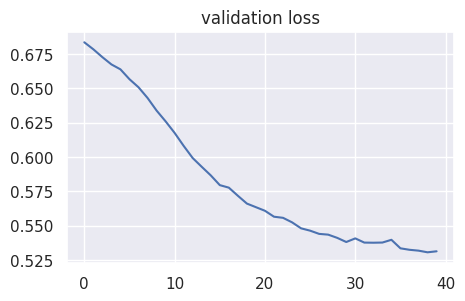

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(np.arange(epochs), lossv)
plt.title('validation loss')

In [ ]:
roc_auc_vector = []
accuracy_vector = []
loss_vector = []
predictions = []

def predict2():
    model3.eval()
    val_loss, correct = 0, 0
    all_preds, all_targets = [], []

    for load in test_dataloader:
        data, target = load
        data = data.to('cuda')
        target = target.to('cuda')

        output = model3(data)
        val_loss += criterion(output, target).data.item()

        probabilities = torch.sigmoid(output)
        all_preds.append(probabilities.cpu().detach().numpy())
        all_targets.append(target.cpu().detach().numpy())

        pred = output.data.max(1)[1]
        correct += pred.eq(target.data.max(1)[1]).cpu().sum()

    val_loss /= len(test_dataloader)
    loss_vector.append(val_loss)

    accuracy = 100. * correct.to(torch.float32) / len(test_dataloader.dataset)
    accuracy_vector.append(accuracy)

    all_preds = np.concatenate(all_preds)
    predictions.append(all_preds)
    all_targets = np.concatenate(all_targets)

    roc_auc = roc_auc_score(all_targets, all_preds)
    roc_auc_vector.append(roc_auc)

    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%), ROC AUC: {:.4f}\n'.format(
        val_loss, correct, len(test_dataloader.dataset), accuracy, roc_auc))

In [ ]:
model3.eval()
predict2()


Validation set: Average loss: 0.5314, Accuracy: 2500/2500 (100%), ROC AUC: 0.8255



In [ ]:
predictions

[array([[0.30533382],
        [0.20034139],
        [0.83941346],
        ...,
        [0.27432516],
        [0.66084045],
        [0.7253688 ]], dtype=float32)]

## submition

In [ ]:
sample_submit = pd.read_csv('sample-submission.csv', header=None)

In [ ]:
sample_submit.head()

0
0  0.548814
1  0.715189
2  0.602763
3  0.544883
4  0.423655

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [ ]:
#scaler = StandardScaler()
#x_train = scaler.fit_transform(x_train)

In [391]:
test_df_scaled = scaler.transform(test_df)

In [392]:
preds1 = model1.predict_proba(test_df_scaled)

In [393]:
preds2 = model2.predict_proba(test_df_scaled)

In [394]:
prediction_df1 = pd.DataFrame(preds1[:, 1])

In [395]:
prediction_df2 = pd.DataFrame(preds2[:, 1])

In [396]:
preds4 = model4.predict_proba(test_df)

In [397]:
prediction_df4 = pd.DataFrame(preds4[:, 1])

In [137]:
prediction_dfx = (0.82 * prediction_df1 + 0.095 * prediction_df2 + 0.085 * prediction_df4) / 3 # 0.8 1 1
def function(x):
    if x > 0.95:
        return 1
    elif x < 0.05:
        return 0
    else:
      return x
prediction_df = prediction_dfx[0].apply(function)
prediction_df.to_csv('output254.csv', index=False, header=False)

In [398]:
preds7 = model7.predict_proba(test_df)

In [399]:
prediction_df7 = pd.DataFrame(preds7[:, 1])

In [400]:
test_df_new_scaled = test_df_scaled.copy()

In [401]:
test_df_new_scaled = pd.DataFrame(test_df_new_scaled)

In [402]:
test_df_new_scaled.columns = (i for i in test_df.columns)

In [403]:
#prediction_df1_new = prediction_df1.copy()
prediction_df2_new = prediction_df2.copy()
prediction_df4_new = prediction_df4.copy()
prediction_df7_new = prediction_df7.copy()

In [404]:
#prediction_df1_new.columns = ['prds1']
prediction_df2_new.columns = ['prds2']
prediction_df4_new.columns = ['prds3']
prediction_df7_new.columns = ['prds4']

In [405]:
test_df_new_scaled = pd.concat([test_df,
                                prediction_df2_new, prediction_df4_new, prediction_df7_new], axis=1)

In [406]:
meta_pred = meta_model.predict_proba(test_df_new_scaled)

In [407]:
meta_prediction = pd.DataFrame(meta_pred[:, 1])

In [408]:
prediction_dfx = (0.87 * prediction_df1 + 0.13 * meta_prediction + 0.0 * prediction_df2) / 2 # 0.8 1 1
def function(x):
    if x > 0.94:
        return 1
    elif x < 0.06:
        return 0
    else:
      return x
prediction_df = prediction_dfx[0].apply(function)
prediction_df.to_csv('output359.csv', index=False, header=False)

In [ ]:
class MyDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = torch.Tensor(self.data.iloc[idx].values)
        return x

In [ ]:
test_df_scaled_pd = pd.DataFrame(test_df_scaled)

In [ ]:
test_dataset2 = MyDataset(test_df_scaled_pd.copy())

In [ ]:
test_dataloader2 = DataLoader(test_dataset2, shuffle=False)

In [ ]:
prediction_3 = []

def predict3():
    model3.eval()
    all_preds = []

    for load in test_dataloader2:
        data = load
        data = data.to('cuda')

        output = model3(data)
        probabilities = torch.sigmoid(output)
        all_preds.append(probabilities.cpu().detach().numpy())

    all_preds = np.concatenate(all_preds)
    prediction_3.append(all_preds)

In [ ]:
predict3()

In [ ]:
prediction_3

[array([[0.23656563],
        [0.62518275],
        [0.46502236],
        ...,
        [0.39324892],
        [0.23987117],
        [0.6852196 ]], dtype=float32)]

In [ ]:
prediction_df3 = pd.DataFrame(prediction_3[0])

In [ ]:
prediction_df1.head(3)

0
0  0.168378
1  0.492939
2  0.227825

In [ ]:
prediction_df2.head(3)

0
0  0.208737
1  0.492723
2  0.178246

In [ ]:
prediction_df4.head(3)

0
0  0.160272
1  0.459111
2  0.346282

In [ ]:
meta_prediction.head(3)

0
0  0.082534
1  0.107343
2  0.051187

In [139]:
prediction_dfx = (0.85 * prediction_df1 + 0.15 * prediction_df4 + 0.0 * prediction_df2) / 2 # 0.8 1 1
def function(x):
    if x > 0.94:
        return 1
    elif x < 0.06:
        return 0
    else:
      return x
prediction_df = prediction_dfx[0].apply(function)
meta_prediction.to_csv('output338.csv', index=False, header=False)

In [65]:
data = transform_df[(i for i in transform_df.columns if i != 'target')]
target = transform_df['target']

In [66]:
scaler = StandardScaler()
data = scaler.fit_transform(data) #########33

In [69]:
for i in range(100, 101):
    model1 = CatBoostClassifier(
        random_state=58,
        thread_count=-1,
        iterations=776,
        learning_rate=0.029231709824490106,
        depth=9,
        l2_leaf_reg=24.176720297688437,
        bootstrap_type='Bayesian',
        random_strength=9.357058461732244e-07,
        bagging_temperature=0.8484639789828139,
        od_type='Iter',
        od_wait=31
    )
    model1.fit(data, target,
              #eval_set=(x_test, y_test),
              verbose=100, plot=False,
              early_stopping_rounds=100,
              #use_best_model=True
    )

    meta_model = RandomForestClassifier(
        random_state=8,
        n_estimators=964,
        max_depth=49,
        min_samples_split=8,
        min_samples_leaf=1,
    )

    meta_model.fit(x_new_train, target)

    test_df_scaled = scaler.transform(test_df)

    preds1 = model1.predict_proba(test_df_scaled)
    prediction_df10 = pd.DataFrame(preds1[:, 1])

    preds2 = meta_model.predict_proba(test_df_new_scaled)
    meta_preds = pd.DataFrame(preds2[:, 1])

    prediction_dfx = (0.85 * prediction_df10 + 0.15 * meta_preds) / 2 # 0.8 1 1
    def function(x):
        if x > 0.94:
            return 1
        elif x < 0.06:
            return 0
        else:
          return x
    prediction_df = prediction_dfx[0].apply(function)
    prediction_df.to_csv(f'eights_with_i_ones_rs_{i}.csv', index=False, header=False)


0:	learn: 0.6869194	total: 50.4ms	remaining: 39.1s
100:	learn: 0.4903883	total: 4.46s	remaining: 29.8s
200:	learn: 0.4325063	total: 7.72s	remaining: 22.1s
300:	learn: 0.3961962	total: 11s	remaining: 17.3s
400:	learn: 0.3655797	total: 16.7s	remaining: 15.6s
500:	learn: 0.3400145	total: 20s	remaining: 11s
600:	learn: 0.3179294	total: 23.3s	remaining: 6.78s
700:	learn: 0.2978799	total: 26.7s	remaining: 2.85s
775:	learn: 0.2844675	total: 31.1s	remaining: 0us


In [ ]:
test_df_scaled = scaler.transform(test_df)

In [ ]:
preds1 = model1.predict_proba(test_df_scaled)

In [ ]:
prediction_df1 = pd.DataFrame(preds1[:, 1])

## auto-stacking

In [ ]:
class NotFittedError(Exception):
    def __init__(
        self,
        message="This model has not been fitted yet. Use .fit() to train the model.",
    ):
        self.message = message
        super().__init__(self.message)


class NameIntersectionError(Exception):
    def __init__(
        self,
        names,
    ):
        self.message = f"Unable to merge with other stack due to intersection in following names: {names}"
        super().__init__(self.message)


class FoldMismatchError(Exception):
    def __init__(
        self,
        expected_n_folds,
        received_n_folds,
    ):
        self.message = f"Unable to merge with other stack due to inconsistent amount of folds. Expected {expected_n_folds}, received {received_n_folds}"
        super().__init__(self.message)

In [ ]:
from typing import Any, List, Tuple, Union

import numpy as np
import pandas as pd


def to_pandas(X: Any) -> pd.DataFrame:
    dtype = type(X)

    if dtype == pd.DataFrame:
        return X

    elif dtype == pd.Series:
        return pd.DataFrame(X)

    elif dtype == np.ndarray:
        return pd.DataFrame(X)

    elif dtype == list:
        return pd.DataFrame(X)

    else:
        raise ValueError(
            f"Wrong dtype. Expected pd.DataFrame, pd.Series, np.ndarray or list, found {dtype}"
        )


def average_preds(preds_array):
    return sum(preds_array) / len(preds_array)

In [ ]:
class BaseRegressorWrapper:
    def __init__(
        self,
        base_estimator,
        use_best_model: bool = False,
        early_stopping_rounds: int = None
    ):
        self.base_estimator = base_estimator
        self.use_best_model = use_best_model
        self.early_stopping_rounds = early_stopping_rounds
        self.fitted = False

    def fit(self, X, y, eval_set: tuple = None):
        self.base_estimator.fit(X, y)

        self.fitted = True

        return self.base_estimator

    def get_model(self):
        return self.base_estimator

    def get_iterations(self):
        return self.base_estimator.n_estimators

    def predict(self, X):
        if not self.fitted:
            raise NotFittedError()

        return self.base_estimator.predict(X, ntree_limit=self.get_iterations())


class BaseClassifierWrapper(BaseRegressorWrapper):
    def __init__(self, base_estimator, use_best_model: bool = False, early_stopping_rounds: int = None):
        super().__init__(base_estimator, use_best_model, early_stopping_rounds)
        self.base_estimator = base_estimator
        self.use_best_model = use_best_model
        self.fitted = False

    def predict_proba(self, X):
        if not self.fitted:
            raise NotFittedError()

        return self.base_estimator.predict_proba(X, ntree_limit=self.get_iterations())


class CatBoostWrapper:
    def __init__(
        self,
        base_estimator,
        use_best_model: bool = False,
        early_stopping_rounds: int = None
    ):
        self.base_estimator = base_estimator
        self.use_best_model = use_best_model
        self.early_stopping_rounds = early_stopping_rounds
        self.fitted = False

    def get_iterations(self):
        if not self.fitted:
            raise NotFittedError()

        if self.use_best_model:
            return self.base_estimator.model.get_best_iteration()

        return self.base_estimator.n_estimators


class CatBoostClassifierWrapper(BaseClassifierWrapper, CatBoostWrapper):
    def __init__(
        self,
        base_estimator,
        use_best_model: bool = False,
        early_stopping_rounds: int = None,
        cat_features: list = None,
        text_features: list = None,
        embedding_features: list = None
    ):
        super().__init__(base_estimator, use_best_model, early_stopping_rounds)
        self.cat_features = cat_features
        self.text_features = text_features
        self.embedding_features = embedding_features

    def fit(self, X, y, eval_set: tuple = None):
        self.base_estimator.fit(
            X,
            y,
            eval_set=eval_set,
            use_best_model=self.use_best_model,
            cat_features=self.cat_features,
            text_features=self.text_features,
            embedding_features=self.embedding_features,
            early_stopping_rounds=self.early_stopping_rounds,
        )

        self.fitted = True

        return self.base_estimator


class CatBoostRegressorWrapper(BaseRegressorWrapper, CatBoostWrapper):
    def __init__(
        self,
        base_estimator,
        use_best_model: bool = False,
        early_stopping_rounds: int = None,
        cat_features: list = None
    ):
        super().__init__(base_estimator, use_best_model, early_stopping_rounds)
        self.cat_features = cat_features

    def fit(self, X, y, eval_set: tuple = None):
        self.base_estimator.fit(
            X,
            y,
            eval_set=eval_set,
            use_best_model=self.use_best_model,
            cat_features=self.cat_features,
            early_stopping_rounds=self.early_stopping_rounds,
        )

        self.fitted = True

        return self.base_estimator


class XGBWrapper:
    def __init__(
        self,
        base_estimator,
        use_best_model: bool = False,
        early_stopping_rounds: int = None
    ):
        self.base_estimator = base_estimator
        self.use_best_model = use_best_model
        self.early_stopping_rounds = early_stopping_rounds
        self.fitted = False

    def get_iterations(self):
        if not self.fitted:
            raise NotFittedError()

        if self.use_best_model:
            return self.base_estimator.get_booster().best_ntree_limit

        return self.base_estimator.n_estimators

    def fit(self, X, y, eval_set: tuple = None):
        self.base_estimator.fit(
            X, y, eval_set=[eval_set], early_stopping_rounds=self.early_stopping_rounds
        )

        self.fitted = True

        return self.base_estimator


class XGBClassifierWrapper(BaseClassifierWrapper, XGBWrapper):
    def __init__(
        self,
        base_estimator,
        use_best_model: bool = False,
        early_stopping_rounds: int = None
    ):
        super().__init__(base_estimator, use_best_model, early_stopping_rounds)


class XGBRegressorWrapper(BaseRegressorWrapper, XGBWrapper):
    def __init__(
        self,
        base_estimator,
        use_best_model: bool = False,
        early_stopping_rounds: int = None
    ):
        super().__init__(base_estimator, use_best_model, early_stopping_rounds)


class LGBMWrapper:
    def __init__(
        self,
        base_estimator,
        use_best_model: bool = False,
        early_stopping_rounds: int = None
    ):
        self.base_estimator = base_estimator
        self.use_best_model = use_best_model
        self.early_stopping_rounds = early_stopping_rounds
        self.fitted = False

    def get_iterations(self):
        if not self.fitted:
            raise NotFittedError()

        if self.use_best_model:
            return self.base_estimator.best_iteration

        return self.base_estimator.n_estimators_

    def fit(self, X, y, eval_set: tuple = None):
        self.base_estimator.fit(
            X, y, eval_set=[eval_set], early_stopping_rounds=self.early_stopping_rounds
        )

        self.fitted = True

        return self.base_estimator


class LGBMClassifierWrapper(BaseClassifierWrapper, LGBMWrapper):
    def __init__(
        self,
        base_estimator,
        use_best_model: bool = False,
        early_stopping_rounds: int = None
    ):
        super().__init__(base_estimator, use_best_model, early_stopping_rounds)


class LGBMRegressorWrapper(BaseRegressorWrapper, LGBMWrapper):
    def __init__(
        self,
        base_estimator,
        use_best_model: bool = False,
        early_stopping_rounds: int = None
    ):
        super().__init__(base_estimator, use_best_model, early_stopping_rounds)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold


class StackingTransformer:
    """
    Stacking ensemble model
    """

    def __init__(
        self,
        models: list,
        main_metric,
        n_folds: int = 5,
        random_state: int = None,
        shuffle: bool = False,
        stratified: bool = True,
        verbose: bool = True,
        regression: bool = True,
        stratification_bins: int = 10,
        custom_bins: np.ndarray = None
    ):

        self.models = [i[1] for i in models]
        self.n_models = len(self.models)
        self.names = [i[0] for i in models]
        self.model_dict = {}
        self.model_scores_dict = {}

        self.n_folds = n_folds
        self.main_metric = main_metric
        self.random_state = random_state
        self.shuffle = shuffle
        self.stratified = stratified
        self.verbose = verbose
        self.regression = regression
        self.stratification_bins = stratification_bins
        self.custom_bins = custom_bins

        self.fitted = False

    def fit(
        self,
        X: Union[pd.DataFrame, pd.Series, np.array, list],
        y: Union[pd.DataFrame, pd.Series, np.array, list],
    ) -> Any:

        self.model_dict = {}
        self.model_scores_dict = {}

        X = to_pandas(X)

        self.__get_n_labels(y)

        if self.stratified:
            kf = StratifiedKFold(
                n_splits=self.n_folds, random_state=self.random_state, shuffle=self.shuffle
            )
        else:
            kf = KFold(
                n_splits=self.n_folds, random_state=self.random_state, shuffle=self.shuffle
            )

        # Form each model
        for model_i in range(self.n_models):
            if self.verbose:
                print(self.names[model_i])

            # For each fold
            sub_models = []
            sub_scores = []

            if self.regression:
                if isinstance(self.custom_bins, np.ndarray):
                    digitized = np.digitize(y, self.custom_bins)
                else:
                    bins = np.linspace(y.min(), y.max(), self.stratification_bins)
                    digitized = np.digitize(y, bins)

                split = kf.split(X, digitized)
            else:
                split = kf.split(X, y)

            for fold, (train_index, test_index) in enumerate(split):
                sub_model = self.models[model_i]

                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = y[train_index], y[test_index]

                if type(sub_model) in [
                    CatBoostRegressorWrapper,
                    CatBoostClassifierWrapper,
                    XGBRegressorWrapper,
                    XGBClassifierWrapper,
                    LGBMClassifierWrapper,
                    LGBMRegressorWrapper,
                ]:

                    sub_model = sub_model.fit(
                        X_train, y_train, eval_set=(X_test, y_test)
                    )
                else:
                    sub_model = sub_model.fit(X_train, y_train)

                sub_models.append(sub_model)

                if self.regression:
                    sub_score = self.main_metric(y_test, sub_model.predict(X_test))
                else:
                    sub_score = self.main_metric(
                        y_test, sub_model.predict_proba(X_test)
                    )

                sub_scores.append(sub_score)

                if self.verbose:
                    print(f"Fold: {fold}, Score: {sub_score}")

            self.model_dict[self.names[model_i]] = sub_models
            self.model_scores_dict[self.names[model_i]] = sub_scores

        self.fitted = True
        return self

    def transform(
        self, X: Union[pd.DataFrame, pd.Series, np.array, list]
    ) -> pd.DataFrame:
        all_preds = []

        for model_name in self.model_dict:
            models = self.model_dict[model_name]
            model_preds = []

            for fold_model in models:
                if self.regression:
                    fold_pred = fold_model.predict(X)
                else:
                    fold_pred = fold_model.predict_proba(X)

                if len(fold_pred.shape) == 1:
                    model_preds.append(fold_pred.reshape(-1, self.n_labels))
                else:
                    model_preds.append(fold_pred)

            mean_preds = average_preds(model_preds)
            all_preds.append(mean_preds)

        return self.__prettify_preds(all_preds)

    def fit_transform(
        self,
        X: Union[pd.DataFrame, pd.Series, np.array, list],
        y: Union[pd.DataFrame, pd.Series, np.array, list],
    ) -> pd.DataFrame:

        self.model_dict = {}
        self.model_scores_dict = {}

        X = to_pandas(X)

        self.__get_n_labels(y)

        if self.stratified:
            kf = StratifiedKFold(
                n_splits=self.n_folds, random_state=self.random_state, shuffle=self.shuffle
            )
        else:
            kf = KFold(
                n_splits=self.n_folds, random_state=self.random_state, shuffle=self.shuffle
            )

        all_preds = []
        # Form each model
        for model_i in range(self.n_models):
            if self.verbose:
                print(self.names[model_i])

            # For each fold
            sub_models = []
            sub_scores = []
            sub_preds = np.zeros((X.shape[0], self.n_labels))

            if self.regression:
                if isinstance(self.custom_bins, np.ndarray):
                    digitized = np.digitize(y, self.custom_bins)
                else:
                    bins = np.linspace(y.min(), y.max(), self.stratification_bins)
                    digitized = np.digitize(y, bins)

                split = kf.split(X, digitized)
            else:
                split = kf.split(X, y)

            for fold, (train_index, test_index) in enumerate(split):
                sub_model = self.models[model_i]

                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = y[train_index], y[test_index]

                if type(sub_model) in [
                    CatBoostRegressorWrapper,
                    CatBoostClassifierWrapper,
                    XGBRegressorWrapper,
                    XGBClassifierWrapper,
                    LGBMClassifierWrapper,
                    LGBMRegressorWrapper,
                ]:

                    sub_model = sub_model.fit(
                        X_train, y_train, eval_set=(X_test, y_test)
                    )
                else:
                    sub_model = sub_model.fit(X_train, y_train)

                sub_models.append(sub_model)

                if self.regression:
                    preds = sub_model.predict(X_test)
                    sub_score = self.main_metric(y_test, preds)
                else:
                    preds = sub_model.predict_proba(X_test)
                    sub_score = self.main_metric(y_test, preds[:, 1])

                sub_preds[test_index] = preds.reshape((-1, self.n_labels))

                sub_scores.append(sub_score)

                if self.verbose:
                    print(f"Fold: {fold}, Score: {sub_score}")

            self.model_dict[self.names[model_i]] = sub_models
            self.model_scores_dict[self.names[model_i]] = sub_scores
            all_preds.append(sub_preds)

        self.fitted = True

        return self.__prettify_preds(all_preds)

    def get_scores(self, prettified: bool = True):
        if not self.fitted:
            raise NotFittedError()

        if prettified:
            return pd.DataFrame(data=self.model_scores_dict)

        return np.array(list(self.model_scores_dict.values()))

    def get_models(self) -> dict:
        if not self.fitted:
            raise NotFittedError()

        return self.model_dict

    def merge(self, other_stack: "StackingTransformer") -> None:
        other_names = other_stack.names

        intersecting_names = set(self.names).intersection(set(other_names))

        if len(intersecting_names) > 0:
            raise NameIntersectionError(intersecting_names)

        if self.n_folds != other_stack.n_folds:
            raise FoldMismatchError(expected_n_folds=self.n_folds, received_n_folds=other_stack.n_folds)

        self.names.extend(other_names)

        other_model_dict = other_stack.model_dict
        for key in other_model_dict:
            self.model_dict[key] = other_model_dict[key]

        self.models.extend(other_stack.models)

        self.n_models += other_stack.n_models

        other_model_scores_dict = other_stack.model_scores_dict
        for key in other_model_scores_dict:
            self.model_scores_dict[key] = other_model_scores_dict[key]


    def __prettify_preds(self, preds: list) -> pd.DataFrame:
        transformations = pd.DataFrame(
            np.hstack(preds),
            columns=[
                f"{model_name}_{i}"
                for i in range(self.n_labels)
                for model_name in self.names
            ],
        )

        return transformations

    def __get_n_labels(self, y) -> None:
        if len(y.shape) == 1:
            if not self.regression:
                self.n_labels = len(np.unique(y))
            else:
                self.n_labels = 1
        else:
            self.n_labels = y.shape[1]

## using auto-stacking

In [ ]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

stack_1 = StackingTransformer(
    models=[
        (
            "catboost",
            CatBoostClassifierWrapper(
                CatBoostClassifier(
                    random_state=9,
                    thread_count=-1,
                    iterations=886,
                    learning_rate=0.006983523163319313,
                    depth=10,
                    l2_leaf_reg=11.660922016066483,
                    bootstrap_type='Bayesian',
                    random_strength=2.3676764768135513e-05,
                    bagging_temperature=0.7602192265140637,
                    od_type='Iter',
                    od_wait=34
                ),
                use_best_model=True,
                early_stopping_rounds=100,
            ),
        ),
        (
            "xgboost",
            XGBClassifierWrapper(
                XGBClassifier(
                    max_depth=12,
                    subsample=0.8,
                    n_estimators=9700,
                    eta=0.06999999999999999,
                    reg_alpha=2,
                    reg_lambda=5,
                    min_child_weight=2,
                    colsample_bytree=0.8757003050880059
                ), use_best_model=True, early_stopping_rounds=100
            ),
        ),
        (
            "lgbm",
            LGBMClassifierWrapper(
                LGBMClassifier(
                    lambda_l1=4.487366164713076,
                    lambda_l2=0.0655379256337531,
                    num_leaves=164,
                    feature_fraction=0.8524457170065015,
                    bagging_fraction=0.9586354490599466,
                    bagging_freq=1,
                    min_child_samples=10,
                ), use_best_model=True, early_stopping_rounds=100
            ),
        ),

    ],
    main_metric=roc_auc_score,
    regression=False,
    n_folds=6,
    random_state=10,
    shuffle=True,
    verbose=True,
    stratified=True,
    stratification_bins=7
)

In [ ]:
stack_2 = StackingTransformer(
    models=[
        ("catboost2", CatBoostClassifier(
            thread_count=-1,
            iterations=655,
            learning_rate=0.00930308177421504,
            l2_leaf_reg=14,
            colsample_bylevel=0.7942640233965339,
            auto_class_weights='Balanced',
            depth=7,
            boosting_type='Plain',
            bootstrap_type='Bernoulli',
            subsample=0.9984822148173642
        )),
    ],
    main_metric=roc_auc_score,
    regression=False,
    n_folds=6,
    random_state=42,
    shuffle=True,
    verbose=True,
    stratified=True,
    stratification_bins=7
)

In [ ]:
data = transform_df[(i for i in transform_df.columns if i != 'target')]
target = transform_df['target']

scaler = StandardScaler()
data = scaler.fit_transform(data)
target = scaler.transform(target)

X_1_trans = stack_1.fit_transform(data, target)
X_2_trans = stack_2.fit_transform(data, target)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: ignored

In [ ]:
#stack_1.merge(stack_2)

stack_1.get_scores(prettified=True)

catboost   xgboost      lgbm
0  0.826228  0.816397  0.820073
1  0.808355  0.795976  0.800642
2  0.820239  0.805297  0.814334
3  0.838569  0.812982  0.817629
4  0.829428  0.817163  0.816573
5  0.834863  0.827129  0.827141

In [ ]:
stack_2.transform(test_df)

catboost2_0  catboost2_1
0        0.812419     0.187581
1        0.490849     0.509151
2        0.710466     0.289534
3        0.561387     0.438613
4        0.724134     0.275866
...           ...          ...
1995     0.679696     0.320304
1996     0.515796     0.484204
1997     0.735335     0.264665
1998     0.656486     0.343514
1999     0.296202     0.703798

[2000 rows x 2 columns]

In [ ]:
test_df_scaled = scaler.transform(test_df)

In [ ]:
prediction_df = stack_2.transform(test_df)

In [ ]:
predss = pd.DataFrame(prediction_df['catboost2_1'])

In [ ]:
predss.to_csv('output75.csv', index=False, header=False)